# Deployment

Steps to reproduce:
- pip install requirements.txt into new environment
- activate environment
- download database in the format 

person1

    -img 1
    -img 2
    ...
person2

    -img 1
    

## Import Dependencies

In [7]:
#make sure to import these dependencies in this order
import os
import gradio as gr
from align import align_face
from PIL import Image
os.chdir('../')

In [1]:
#may or may not need to comment the following out 
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['NUMBAPRO_NVVM']='/share/pkg.7/cuda/11.2/install/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE']='/share/pkg.7/cuda/11.2/install/nvvm/libdevice/'
import segmentation_models as sm
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

Segmentation Models: using `tf.keras` framework.


In [2]:
import tensorflow as tf
import keras
import keras_vggface
from keras_vggface.vggface import VGGFace
import mtcnn
import numpy as np
import matplotlib as mpl
from keras.utils.data_utils import get_file
import dlib
import keras_vggface.utils
import PIL
import os
import os.path

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from deepface import DeepFace
import pandas as pd

In [16]:
os.chdir('ml-atfal-mafkoda-grp')

## Gradio Demo Depoloyment

In [5]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

In [14]:
def db_find(path, frontalize, db="atfalmafkoda_unzip/database", model=0, thresh=.25):
    """function to be passed into gradio that will check input image against the database and find matches
    args:
        path- path to image; can be numpy array as well
        align- bool; if True, frontalize image
        db- path to database
        model- 0-8; will load different models shown above (Dlib does not work)
        thresh- threshold to return images
    output:
        returns a dataframe of the matched images and a gallery of the actual images
    """
    if frontalize:
        print(type(path))
        path = align_face(path)[0]
        print(type(path))
    m = model
    dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[m], detector_backend="mtcnn", enforce_detection=False)
    df = dfs[0].copy()
    df = df.drop(columns=['source_x', 'source_y', 'source_w', 'source_h'])
    df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database/person").str.split("/")
    df['id'] = df['id'].apply(lambda x: x[0])
    img_len = df.loc[df["VGG-Face_cosine"] < thresh].shape[0]
    imgs = df.head(img_len)['identity'].tolist()
    return df.loc[df["VGG-Face_cosine"] < thresh], imgs

In [15]:
# code to run gradio demo
demo = gr.Interface(fn=db_find, inputs=["image", gr.Checkbox(label="align")], outputs=["dataframe", "gallery"])
demo.launch(server_name='0.0.0.0', share=True)

IMPORTANT: You are using gradio version 3.9, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://0.0.0.0:7862
Running on public URL: https://7038eff8565d0109.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x2b62f7ec4cd0>,
 'http://localhost:7862/',
 'https://7038eff8565d0109.gradio.app')

<class 'numpy.ndarray'>
{'batch_size': 8,
 'board_interval': 50,
 'checkpoint_path': None,
 'dataset_type': 'ffhq_frontalize',
 'device': 'cuda:0',
 'encoder_type': 'GradualStyleEncoder',
 'exp_dir': '',
 'id_lambda': 1.0,
 'image_interval': 100,
 'input_nc': 3,
 'l2_lambda': 0.001,
 'l2_lambda_crop': 0.01,
 'label_nc': 0,
 'learning_rate': 0.0001,
 'lpips_lambda': 0.08,
 'lpips_lambda_crop': 0.8,
 'max_steps': 80000,
 'optim_name': 'ranger',
 'resize_factors': None,
 'save_interval': 5000,
 'start_from_latent_avg': True,
 'stylegan_weights': '',
 'test_batch_size': 8,
 'test_workers': 2,
 'train_decoder': False,
 'val_interval': 2500,
 'w_norm_lambda': 0.005,
 'workers': 8}
Loading pSp from checkpoint: pixel2style2pixel/pretrained_models/psp_ffhq_frontalization.pt
Model successfully loaded!
Number of faces detected: 1
here
shape <_dlib_pybind11.full_object_detection object at 0x2b631327e4f0>
Aligned image has shape: (256, 256)
Inference took 0.0315 seconds.
<class 'numpy.ndarray'>
The

# Examples

In [16]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

In [17]:
# individual example runs 
path = "atfalmafkoda_unzip/found_children/116883286_2509830975981181_2158562119274127459_n_2509830972647848.jpg"
db = "atfalmafkoda_unzip/database"
dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[0], detector_backend="mtcnn", enforce_detection=False)

Finding representations:   0%|          | 0/4933 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


Finding representations:   0%|          | 1/4933 [00:00<46:13,  1.78it/s]

1/1 [==============================] - 0s 34ms/step


Finding representations:   0%|          | 2/4933 [00:01<45:00,  1.83it/s]

1/1 [==============================] - 0s 33ms/step


Finding representations:   0%|          | 3/4933 [00:01<44:42,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 4/4933 [00:02<43:44,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 5/4933 [00:02<43:34,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 6/4933 [00:03<43:28,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   0%|          | 7/4933 [00:03<43:49,  1.87it/s]

1/1 [==============================] - 0s 33ms/step


Finding representations:   0%|          | 8/4933 [00:04<43:44,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 9/4933 [00:04<43:07,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   0%|          | 10/4933 [00:05<42:34,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 11/4933 [00:05<42:55,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 12/4933 [00:06<42:39,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 13/4933 [00:06<42:28,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 14/4933 [00:07<50:07,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   0%|          | 15/4933 [00:08<48:00,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 16/4933 [00:08<46:26,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 17/4933 [00:09<45:01,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   0%|          | 18/4933 [00:09<43:50,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   0%|          | 19/4933 [00:10<43:20,  1.89it/s]

1/1 [==============================] - 0s 34ms/step


Finding representations:   0%|          | 20/4933 [00:10<43:54,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   0%|          | 21/4933 [00:11<42:51,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 22/4933 [00:11<43:41,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 23/4933 [00:12<42:44,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   0%|          | 24/4933 [00:12<42:03,  1.94it/s]

1/1 [==============================] - 0s 33ms/step


Finding representations:   1%|          | 25/4933 [00:13<42:39,  1.92it/s]

1/1 [==============================] - 0s 34ms/step


Finding representations:   1%|          | 26/4933 [00:13<42:46,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 27/4933 [00:14<42:19,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 28/4933 [00:14<41:55,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 29/4933 [00:15<41:27,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 30/4933 [00:15<41:00,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 31/4933 [00:16<40:42,  2.01it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|          | 32/4933 [00:16<41:05,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 33/4933 [00:17<41:15,  1.98it/s]

1/1 [==============================] - 0s 33ms/step


Finding representations:   1%|          | 34/4933 [00:18<51:17,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 35/4933 [00:18<47:55,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 36/4933 [00:19<45:42,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 37/4933 [00:19<44:00,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|          | 38/4933 [00:20<42:49,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|          | 39/4933 [00:20<41:53,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|          | 40/4933 [00:21<41:12,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 41/4933 [00:21<40:58,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 42/4933 [00:22<40:33,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 43/4933 [00:22<40:28,  2.01it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|          | 44/4933 [00:23<40:58,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|          | 45/4933 [00:23<40:57,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 46/4933 [00:24<41:12,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|          | 47/4933 [00:24<41:33,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 48/4933 [00:25<48:25,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 49/4933 [00:26<46:39,  1.74it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   1%|          | 50/4933 [00:26<45:01,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 51/4933 [00:27<45:05,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 52/4933 [00:27<44:25,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 53/4933 [00:28<44:03,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 54/4933 [00:28<44:10,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 55/4933 [00:29<43:15,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|          | 56/4933 [00:29<42:39,  1.91it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   1%|          | 57/4933 [00:30<42:19,  1.92it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   1%|          | 58/4933 [00:31<54:01,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   1%|          | 59/4933 [00:31<51:59,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   1%|          | 60/4933 [00:32<49:37,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   1%|          | 61/4933 [00:32<48:04,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   1%|▏         | 62/4933 [00:34<1:00:22,  1.34it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|▏         | 63/4933 [00:34<54:41,  1.48it/s]  

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|▏         | 64/4933 [00:35<50:29,  1.61it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|▏         | 65/4933 [00:35<47:19,  1.71it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|▏         | 66/4933 [00:36<45:22,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   1%|▏         | 67/4933 [00:36<44:31,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|▏         | 68/4933 [00:37<43:40,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|▏         | 69/4933 [00:37<42:52,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|▏         | 70/4933 [00:38<42:30,  1.91it/s]

1/1 [==============================] - 0s 33ms/step


Finding representations:   1%|▏         | 71/4933 [00:38<42:35,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   1%|▏         | 72/4933 [00:39<41:50,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   1%|▏         | 73/4933 [00:39<41:37,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 74/4933 [00:40<41:15,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 75/4933 [00:40<41:21,  1.96it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   2%|▏         | 76/4933 [00:41<49:26,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 77/4933 [00:42<46:55,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   2%|▏         | 78/4933 [00:42<45:13,  1.79it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 79/4933 [00:43<43:55,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   2%|▏         | 80/4933 [00:43<43:48,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 81/4933 [00:44<42:54,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 82/4933 [00:44<42:24,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 83/4933 [00:45<42:35,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 84/4933 [00:45<42:39,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 85/4933 [00:46<42:27,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 86/4933 [00:46<42:12,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 87/4933 [00:47<41:56,  1.93it/s]

1/1 [==============================] - 0s 35ms/step


Finding representations:   2%|▏         | 88/4933 [00:47<42:16,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 89/4933 [00:48<41:53,  1.93it/s]

1/1 [==============================] - 0s 33ms/step


Finding representations:   2%|▏         | 90/4933 [00:49<51:07,  1.58it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   2%|▏         | 91/4933 [00:49<48:16,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 92/4933 [00:50<46:22,  1.74it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 93/4933 [00:50<44:50,  1.80it/s]

1/1 [==============================] - 0s 35ms/step


Finding representations:   2%|▏         | 94/4933 [00:51<44:00,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 95/4933 [00:51<43:21,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 96/4933 [00:52<42:41,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 97/4933 [00:52<42:03,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 98/4933 [00:53<41:40,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 99/4933 [00:53<41:19,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 100/4933 [00:54<41:15,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 101/4933 [00:54<41:13,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 102/4933 [00:55<41:12,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 103/4933 [00:55<41:03,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   2%|▏         | 104/4933 [00:56<54:20,  1.48it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 105/4933 [00:57<50:15,  1.60it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 106/4933 [00:57<47:22,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 107/4933 [00:58<45:29,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   2%|▏         | 108/4933 [00:58<44:31,  1.81it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 109/4933 [00:59<43:33,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 110/4933 [00:59<42:46,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 111/4933 [01:00<42:38,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 112/4933 [01:01<42:13,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 113/4933 [01:01<41:55,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 114/4933 [01:02<41:38,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 115/4933 [01:02<41:28,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 116/4933 [01:03<41:12,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 117/4933 [01:03<40:59,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 118/4933 [01:04<41:00,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 119/4933 [01:04<40:47,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 120/4933 [01:05<40:42,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   2%|▏         | 121/4933 [01:05<41:02,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 122/4933 [01:06<40:53,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   2%|▏         | 123/4933 [01:06<40:49,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 124/4933 [01:07<40:59,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 125/4933 [01:07<40:40,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   3%|▎         | 126/4933 [01:08<53:10,  1.51it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 127/4933 [01:09<49:42,  1.61it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 128/4933 [01:09<46:59,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   3%|▎         | 129/4933 [01:10<45:08,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 130/4933 [01:10<43:52,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 131/4933 [01:11<42:48,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 132/4933 [01:11<41:56,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 133/4933 [01:12<41:20,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 134/4933 [01:12<45:31,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 135/4933 [01:13<43:47,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 136/4933 [01:13<43:01,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 137/4933 [01:14<42:22,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 138/4933 [01:14<41:21,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 139/4933 [01:15<41:00,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 140/4933 [01:15<40:45,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 141/4933 [01:16<40:47,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 142/4933 [01:16<40:56,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 143/4933 [01:17<40:53,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 144/4933 [01:17<40:32,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 145/4933 [01:18<40:36,  1.96it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:   3%|▎         | 146/4933 [01:20<1:12:49,  1.10it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   3%|▎         | 147/4933 [01:20<1:05:03,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   3%|▎         | 148/4933 [01:21<59:04,  1.35it/s]  

1/1 [==============================] - 0s 19ms/step


Finding representations:   3%|▎         | 149/4933 [01:22<54:32,  1.46it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   3%|▎         | 150/4933 [01:22<51:02,  1.56it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   3%|▎         | 151/4933 [01:23<48:02,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 152/4933 [01:23<46:18,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 153/4933 [01:24<44:35,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 154/4933 [01:24<43:35,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 155/4933 [01:25<42:22,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 156/4933 [01:25<41:50,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 157/4933 [01:26<41:27,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 158/4933 [01:26<41:22,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 159/4933 [01:27<40:52,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 160/4933 [01:27<43:39,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 161/4933 [01:28<42:39,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 162/4933 [01:28<41:51,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 163/4933 [01:29<41:12,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 164/4933 [01:29<40:54,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 165/4933 [01:30<40:41,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 166/4933 [01:30<40:40,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 167/4933 [01:31<40:13,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 168/4933 [01:31<40:20,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 169/4933 [01:32<40:07,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   3%|▎         | 170/4933 [01:32<40:42,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   3%|▎         | 171/4933 [01:33<40:33,  1.96it/s]

1/1 [==============================] - 0s 35ms/step


Finding representations:   3%|▎         | 172/4933 [01:33<40:55,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 173/4933 [01:34<40:48,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 174/4933 [01:34<41:36,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 175/4933 [01:35<41:14,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 176/4933 [01:35<41:06,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   4%|▎         | 177/4933 [01:36<41:27,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 178/4933 [01:37<41:26,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 179/4933 [01:37<41:03,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   4%|▎         | 180/4933 [01:38<40:59,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 181/4933 [01:38<40:51,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 182/4933 [01:39<40:48,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 183/4933 [01:39<40:42,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▎         | 184/4933 [01:40<40:35,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 185/4933 [01:40<40:38,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 186/4933 [01:41<40:32,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 187/4933 [01:41<40:35,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 188/4933 [01:42<49:43,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 189/4933 [01:43<46:46,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 190/4933 [01:43<44:46,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   4%|▍         | 191/4933 [01:44<43:15,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   4%|▍         | 192/4933 [01:44<42:05,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 193/4933 [01:45<41:37,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 194/4933 [01:45<40:55,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   4%|▍         | 195/4933 [01:46<40:50,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   4%|▍         | 196/4933 [01:46<40:18,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   4%|▍         | 197/4933 [01:47<39:48,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 198/4933 [01:47<39:44,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 199/4933 [01:48<39:44,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 200/4933 [01:48<39:38,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 201/4933 [01:49<39:29,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 202/4933 [01:49<39:58,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 203/4933 [01:50<39:54,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 204/4933 [01:50<39:47,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 205/4933 [01:51<50:01,  1.57it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   4%|▍         | 206/4933 [01:52<46:40,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   4%|▍         | 207/4933 [01:52<44:36,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 208/4933 [01:53<43:04,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 209/4933 [01:53<42:20,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 210/4933 [01:54<41:27,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 211/4933 [01:54<40:43,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   4%|▍         | 212/4933 [01:55<40:29,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 213/4933 [01:55<44:04,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 214/4933 [01:56<42:43,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 215/4933 [01:56<41:59,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 216/4933 [01:57<40:59,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   4%|▍         | 217/4933 [01:57<40:15,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 218/4933 [01:58<40:04,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 219/4933 [01:58<39:44,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 220/4933 [01:59<39:22,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   4%|▍         | 221/4933 [01:59<39:20,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 222/4933 [02:00<39:30,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 223/4933 [02:00<39:18,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 224/4933 [02:01<39:18,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 225/4933 [02:01<39:38,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 226/4933 [02:02<39:36,  1.98it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   5%|▍         | 227/4933 [02:02<39:49,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 228/4933 [02:03<39:48,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 229/4933 [02:03<39:41,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 230/4933 [02:04<46:37,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 231/4933 [02:05<44:41,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 232/4933 [02:05<43:02,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 233/4933 [02:06<41:58,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 234/4933 [02:06<41:23,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 235/4933 [02:07<41:04,  1.91it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   5%|▍         | 236/4933 [02:08<54:43,  1.43it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   5%|▍         | 237/4933 [02:08<51:11,  1.53it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   5%|▍         | 238/4933 [02:09<48:51,  1.60it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   5%|▍         | 239/4933 [02:09<46:49,  1.67it/s]

1/1 [==============================] - 0s 36ms/step


Finding representations:   5%|▍         | 240/4933 [02:10<45:55,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   5%|▍         | 241/4933 [02:11<45:39,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 242/4933 [02:11<43:43,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 243/4933 [02:12<42:39,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   5%|▍         | 244/4933 [02:12<41:48,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 245/4933 [02:13<41:02,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▍         | 246/4933 [02:14<54:45,  1.43it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 247/4933 [02:14<49:44,  1.57it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 248/4933 [02:15<46:18,  1.69it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   5%|▌         | 249/4933 [02:15<43:51,  1.78it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   5%|▌         | 250/4933 [02:16<42:24,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 251/4933 [02:16<41:24,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 252/4933 [02:17<40:30,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 253/4933 [02:17<39:48,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   5%|▌         | 254/4933 [02:18<39:20,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   5%|▌         | 255/4933 [02:18<39:03,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 256/4933 [02:19<38:49,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 257/4933 [02:19<38:52,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 258/4933 [02:20<38:40,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 259/4933 [02:20<38:31,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 260/4933 [02:21<38:34,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 261/4933 [02:21<38:37,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 262/4933 [02:22<38:35,  2.02it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   5%|▌         | 263/4933 [02:22<38:46,  2.01it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   5%|▌         | 264/4933 [02:23<39:06,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 265/4933 [02:23<46:12,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 266/4933 [02:24<44:00,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 267/4933 [02:24<42:26,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   5%|▌         | 268/4933 [02:25<41:21,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 269/4933 [02:25<40:42,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 270/4933 [02:26<40:17,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   5%|▌         | 271/4933 [02:26<39:48,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▌         | 272/4933 [02:27<39:24,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▌         | 273/4933 [02:27<39:02,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 274/4933 [02:28<39:02,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▌         | 275/4933 [02:28<39:00,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 276/4933 [02:29<38:50,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 277/4933 [02:29<39:12,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 278/4933 [02:30<38:49,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 279/4933 [02:30<38:36,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 280/4933 [02:31<38:38,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 281/4933 [02:31<38:48,  2.00it/s]

2/2 [==============================] - 0s 2ms/step


Finding representations:   6%|▌         | 282/4933 [02:32<43:15,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 283/4933 [02:33<41:58,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 284/4933 [02:33<40:53,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   6%|▌         | 285/4933 [02:34<47:27,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 286/4933 [02:34<45:01,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 287/4933 [02:35<42:59,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 288/4933 [02:35<41:30,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 289/4933 [02:36<40:37,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   6%|▌         | 290/4933 [02:36<40:11,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   6%|▌         | 291/4933 [02:37<39:57,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 292/4933 [02:37<39:40,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▌         | 293/4933 [02:38<39:21,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 294/4933 [02:38<39:15,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 295/4933 [02:39<39:21,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 296/4933 [02:39<39:32,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▌         | 297/4933 [02:40<39:17,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 298/4933 [02:40<38:56,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 299/4933 [02:41<39:28,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   6%|▌         | 300/4933 [02:42<49:01,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 301/4933 [02:42<46:03,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 302/4933 [02:43<43:59,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 303/4933 [02:43<42:28,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▌         | 304/4933 [02:44<41:16,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 305/4933 [02:44<40:36,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▌         | 306/4933 [02:45<40:00,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 307/4933 [02:45<39:39,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▌         | 308/4933 [02:46<39:30,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▋         | 309/4933 [02:46<39:40,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▋         | 310/4933 [02:47<39:45,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▋         | 311/4933 [02:47<40:29,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▋         | 312/4933 [02:48<40:39,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▋         | 313/4933 [02:49<40:24,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▋         | 314/4933 [02:49<48:11,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▋         | 315/4933 [02:50<46:33,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▋         | 316/4933 [02:50<44:33,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▋         | 317/4933 [02:51<42:59,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   6%|▋         | 318/4933 [02:51<42:03,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   6%|▋         | 319/4933 [02:52<41:13,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   6%|▋         | 320/4933 [02:53<40:49,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 321/4933 [02:53<40:17,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 322/4933 [02:54<39:57,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 323/4933 [02:54<39:38,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 324/4933 [02:55<40:05,  1.92it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:   7%|▋         | 325/4933 [02:56<53:24,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   7%|▋         | 326/4933 [02:56<51:12,  1.50it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   7%|▋         | 327/4933 [02:57<48:51,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   7%|▋         | 328/4933 [02:58<50:32,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   7%|▋         | 329/4933 [02:58<47:29,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   7%|▋         | 330/4933 [02:59<45:07,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   7%|▋         | 331/4933 [02:59<43:29,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 332/4933 [03:00<42:25,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 333/4933 [03:00<41:40,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 334/4933 [03:01<40:55,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 335/4933 [03:01<40:18,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 336/4933 [03:02<40:03,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 337/4933 [03:02<39:26,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 338/4933 [03:03<39:03,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 339/4933 [03:03<38:40,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 340/4933 [03:04<38:50,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 341/4933 [03:04<38:47,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 342/4933 [03:05<43:16,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 343/4933 [03:05<41:45,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 344/4933 [03:06<40:58,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 345/4933 [03:06<39:37,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 346/4933 [03:07<39:15,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 347/4933 [03:07<39:12,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 348/4933 [03:08<38:49,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 349/4933 [03:08<38:32,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 350/4933 [03:09<38:28,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 351/4933 [03:09<38:48,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 352/4933 [03:10<38:45,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 353/4933 [03:10<38:39,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 354/4933 [03:11<38:25,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 355/4933 [03:11<38:22,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 356/4933 [03:12<46:43,  1.63it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 357/4933 [03:13<44:46,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 358/4933 [03:14<50:13,  1.52it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 359/4933 [03:14<46:40,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 360/4933 [03:15<44:13,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 361/4933 [03:15<42:22,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   7%|▋         | 362/4933 [03:16<42:05,  1.81it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 363/4933 [03:16<40:57,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 364/4933 [03:17<40:30,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 365/4933 [03:17<40:02,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 366/4933 [03:18<39:38,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 367/4933 [03:18<39:24,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   7%|▋         | 368/4933 [03:19<39:31,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   7%|▋         | 369/4933 [03:19<38:57,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 370/4933 [03:20<38:43,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   8%|▊         | 371/4933 [03:20<38:38,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   8%|▊         | 372/4933 [03:21<38:36,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   8%|▊         | 373/4933 [03:21<39:35,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   8%|▊         | 374/4933 [03:22<40:06,  1.89it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   8%|▊         | 375/4933 [03:22<40:40,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 376/4933 [03:23<40:05,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 377/4933 [03:23<40:23,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 378/4933 [03:25<57:07,  1.33it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 379/4933 [03:25<51:36,  1.47it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 380/4933 [03:26<47:40,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 381/4933 [03:26<45:03,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 382/4933 [03:27<43:11,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 383/4933 [03:27<41:53,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 384/4933 [03:28<40:54,  1.85it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   8%|▊         | 385/4933 [03:28<40:22,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   8%|▊         | 386/4933 [03:29<49:12,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 387/4933 [03:30<46:45,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 388/4933 [03:30<44:19,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 389/4933 [03:31<42:32,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 390/4933 [03:31<41:33,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 391/4933 [03:32<40:42,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 392/4933 [03:32<40:09,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 393/4933 [03:33<39:35,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 394/4933 [03:33<39:53,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 395/4933 [03:34<39:27,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 396/4933 [03:34<39:13,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 397/4933 [03:35<39:17,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 398/4933 [03:35<39:08,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 399/4933 [03:36<38:59,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   8%|▊         | 400/4933 [03:37<38:55,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 401/4933 [03:37<38:50,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 402/4933 [03:38<38:36,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   8%|▊         | 403/4933 [03:38<38:27,  1.96it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   8%|▊         | 404/4933 [03:39<38:40,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 405/4933 [03:39<38:50,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   8%|▊         | 406/4933 [03:40<47:46,  1.58it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   8%|▊         | 407/4933 [03:40<45:09,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 408/4933 [03:41<43:03,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 409/4933 [03:42<41:36,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 410/4933 [03:42<40:24,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 411/4933 [03:43<39:45,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   8%|▊         | 412/4933 [03:43<39:40,  1.90it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   8%|▊         | 413/4933 [03:44<50:01,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:   8%|▊         | 414/4933 [03:45<57:04,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   8%|▊         | 415/4933 [03:46<53:06,  1.42it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   8%|▊         | 416/4933 [03:46<49:41,  1.51it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:   8%|▊         | 417/4933 [03:47<46:59,  1.60it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   8%|▊         | 418/4933 [03:47<45:07,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   8%|▊         | 419/4933 [03:48<43:37,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   9%|▊         | 420/4933 [03:48<42:20,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▊         | 421/4933 [03:49<41:39,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▊         | 422/4933 [03:49<40:42,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   9%|▊         | 423/4933 [03:50<40:01,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▊         | 424/4933 [03:50<39:43,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▊         | 425/4933 [03:51<39:15,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▊         | 426/4933 [03:52<46:53,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▊         | 427/4933 [03:52<44:23,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   9%|▊         | 428/4933 [03:53<42:42,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▊         | 429/4933 [03:53<41:24,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▊         | 430/4933 [03:54<40:13,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   9%|▊         | 431/4933 [03:54<39:52,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   9%|▉         | 432/4933 [03:55<39:29,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   9%|▉         | 433/4933 [03:55<39:03,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 434/4933 [03:56<38:54,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   9%|▉         | 435/4933 [03:56<38:32,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 436/4933 [03:57<38:28,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 437/4933 [03:57<38:25,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   9%|▉         | 438/4933 [03:58<38:04,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 439/4933 [03:58<37:48,  1.98it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:   9%|▉         | 440/4933 [03:59<49:10,  1.52it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   9%|▉         | 441/4933 [04:00<45:39,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 442/4933 [04:00<43:11,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 443/4933 [04:01<41:47,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 444/4933 [04:01<40:55,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   9%|▉         | 445/4933 [04:02<40:04,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 446/4933 [04:02<39:18,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 447/4933 [04:03<38:52,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 448/4933 [04:03<38:29,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 449/4933 [04:04<38:08,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   9%|▉         | 450/4933 [04:04<38:08,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 451/4933 [04:05<38:00,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 452/4933 [04:05<37:58,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 453/4933 [04:06<37:55,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 454/4933 [04:07<44:37,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 455/4933 [04:07<42:38,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 456/4933 [04:08<41:13,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 457/4933 [04:08<40:15,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 458/4933 [04:09<39:32,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 459/4933 [04:09<39:01,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 460/4933 [04:10<38:44,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 461/4933 [04:10<38:27,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 462/4933 [04:11<38:11,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 463/4933 [04:11<37:59,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 464/4933 [04:12<37:47,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 465/4933 [04:12<37:57,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   9%|▉         | 466/4933 [04:13<37:47,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:   9%|▉         | 467/4933 [04:13<37:42,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:   9%|▉         | 468/4933 [04:14<37:34,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 469/4933 [04:14<38:22,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 470/4933 [04:15<38:20,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  10%|▉         | 471/4933 [04:16<46:21,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 472/4933 [04:16<43:39,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 473/4933 [04:17<42:26,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|▉         | 474/4933 [04:17<41:02,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 475/4933 [04:18<39:40,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 476/4933 [04:18<39:10,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|▉         | 477/4933 [04:19<38:42,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 478/4933 [04:19<38:22,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  10%|▉         | 479/4933 [04:20<47:13,  1.57it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 480/4933 [04:21<44:15,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 481/4933 [04:21<42:14,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 482/4933 [04:22<40:56,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 483/4933 [04:22<39:58,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 484/4933 [04:23<39:17,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|▉         | 485/4933 [04:23<38:55,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 486/4933 [04:24<38:30,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 487/4933 [04:24<38:21,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 488/4933 [04:25<38:18,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 489/4933 [04:25<38:05,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 490/4933 [04:26<37:40,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 491/4933 [04:26<37:38,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|▉         | 492/4933 [04:27<37:56,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|▉         | 493/4933 [04:27<37:50,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|█         | 494/4933 [04:28<36:37,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|█         | 495/4933 [04:28<36:53,  2.00it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|█         | 496/4933 [04:29<36:51,  2.01it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|█         | 497/4933 [04:29<37:05,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|█         | 498/4933 [04:30<37:07,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|█         | 499/4933 [04:30<37:34,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|█         | 500/4933 [04:31<37:37,  1.96it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  10%|█         | 501/4933 [04:32<47:28,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  10%|█         | 502/4933 [04:32<45:57,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  10%|█         | 503/4933 [04:33<44:50,  1.65it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  10%|█         | 504/4933 [04:34<53:09,  1.39it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  10%|█         | 505/4933 [04:35<49:18,  1.50it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  10%|█         | 506/4933 [04:35<46:27,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|█         | 507/4933 [04:36<42:53,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  10%|█         | 508/4933 [04:36<41:36,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|█         | 509/4933 [04:37<40:52,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  10%|█         | 510/4933 [04:37<40:04,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|█         | 511/4933 [04:38<38:14,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  10%|█         | 512/4933 [04:38<45:29,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|█         | 513/4933 [04:39<41:58,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|█         | 514/4933 [04:39<40:44,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  10%|█         | 515/4933 [04:40<39:38,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|█         | 516/4933 [04:40<38:56,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  10%|█         | 517/4933 [04:41<38:11,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 518/4933 [04:41<37:43,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 519/4933 [04:42<37:31,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 520/4933 [04:42<37:26,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 521/4933 [04:43<37:14,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 522/4933 [04:43<37:08,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 523/4933 [04:44<37:11,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 524/4933 [04:45<40:03,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 525/4933 [04:45<39:13,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 526/4933 [04:46<38:24,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 527/4933 [04:46<38:07,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 528/4933 [04:47<38:02,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 529/4933 [04:47<38:20,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 530/4933 [04:48<38:00,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 531/4933 [04:48<37:42,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 532/4933 [04:49<37:32,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 533/4933 [04:49<37:28,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 534/4933 [04:50<37:27,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 535/4933 [04:50<37:06,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 536/4933 [04:51<36:58,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 537/4933 [04:51<37:05,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 538/4933 [04:52<36:59,  1.98it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  11%|█         | 539/4933 [04:52<37:17,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 540/4933 [04:53<44:50,  1.63it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 541/4933 [04:54<42:25,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 542/4933 [04:54<41:16,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 543/4933 [04:55<40:02,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 544/4933 [04:55<39:17,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 545/4933 [04:56<38:43,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 546/4933 [04:56<38:24,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 547/4933 [04:57<38:04,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 548/4933 [04:57<37:41,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  11%|█         | 549/4933 [04:58<37:45,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 550/4933 [04:58<38:09,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 551/4933 [04:59<38:12,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 552/4933 [04:59<38:00,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█         | 553/4933 [05:00<37:51,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█         | 554/4933 [05:00<37:34,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 555/4933 [05:01<37:33,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  11%|█▏        | 556/4933 [05:01<37:43,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 557/4933 [05:02<37:11,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█▏        | 558/4933 [05:02<37:06,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 559/4933 [05:03<39:29,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 560/4933 [05:03<38:54,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 561/4933 [05:04<38:17,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 562/4933 [05:04<37:50,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 563/4933 [05:05<37:35,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 564/4933 [05:05<37:27,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 565/4933 [05:06<37:11,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  11%|█▏        | 566/4933 [05:06<37:20,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  11%|█▏        | 567/4933 [05:07<37:25,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 568/4933 [05:07<37:33,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 569/4933 [05:08<37:42,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 570/4933 [05:09<37:54,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  12%|█▏        | 571/4933 [05:09<37:35,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 572/4933 [05:10<37:36,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  12%|█▏        | 573/4933 [05:10<37:40,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 574/4933 [05:11<37:24,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 575/4933 [05:11<37:25,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 576/4933 [05:12<39:39,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 577/4933 [05:12<39:10,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 578/4933 [05:13<38:42,  1.88it/s]

3/3 [==============================] - 0s 2ms/step


Finding representations:  12%|█▏        | 579/4933 [05:13<39:35,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  12%|█▏        | 580/4933 [05:14<39:24,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  12%|█▏        | 581/4933 [05:14<39:04,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 582/4933 [05:15<38:18,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 583/4933 [05:15<38:01,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 584/4933 [05:16<37:52,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 585/4933 [05:16<38:22,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 586/4933 [05:17<38:01,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  12%|█▏        | 587/4933 [05:18<37:32,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  12%|█▏        | 588/4933 [05:18<37:25,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  12%|█▏        | 589/4933 [05:19<37:09,  1.95it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  12%|█▏        | 590/4933 [05:20<51:20,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  12%|█▏        | 591/4933 [05:20<49:24,  1.46it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  12%|█▏        | 592/4933 [05:21<47:22,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  12%|█▏        | 593/4933 [05:21<45:39,  1.58it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  12%|█▏        | 594/4933 [05:22<46:45,  1.55it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  12%|█▏        | 595/4933 [05:23<44:25,  1.63it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  12%|█▏        | 596/4933 [05:23<43:00,  1.68it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  12%|█▏        | 597/4933 [05:24<42:47,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  12%|█▏        | 598/4933 [05:24<41:51,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 599/4933 [05:25<40:39,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 600/4933 [05:25<39:37,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  12%|█▏        | 601/4933 [05:26<38:26,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 602/4933 [05:26<37:39,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 603/4933 [05:27<37:22,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 604/4933 [05:27<37:07,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  12%|█▏        | 605/4933 [05:28<37:07,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 606/4933 [05:28<36:46,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  12%|█▏        | 607/4933 [05:29<36:44,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 608/4933 [05:30<43:52,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  12%|█▏        | 609/4933 [05:30<41:38,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 610/4933 [05:31<40:01,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 611/4933 [05:31<39:12,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 612/4933 [05:32<38:28,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 613/4933 [05:32<38:28,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 614/4933 [05:33<37:49,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  12%|█▏        | 615/4933 [05:33<37:22,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  12%|█▏        | 616/4933 [05:34<37:09,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 617/4933 [05:34<37:11,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 618/4933 [05:35<36:59,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 619/4933 [05:35<36:34,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 620/4933 [05:36<36:36,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 621/4933 [05:36<36:27,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 622/4933 [05:37<42:34,  1.69it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  13%|█▎        | 623/4933 [05:38<40:40,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 624/4933 [05:38<39:18,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 625/4933 [05:39<38:15,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  13%|█▎        | 626/4933 [05:39<37:33,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 627/4933 [05:40<37:13,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 628/4933 [05:40<36:44,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 629/4933 [05:41<36:41,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 630/4933 [05:41<36:31,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 631/4933 [05:42<36:20,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  13%|█▎        | 632/4933 [05:42<36:16,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 633/4933 [05:43<36:33,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 634/4933 [05:43<36:39,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 635/4933 [05:44<36:22,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 636/4933 [05:44<38:49,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 637/4933 [05:45<37:55,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 638/4933 [05:45<37:33,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 639/4933 [05:46<37:14,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 640/4933 [05:46<36:59,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 641/4933 [05:47<36:39,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 642/4933 [05:47<36:39,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 643/4933 [05:48<36:45,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  13%|█▎        | 644/4933 [05:48<36:32,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  13%|█▎        | 645/4933 [05:49<34:42,  2.06it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 646/4933 [05:49<35:08,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 647/4933 [05:50<35:12,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 648/4933 [05:50<35:39,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 649/4933 [05:51<36:01,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 650/4933 [05:51<36:04,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  13%|█▎        | 651/4933 [05:52<36:12,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 652/4933 [05:53<48:04,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 653/4933 [05:54<44:36,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 654/4933 [05:54<41:52,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 655/4933 [05:55<39:57,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 656/4933 [05:55<39:55,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 657/4933 [05:56<38:49,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 658/4933 [05:56<37:52,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 659/4933 [05:57<37:13,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 660/4933 [05:57<36:53,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 661/4933 [05:58<37:37,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 662/4933 [05:58<37:05,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 663/4933 [05:59<37:07,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  13%|█▎        | 664/4933 [05:59<35:59,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  13%|█▎        | 665/4933 [06:00<36:13,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▎        | 666/4933 [06:00<34:18,  2.07it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▎        | 667/4933 [06:01<34:36,  2.05it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  14%|█▎        | 668/4933 [06:01<35:04,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▎        | 669/4933 [06:02<35:33,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▎        | 670/4933 [06:02<35:48,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▎        | 671/4933 [06:03<41:24,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▎        | 672/4933 [06:03<40:04,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▎        | 673/4933 [06:04<38:32,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▎        | 674/4933 [06:04<35:55,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▎        | 675/4933 [06:05<35:53,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▎        | 676/4933 [06:05<33:59,  2.09it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▎        | 677/4933 [06:06<39:57,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▎        | 678/4933 [06:07<38:47,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 679/4933 [06:07<47:52,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  14%|█▍        | 680/4933 [06:08<45:50,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  14%|█▍        | 681/4933 [06:09<44:07,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  14%|█▍        | 682/4933 [06:09<42:41,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  14%|█▍        | 683/4933 [06:10<41:26,  1.71it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  14%|█▍        | 684/4933 [06:10<39:33,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 685/4933 [06:11<36:48,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  14%|█▍        | 686/4933 [06:11<36:48,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 687/4933 [06:12<36:45,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 688/4933 [06:12<42:06,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 689/4933 [06:13<39:22,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▍        | 690/4933 [06:13<38:29,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 691/4933 [06:14<41:40,  1.70it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▍        | 692/4933 [06:15<39:57,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▍        | 693/4933 [06:15<38:45,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 694/4933 [06:16<37:46,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 695/4933 [06:16<37:23,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▍        | 696/4933 [06:17<36:58,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 697/4933 [06:17<36:32,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 698/4933 [06:18<36:17,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▍        | 699/4933 [06:18<36:00,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 700/4933 [06:19<36:17,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 701/4933 [06:19<36:11,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▍        | 702/4933 [06:20<36:40,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 703/4933 [06:20<36:28,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 704/4933 [06:21<36:52,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 705/4933 [06:21<36:34,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 706/4933 [06:22<39:25,  1.79it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▍        | 707/4933 [06:23<38:15,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  14%|█▍        | 708/4933 [06:23<37:32,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 709/4933 [06:24<36:47,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 710/4933 [06:24<36:16,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 711/4933 [06:25<36:16,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 712/4933 [06:25<36:20,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 713/4933 [06:26<36:19,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 714/4933 [06:26<36:08,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  14%|█▍        | 715/4933 [06:27<36:10,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 716/4933 [06:27<36:05,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▍        | 717/4933 [06:28<36:08,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 718/4933 [06:28<35:49,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 719/4933 [06:29<35:43,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▍        | 720/4933 [06:29<36:01,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 721/4933 [06:30<35:50,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 722/4933 [06:30<40:53,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 723/4933 [06:31<39:15,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 724/4933 [06:31<37:57,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 725/4933 [06:32<38:40,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 726/4933 [06:32<37:41,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 727/4933 [06:33<37:16,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 728/4933 [06:34<36:53,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▍        | 729/4933 [06:34<36:53,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 730/4933 [06:35<36:41,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 731/4933 [06:35<36:31,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▍        | 732/4933 [06:36<36:17,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 733/4933 [06:36<36:03,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▍        | 734/4933 [06:37<35:46,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 735/4933 [06:37<36:05,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 736/4933 [06:38<35:43,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 737/4933 [06:38<35:37,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 738/4933 [06:39<35:23,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▍        | 739/4933 [06:39<35:15,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▌        | 740/4933 [06:40<35:26,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▌        | 741/4933 [06:40<35:24,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 742/4933 [06:41<35:36,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 743/4933 [06:41<35:43,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 744/4933 [06:42<35:35,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▌        | 745/4933 [06:42<35:29,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 746/4933 [06:43<35:13,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 747/4933 [06:43<35:09,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 748/4933 [06:44<35:11,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 749/4933 [06:44<35:26,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▌        | 750/4933 [06:45<35:17,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 751/4933 [06:45<36:22,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  15%|█▌        | 752/4933 [06:46<36:26,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 753/4933 [06:46<35:58,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 754/4933 [06:47<35:36,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▌        | 755/4933 [06:47<35:39,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 756/4933 [06:48<35:50,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 757/4933 [06:48<35:43,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 758/4933 [06:49<35:37,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  15%|█▌        | 759/4933 [06:49<35:32,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 760/4933 [06:50<35:15,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 761/4933 [06:50<36:10,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 762/4933 [06:51<35:59,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 763/4933 [06:51<36:14,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  15%|█▌        | 764/4933 [06:52<35:56,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 765/4933 [06:52<35:45,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 766/4933 [06:53<35:58,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 767/4933 [06:54<35:52,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 768/4933 [06:54<35:50,  1.94it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  16%|█▌        | 769/4933 [06:55<44:57,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  16%|█▌        | 770/4933 [06:56<43:38,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  16%|█▌        | 771/4933 [06:56<42:35,  1.63it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  16%|█▌        | 772/4933 [06:57<41:15,  1.68it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  16%|█▌        | 773/4933 [06:57<40:54,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  16%|█▌        | 774/4933 [06:58<40:07,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  16%|█▌        | 775/4933 [06:58<39:02,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 776/4933 [06:59<38:32,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 777/4933 [06:59<37:31,  1.85it/s]

3/3 [==============================] - 0s 2ms/step


Finding representations:  16%|█▌        | 778/4933 [07:00<36:55,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 779/4933 [07:00<36:27,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 780/4933 [07:01<36:11,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 781/4933 [07:01<35:52,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 782/4933 [07:02<35:32,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  16%|█▌        | 783/4933 [07:02<35:53,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 784/4933 [07:03<35:30,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 785/4933 [07:03<35:16,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  16%|█▌        | 786/4933 [07:04<35:07,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 787/4933 [07:05<35:22,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 788/4933 [07:05<35:18,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 789/4933 [07:06<35:21,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 790/4933 [07:06<35:19,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 791/4933 [07:07<36:28,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  16%|█▌        | 792/4933 [07:07<41:01,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 793/4933 [07:08<39:33,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 794/4933 [07:08<38:25,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 795/4933 [07:09<37:25,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 796/4933 [07:09<36:56,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 797/4933 [07:10<36:30,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 798/4933 [07:10<36:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 799/4933 [07:11<36:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 800/4933 [07:11<35:38,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▌        | 801/4933 [07:12<35:27,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 802/4933 [07:13<35:30,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 803/4933 [07:13<35:25,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 804/4933 [07:14<40:56,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 805/4933 [07:14<39:21,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 806/4933 [07:15<37:58,  1.81it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  16%|█▋        | 807/4933 [07:15<37:08,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 808/4933 [07:16<36:23,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 809/4933 [07:16<36:15,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 810/4933 [07:17<36:08,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 811/4933 [07:17<36:14,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 812/4933 [07:18<35:55,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  16%|█▋        | 813/4933 [07:18<35:39,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 814/4933 [07:19<35:31,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 815/4933 [07:19<35:38,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 816/4933 [07:20<35:30,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 817/4933 [07:21<35:27,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 818/4933 [07:22<45:44,  1.50it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 819/4933 [07:22<42:46,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 820/4933 [07:23<40:13,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 821/4933 [07:23<38:27,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 822/4933 [07:24<37:31,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 823/4933 [07:24<37:24,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 824/4933 [07:25<36:53,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 825/4933 [07:25<36:20,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 826/4933 [07:26<36:42,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 827/4933 [07:26<36:14,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 828/4933 [07:27<35:45,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 829/4933 [07:27<34:58,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 830/4933 [07:28<34:54,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 831/4933 [07:28<34:53,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 832/4933 [07:29<34:55,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 833/4933 [07:29<34:45,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 834/4933 [07:30<34:43,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 835/4933 [07:30<34:51,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 836/4933 [07:31<34:51,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 837/4933 [07:31<34:47,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 838/4933 [07:32<34:43,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 839/4933 [07:32<34:25,  1.98it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  17%|█▋        | 840/4933 [07:34<51:04,  1.34it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 841/4933 [07:34<46:01,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 842/4933 [07:35<42:37,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 843/4933 [07:35<40:13,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 844/4933 [07:36<38:47,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 845/4933 [07:36<37:27,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 846/4933 [07:37<36:29,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 847/4933 [07:37<35:51,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  17%|█▋        | 848/4933 [07:38<43:47,  1.55it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 849/4933 [07:39<41:02,  1.66it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  17%|█▋        | 850/4933 [07:39<38:41,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 851/4933 [07:40<37:27,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 852/4933 [07:40<36:20,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  17%|█▋        | 853/4933 [07:41<35:32,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 854/4933 [07:41<35:02,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  17%|█▋        | 855/4933 [07:42<35:37,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 856/4933 [07:42<35:45,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 857/4933 [07:43<35:07,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  17%|█▋        | 858/4933 [07:43<35:17,  1.92it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  17%|█▋        | 859/4933 [07:44<44:46,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  17%|█▋        | 860/4933 [07:45<52:43,  1.29it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  17%|█▋        | 861/4933 [07:46<48:06,  1.41it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  17%|█▋        | 862/4933 [07:46<44:17,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  17%|█▋        | 863/4933 [07:47<41:55,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 864/4933 [07:47<39:33,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 865/4933 [07:48<38:01,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  18%|█▊        | 866/4933 [07:48<36:45,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 867/4933 [07:49<35:47,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 868/4933 [07:49<35:05,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 869/4933 [07:50<34:34,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 870/4933 [07:50<34:16,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 871/4933 [07:51<34:01,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 872/4933 [07:51<33:57,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 873/4933 [07:52<33:46,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 874/4933 [07:52<33:38,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 875/4933 [07:53<33:51,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 876/4933 [07:53<33:40,  2.01it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 877/4933 [07:54<33:33,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 878/4933 [07:54<33:20,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 879/4933 [07:55<33:23,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 880/4933 [07:55<33:15,  2.03it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 881/4933 [07:56<33:18,  2.03it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 882/4933 [07:56<35:47,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 883/4933 [07:57<35:00,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 884/4933 [07:57<34:29,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 885/4933 [07:58<34:06,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 886/4933 [07:58<33:47,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 887/4933 [07:59<33:46,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 888/4933 [07:59<33:35,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 889/4933 [08:00<33:45,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 890/4933 [08:00<34:00,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 891/4933 [08:01<33:55,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 892/4933 [08:01<33:41,  2.00it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  18%|█▊        | 893/4933 [08:02<33:49,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 894/4933 [08:02<33:50,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 895/4933 [08:03<33:43,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 896/4933 [08:03<33:45,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 897/4933 [08:04<33:36,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 898/4933 [08:04<33:35,  2.00it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 899/4933 [08:05<33:24,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 900/4933 [08:05<33:18,  2.02it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 901/4933 [08:06<33:22,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 902/4933 [08:07<44:38,  1.51it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 903/4933 [08:07<41:07,  1.63it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 904/4933 [08:08<38:38,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 905/4933 [08:08<37:02,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  18%|█▊        | 906/4933 [08:09<36:02,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 907/4933 [08:09<35:17,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 908/4933 [08:10<34:42,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  18%|█▊        | 909/4933 [08:10<34:16,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 910/4933 [08:11<34:05,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 911/4933 [08:11<33:46,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  18%|█▊        | 912/4933 [08:12<34:05,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  19%|█▊        | 913/4933 [08:12<33:44,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▊        | 914/4933 [08:13<33:45,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▊        | 915/4933 [08:13<33:29,  2.00it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  19%|█▊        | 916/4933 [08:14<33:27,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▊        | 917/4933 [08:14<33:18,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▊        | 918/4933 [08:15<33:12,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▊        | 919/4933 [08:15<33:10,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▊        | 920/4933 [08:16<33:05,  2.02it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  19%|█▊        | 921/4933 [08:16<33:06,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▊        | 922/4933 [08:17<33:03,  2.02it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  19%|█▊        | 923/4933 [08:17<33:09,  2.02it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  19%|█▊        | 924/4933 [08:18<45:08,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 925/4933 [08:19<41:26,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 926/4933 [08:19<38:57,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 927/4933 [08:20<37:11,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 928/4933 [08:20<35:48,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 929/4933 [08:21<34:53,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 930/4933 [08:21<34:23,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 931/4933 [08:22<33:58,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  19%|█▉        | 932/4933 [08:23<40:11,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 933/4933 [08:23<38:03,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 934/4933 [08:24<36:36,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  19%|█▉        | 935/4933 [08:24<35:20,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 936/4933 [08:25<34:35,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  19%|█▉        | 937/4933 [08:25<34:05,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 938/4933 [08:26<33:46,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 939/4933 [08:26<33:46,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 940/4933 [08:27<33:51,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  19%|█▉        | 941/4933 [08:27<33:41,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  19%|█▉        | 942/4933 [08:28<33:40,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 943/4933 [08:28<33:38,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  19%|█▉        | 944/4933 [08:29<38:04,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 945/4933 [08:29<36:53,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  19%|█▉        | 946/4933 [08:30<36:10,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  19%|█▉        | 947/4933 [08:30<35:20,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 948/4933 [08:31<34:52,  1.90it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  19%|█▉        | 949/4933 [08:32<46:34,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  19%|█▉        | 950/4933 [08:33<44:25,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  19%|█▉        | 951/4933 [08:33<42:32,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  19%|█▉        | 952/4933 [08:34<40:50,  1.62it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  19%|█▉        | 953/4933 [08:34<39:33,  1.68it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  19%|█▉        | 954/4933 [08:35<38:19,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  19%|█▉        | 955/4933 [08:35<37:21,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  19%|█▉        | 956/4933 [08:36<36:48,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 957/4933 [08:36<35:48,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 958/4933 [08:37<35:09,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 959/4933 [08:37<34:49,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  19%|█▉        | 960/4933 [08:38<34:37,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  19%|█▉        | 961/4933 [08:39<35:25,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|█▉        | 962/4933 [08:39<35:33,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|█▉        | 963/4933 [08:40<35:41,  1.85it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|█▉        | 964/4933 [08:40<35:58,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|█▉        | 965/4933 [08:41<36:10,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 966/4933 [08:42<51:23,  1.29it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|█▉        | 967/4933 [08:43<45:59,  1.44it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 968/4933 [08:43<42:22,  1.56it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  20%|█▉        | 969/4933 [08:44<39:29,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  20%|█▉        | 970/4933 [08:44<37:32,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 971/4933 [08:45<36:11,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  20%|█▉        | 972/4933 [08:45<35:13,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 973/4933 [08:46<34:47,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|█▉        | 974/4933 [08:47<42:59,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|█▉        | 975/4933 [08:47<40:12,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 976/4933 [08:48<38:19,  1.72it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  20%|█▉        | 977/4933 [08:48<36:50,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 978/4933 [08:49<35:47,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 979/4933 [08:49<35:09,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  20%|█▉        | 980/4933 [08:50<34:45,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 981/4933 [08:50<34:30,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 982/4933 [08:51<34:33,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 983/4933 [08:51<34:15,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 984/4933 [08:52<34:07,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 985/4933 [08:52<34:01,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|█▉        | 986/4933 [08:53<33:56,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 987/4933 [08:53<33:57,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 988/4933 [08:54<33:52,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 989/4933 [08:54<33:44,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 990/4933 [08:55<34:28,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 991/4933 [08:55<34:12,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|██        | 992/4933 [08:56<33:54,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 993/4933 [08:56<33:27,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|██        | 994/4933 [08:57<46:01,  1.43it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 995/4933 [08:58<42:14,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 996/4933 [08:58<39:31,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 997/4933 [08:59<37:25,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 998/4933 [08:59<35:55,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 999/4933 [09:00<35:14,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1000/4933 [09:00<34:47,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1001/4933 [09:01<34:05,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|██        | 1002/4933 [09:02<41:20,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1003/4933 [09:02<38:49,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1004/4933 [09:03<36:56,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1005/4933 [09:03<35:53,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  20%|██        | 1006/4933 [09:04<34:58,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1007/4933 [09:04<34:18,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1008/4933 [09:05<33:39,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1009/4933 [09:05<33:51,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1010/4933 [09:06<33:42,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  20%|██        | 1011/4933 [09:06<33:51,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1012/4933 [09:07<33:49,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1013/4933 [09:07<33:49,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██        | 1014/4933 [09:08<33:48,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██        | 1015/4933 [09:08<33:54,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██        | 1016/4933 [09:09<33:56,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  21%|██        | 1017/4933 [09:10<33:47,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1018/4933 [09:10<33:37,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1019/4933 [09:11<33:37,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1020/4933 [09:11<33:34,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  21%|██        | 1021/4933 [09:12<33:29,  1.95it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  21%|██        | 1022/4933 [09:13<50:14,  1.30it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1023/4933 [09:13<45:23,  1.44it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  21%|██        | 1024/4933 [09:14<42:01,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1025/4933 [09:14<39:23,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1026/4933 [09:15<37:32,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██        | 1027/4933 [09:16<36:14,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1028/4933 [09:16<35:10,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1029/4933 [09:17<34:51,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██        | 1030/4933 [09:17<41:57,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1031/4933 [09:18<39:38,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1032/4933 [09:18<37:48,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1033/4933 [09:19<36:31,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1034/4933 [09:20<35:33,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██        | 1035/4933 [09:20<35:09,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1036/4933 [09:21<34:36,  1.88it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  21%|██        | 1037/4933 [09:22<46:16,  1.40it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  21%|██        | 1038/4933 [09:22<44:37,  1.45it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  21%|██        | 1039/4933 [09:23<43:25,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  21%|██        | 1040/4933 [09:24<42:01,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  21%|██        | 1041/4933 [09:24<40:52,  1.59it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  21%|██        | 1042/4933 [09:25<39:52,  1.63it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  21%|██        | 1043/4933 [09:25<38:58,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██        | 1044/4933 [09:26<37:38,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1045/4933 [09:26<36:29,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██        | 1046/4933 [09:27<35:42,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██        | 1047/4933 [09:27<35:19,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██        | 1048/4933 [09:28<34:45,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██▏       | 1049/4933 [09:28<34:12,  1.89it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  21%|██▏       | 1050/4933 [09:29<41:50,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██▏       | 1051/4933 [09:30<39:11,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██▏       | 1052/4933 [09:30<37:20,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██▏       | 1053/4933 [09:31<35:58,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  21%|██▏       | 1054/4933 [09:31<35:56,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██▏       | 1055/4933 [09:32<35:03,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██▏       | 1056/4933 [09:32<34:23,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  21%|██▏       | 1057/4933 [09:33<33:57,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██▏       | 1058/4933 [09:34<41:43,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██▏       | 1059/4933 [09:34<39:17,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  21%|██▏       | 1060/4933 [09:35<37:44,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  22%|██▏       | 1061/4933 [09:35<36:18,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1062/4933 [09:36<35:18,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  22%|██▏       | 1063/4933 [09:36<34:32,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  22%|██▏       | 1064/4933 [09:37<33:55,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1065/4933 [09:37<33:56,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1066/4933 [09:38<33:39,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1067/4933 [09:39<33:10,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1068/4933 [09:39<33:02,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1069/4933 [09:40<33:16,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  22%|██▏       | 1070/4933 [09:40<33:34,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1071/4933 [09:41<33:21,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1072/4933 [09:41<32:56,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1073/4933 [09:42<32:46,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1074/4933 [09:42<33:04,  1.94it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  22%|██▏       | 1075/4933 [09:43<33:59,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1076/4933 [09:43<33:55,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  22%|██▏       | 1077/4933 [09:44<33:23,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1078/4933 [09:45<41:09,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1079/4933 [09:45<38:46,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1080/4933 [09:46<37:32,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1081/4933 [09:46<36:02,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  22%|██▏       | 1082/4933 [09:47<34:58,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1083/4933 [09:47<34:09,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1084/4933 [09:48<33:59,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1085/4933 [09:48<33:30,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  22%|██▏       | 1086/4933 [09:49<40:35,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1087/4933 [09:50<38:11,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1088/4933 [09:50<36:28,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  22%|██▏       | 1089/4933 [09:51<35:24,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1090/4933 [09:51<34:28,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1091/4933 [09:52<33:45,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1092/4933 [09:52<33:12,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  22%|██▏       | 1093/4933 [09:53<33:07,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1094/4933 [09:53<33:03,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  22%|██▏       | 1095/4933 [09:54<33:11,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1096/4933 [09:54<32:47,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1097/4933 [09:55<33:14,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  22%|██▏       | 1098/4933 [09:56<40:02,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1099/4933 [09:56<38:12,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1100/4933 [09:57<36:32,  1.75it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  22%|██▏       | 1101/4933 [09:57<35:57,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1102/4933 [09:58<34:53,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1103/4933 [09:58<34:13,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1104/4933 [09:59<34:05,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1105/4933 [09:59<33:55,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1106/4933 [10:00<33:32,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1107/4933 [10:00<33:10,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1108/4933 [10:01<32:54,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  22%|██▏       | 1109/4933 [10:01<32:52,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  23%|██▎       | 1110/4933 [10:02<33:10,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  23%|██▎       | 1111/4933 [10:02<33:13,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1112/4933 [10:03<37:59,  1.68it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  23%|██▎       | 1113/4933 [10:04<37:12,  1.71it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  23%|██▎       | 1114/4933 [10:04<36:32,  1.74it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  23%|██▎       | 1115/4933 [10:05<36:04,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1116/4933 [10:05<35:22,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1117/4933 [10:06<34:40,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1118/4933 [10:06<34:06,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1119/4933 [10:07<33:40,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1120/4933 [10:07<33:16,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1121/4933 [10:08<33:33,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1122/4933 [10:08<33:03,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1123/4933 [10:09<33:05,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1124/4933 [10:09<32:56,  1.93it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  23%|██▎       | 1125/4933 [10:10<33:25,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1126/4933 [10:11<33:31,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1127/4933 [10:11<33:22,  1.90it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  23%|██▎       | 1128/4933 [10:12<44:59,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  23%|██▎       | 1129/4933 [10:13<43:26,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  23%|██▎       | 1130/4933 [10:13<41:32,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  23%|██▎       | 1131/4933 [10:14<39:58,  1.59it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  23%|██▎       | 1132/4933 [10:15<38:44,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  23%|██▎       | 1133/4933 [10:15<37:21,  1.70it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  23%|██▎       | 1134/4933 [10:16<43:37,  1.45it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  23%|██▎       | 1135/4933 [10:17<40:44,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1136/4933 [10:17<38:28,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  23%|██▎       | 1137/4933 [10:18<36:48,  1.72it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1138/4933 [10:18<35:34,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  23%|██▎       | 1139/4933 [10:19<34:46,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1140/4933 [10:19<34:17,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1141/4933 [10:20<33:38,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1142/4933 [10:21<45:36,  1.39it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1143/4933 [10:21<41:33,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1144/4933 [10:22<38:57,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1145/4933 [10:22<37:21,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1146/4933 [10:23<35:54,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1147/4933 [10:23<34:52,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1148/4933 [10:24<34:03,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1149/4933 [10:24<33:17,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1150/4933 [10:25<32:55,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1151/4933 [10:25<32:39,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1152/4933 [10:26<32:25,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1153/4933 [10:26<32:20,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  23%|██▎       | 1154/4933 [10:27<39:07,  1.61it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1155/4933 [10:28<36:47,  1.71it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  23%|██▎       | 1156/4933 [10:28<35:17,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1157/4933 [10:29<34:15,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1158/4933 [10:29<33:37,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  23%|██▎       | 1159/4933 [10:30<33:03,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▎       | 1160/4933 [10:30<32:51,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▎       | 1161/4933 [10:31<32:35,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▎       | 1162/4933 [10:31<32:26,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▎       | 1163/4933 [10:32<32:27,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▎       | 1164/4933 [10:32<32:23,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▎       | 1165/4933 [10:33<32:16,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▎       | 1166/4933 [10:33<32:04,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▎       | 1167/4933 [10:34<31:55,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▎       | 1168/4933 [10:35<38:26,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▎       | 1169/4933 [10:35<36:30,  1.72it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▎       | 1170/4933 [10:36<35:13,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▎       | 1171/4933 [10:36<34:48,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1172/4933 [10:37<33:51,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1173/4933 [10:37<33:30,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1174/4933 [10:38<33:08,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1175/4933 [10:38<32:55,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1176/4933 [10:39<32:53,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1177/4933 [10:39<32:29,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1178/4933 [10:40<32:16,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1179/4933 [10:40<32:11,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1180/4933 [10:41<32:20,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1181/4933 [10:42<32:10,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  24%|██▍       | 1182/4933 [10:42<39:40,  1.58it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  24%|██▍       | 1183/4933 [10:43<37:23,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1184/4933 [10:43<35:42,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1185/4933 [10:44<34:34,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1186/4933 [10:44<33:49,  1.85it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  24%|██▍       | 1187/4933 [10:45<33:20,  1.87it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  24%|██▍       | 1188/4933 [10:46<33:22,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  24%|██▍       | 1189/4933 [10:46<33:34,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1190/4933 [10:47<32:58,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1191/4933 [10:47<33:05,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1192/4933 [10:48<32:42,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1193/4933 [10:48<32:40,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1194/4933 [10:49<32:24,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1195/4933 [10:49<32:23,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1196/4933 [10:50<37:21,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1197/4933 [10:50<35:35,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1198/4933 [10:51<34:30,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1199/4933 [10:51<33:30,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1200/4933 [10:52<33:03,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1201/4933 [10:53<32:33,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1202/4933 [10:53<32:13,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1203/4933 [10:54<32:04,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1204/4933 [10:54<32:04,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1205/4933 [10:55<32:00,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1206/4933 [10:55<31:55,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  24%|██▍       | 1207/4933 [10:56<31:43,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  24%|██▍       | 1208/4933 [10:56<31:38,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▍       | 1209/4933 [10:57<31:49,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▍       | 1210/4933 [10:57<31:54,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▍       | 1211/4933 [10:58<31:39,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  25%|██▍       | 1212/4933 [10:58<31:31,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  25%|██▍       | 1213/4933 [10:59<32:03,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▍       | 1214/4933 [10:59<31:54,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  25%|██▍       | 1215/4933 [11:00<31:32,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  25%|██▍       | 1216/4933 [11:00<31:24,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  25%|██▍       | 1217/4933 [11:01<45:15,  1.37it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  25%|██▍       | 1218/4933 [11:02<51:10,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  25%|██▍       | 1219/4933 [11:03<47:09,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  25%|██▍       | 1220/4933 [11:04<44:08,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  25%|██▍       | 1221/4933 [11:04<41:33,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  25%|██▍       | 1222/4933 [11:05<39:22,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  25%|██▍       | 1223/4933 [11:05<37:37,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  25%|██▍       | 1224/4933 [11:06<36:10,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  25%|██▍       | 1225/4933 [11:06<35:08,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  25%|██▍       | 1226/4933 [11:07<41:45,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▍       | 1227/4933 [11:08<38:48,  1.59it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  25%|██▍       | 1228/4933 [11:08<36:42,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▍       | 1229/4933 [11:09<35:27,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▍       | 1230/4933 [11:09<34:15,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  25%|██▍       | 1231/4933 [11:10<33:23,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▍       | 1232/4933 [11:10<32:52,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▍       | 1233/4933 [11:11<32:48,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1234/4933 [11:11<32:37,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1235/4933 [11:12<32:17,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1236/4933 [11:13<32:22,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  25%|██▌       | 1237/4933 [11:13<32:17,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1238/4933 [11:14<32:06,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1239/4933 [11:14<32:17,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  25%|██▌       | 1240/4933 [11:15<42:06,  1.46it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1241/4933 [11:16<39:00,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1242/4933 [11:16<36:40,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1243/4933 [11:17<35:08,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1244/4933 [11:17<34:19,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1245/4933 [11:18<33:39,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1246/4933 [11:18<32:46,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1247/4933 [11:19<32:15,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1248/4933 [11:19<32:06,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1249/4933 [11:20<32:02,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  25%|██▌       | 1250/4933 [11:20<31:49,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  25%|██▌       | 1251/4933 [11:21<31:51,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1252/4933 [11:21<32:01,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1253/4933 [11:22<32:03,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1254/4933 [11:22<32:01,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1255/4933 [11:23<31:45,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1256/4933 [11:23<31:40,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  25%|██▌       | 1257/4933 [11:24<31:44,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1258/4933 [11:24<31:41,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  26%|██▌       | 1259/4933 [11:25<35:29,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1260/4933 [11:26<34:47,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  26%|██▌       | 1261/4933 [11:26<34:00,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1262/4933 [11:27<33:05,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1263/4933 [11:27<32:37,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1264/4933 [11:28<32:31,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1265/4933 [11:28<32:13,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1266/4933 [11:29<31:41,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1267/4933 [11:29<31:52,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1268/4933 [11:30<31:38,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1269/4933 [11:30<31:50,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  26%|██▌       | 1270/4933 [11:31<31:52,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1271/4933 [11:31<31:38,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  26%|██▌       | 1272/4933 [11:32<32:04,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1273/4933 [11:32<31:48,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  26%|██▌       | 1274/4933 [11:33<31:53,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1275/4933 [11:34<31:49,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  26%|██▌       | 1276/4933 [11:34<34:02,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1277/4933 [11:35<33:28,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1278/4933 [11:35<33:20,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1279/4933 [11:36<36:15,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1280/4933 [11:36<34:58,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1281/4933 [11:37<33:49,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  26%|██▌       | 1282/4933 [11:38<33:29,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1283/4933 [11:38<32:44,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1284/4933 [11:39<32:07,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  26%|██▌       | 1285/4933 [11:39<31:57,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1286/4933 [11:40<31:38,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1287/4933 [11:40<31:26,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  26%|██▌       | 1288/4933 [11:41<31:21,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1289/4933 [11:41<31:16,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1290/4933 [11:42<31:08,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1291/4933 [11:42<31:04,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1292/4933 [11:43<30:54,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▌       | 1293/4933 [11:43<30:59,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  26%|██▌       | 1294/4933 [11:44<38:28,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▋       | 1295/4933 [11:45<36:36,  1.66it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  26%|██▋       | 1296/4933 [11:45<35:37,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▋       | 1297/4933 [11:46<34:19,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▋       | 1298/4933 [11:46<33:25,  1.81it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  26%|██▋       | 1299/4933 [11:47<33:11,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▋       | 1300/4933 [11:47<32:44,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  26%|██▋       | 1301/4933 [11:48<32:05,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  26%|██▋       | 1302/4933 [11:48<32:01,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  26%|██▋       | 1303/4933 [11:49<31:54,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▋       | 1304/4933 [11:49<31:30,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  26%|██▋       | 1305/4933 [11:50<31:39,  1.91it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  26%|██▋       | 1306/4933 [11:51<43:24,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  26%|██▋       | 1307/4933 [11:52<41:57,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  27%|██▋       | 1308/4933 [11:52<40:19,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  27%|██▋       | 1309/4933 [11:53<38:35,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  27%|██▋       | 1310/4933 [11:53<37:11,  1.62it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  27%|██▋       | 1311/4933 [11:54<36:34,  1.65it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  27%|██▋       | 1312/4933 [11:54<35:24,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  27%|██▋       | 1313/4933 [11:55<34:25,  1.75it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  27%|██▋       | 1314/4933 [11:56<33:31,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1315/4933 [11:56<32:51,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  27%|██▋       | 1316/4933 [11:57<35:05,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1317/4933 [11:57<33:53,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1318/4933 [11:58<33:12,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1319/4933 [11:58<32:32,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1320/4933 [11:59<32:05,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  27%|██▋       | 1321/4933 [11:59<32:01,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1322/4933 [12:00<31:28,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1323/4933 [12:00<31:28,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1324/4933 [12:01<35:05,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1325/4933 [12:02<33:44,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1326/4933 [12:02<33:04,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1327/4933 [12:03<32:28,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1328/4933 [12:03<31:54,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1329/4933 [12:04<31:31,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1330/4933 [12:04<31:23,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1331/4933 [12:05<31:33,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1332/4933 [12:05<31:28,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1333/4933 [12:06<31:27,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1334/4933 [12:06<31:20,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1335/4933 [12:07<31:01,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  27%|██▋       | 1336/4933 [12:08<39:54,  1.50it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  27%|██▋       | 1337/4933 [12:08<37:09,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1338/4933 [12:09<35:07,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1339/4933 [12:09<34:03,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1340/4933 [12:10<33:02,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1341/4933 [12:10<32:19,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1342/4933 [12:11<31:49,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1343/4933 [12:11<32:27,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1344/4933 [12:12<31:59,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1345/4933 [12:12<31:32,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1346/4933 [12:13<31:31,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1347/4933 [12:14<31:24,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  27%|██▋       | 1348/4933 [12:14<31:31,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  27%|██▋       | 1349/4933 [12:15<31:24,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1350/4933 [12:15<32:14,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1351/4933 [12:16<31:56,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1352/4933 [12:16<32:10,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  27%|██▋       | 1353/4933 [12:17<31:39,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1354/4933 [12:17<31:37,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1355/4933 [12:18<31:34,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  27%|██▋       | 1356/4933 [12:18<31:10,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1357/4933 [12:19<31:04,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  28%|██▊       | 1358/4933 [12:19<31:10,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1359/4933 [12:20<31:02,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1360/4933 [12:20<30:58,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1361/4933 [12:21<30:48,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  28%|██▊       | 1362/4933 [12:21<31:15,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1363/4933 [12:22<31:10,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1364/4933 [12:23<34:29,  1.72it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  28%|██▊       | 1365/4933 [12:23<33:14,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  28%|██▊       | 1366/4933 [12:24<32:31,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1367/4933 [12:24<32:18,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1368/4933 [12:25<31:46,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1369/4933 [12:25<31:29,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1370/4933 [12:26<31:18,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1371/4933 [12:26<31:14,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  28%|██▊       | 1372/4933 [12:27<31:02,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1373/4933 [12:27<30:51,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1374/4933 [12:28<30:41,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1375/4933 [12:28<30:50,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1376/4933 [12:29<30:44,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1377/4933 [12:29<30:45,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1378/4933 [12:30<30:40,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1379/4933 [12:30<30:47,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1380/4933 [12:31<30:43,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  28%|██▊       | 1381/4933 [12:31<30:47,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  28%|██▊       | 1382/4933 [12:32<30:33,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  28%|██▊       | 1383/4933 [12:32<30:22,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  28%|██▊       | 1384/4933 [12:33<30:31,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1385/4933 [12:34<30:35,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  28%|██▊       | 1386/4933 [12:34<38:12,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1387/4933 [12:35<35:53,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1388/4933 [12:36<34:20,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1389/4933 [12:36<33:11,  1.78it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  28%|██▊       | 1390/4933 [12:37<32:17,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  28%|██▊       | 1391/4933 [12:37<31:52,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1392/4933 [12:38<31:48,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1393/4933 [12:38<31:21,  1.88it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  28%|██▊       | 1394/4933 [12:39<38:48,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1395/4933 [12:40<36:11,  1.63it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  28%|██▊       | 1396/4933 [12:41<44:43,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  28%|██▊       | 1397/4933 [12:41<42:04,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  28%|██▊       | 1398/4933 [12:42<40:09,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  28%|██▊       | 1399/4933 [12:42<38:19,  1.54it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  28%|██▊       | 1400/4933 [12:43<36:31,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  28%|██▊       | 1401/4933 [12:44<35:15,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  28%|██▊       | 1402/4933 [12:44<34:12,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  28%|██▊       | 1403/4933 [12:45<33:10,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  28%|██▊       | 1404/4933 [12:45<32:26,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  28%|██▊       | 1405/4933 [12:46<32:06,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1406/4933 [12:46<33:18,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▊       | 1407/4933 [12:47<32:29,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1408/4933 [12:47<31:49,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1409/4933 [12:48<31:15,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1410/4933 [12:48<30:51,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1411/4933 [12:49<30:44,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1412/4933 [12:49<30:26,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1413/4933 [12:50<30:20,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1414/4933 [12:50<30:09,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1415/4933 [12:51<30:06,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▊       | 1416/4933 [12:51<30:21,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1417/4933 [12:52<30:15,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▊       | 1418/4933 [12:52<30:07,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1419/4933 [12:53<30:53,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1420/4933 [12:54<38:00,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1421/4933 [12:54<35:50,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1422/4933 [12:55<34:01,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1423/4933 [12:56<33:06,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1424/4933 [12:56<32:10,  1.82it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  29%|██▉       | 1425/4933 [12:57<31:32,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1426/4933 [12:57<31:12,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1427/4933 [12:58<31:09,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1428/4933 [12:58<30:49,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1429/4933 [12:59<30:47,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1430/4933 [12:59<30:43,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1431/4933 [13:00<30:33,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1432/4933 [13:00<30:25,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1433/4933 [13:01<30:32,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1434/4933 [13:01<30:36,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  29%|██▉       | 1435/4933 [13:02<31:02,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1436/4933 [13:02<30:50,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1437/4933 [13:03<30:34,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1438/4933 [13:03<30:23,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1439/4933 [13:04<30:51,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1440/4933 [13:04<30:32,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1441/4933 [13:05<30:36,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1442/4933 [13:06<37:19,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1443/4933 [13:06<35:16,  1.65it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1444/4933 [13:07<33:55,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1445/4933 [13:07<32:46,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  29%|██▉       | 1446/4933 [13:08<31:58,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1447/4933 [13:08<31:17,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  29%|██▉       | 1448/4933 [13:09<31:21,  1.85it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1449/4933 [13:10<31:01,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1450/4933 [13:10<37:14,  1.56it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1451/4933 [13:11<35:11,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  29%|██▉       | 1452/4933 [13:11<33:57,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  29%|██▉       | 1453/4933 [13:12<33:35,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  29%|██▉       | 1454/4933 [13:13<32:54,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  29%|██▉       | 1455/4933 [13:13<32:12,  1.80it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  30%|██▉       | 1456/4933 [13:14<32:07,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  30%|██▉       | 1457/4933 [13:14<31:49,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  30%|██▉       | 1458/4933 [13:15<31:42,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  30%|██▉       | 1459/4933 [13:15<30:51,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1460/4933 [13:16<30:54,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1461/4933 [13:16<30:20,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1462/4933 [13:17<35:30,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1463/4933 [13:18<33:42,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1464/4933 [13:18<32:20,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1465/4933 [13:19<31:17,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1466/4933 [13:19<30:41,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1467/4933 [13:20<30:24,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1468/4933 [13:20<30:06,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1469/4933 [13:21<29:42,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  30%|██▉       | 1470/4933 [13:21<29:26,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1471/4933 [13:22<29:35,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1472/4933 [13:22<29:42,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  30%|██▉       | 1473/4933 [13:23<29:35,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1474/4933 [13:23<29:19,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1475/4933 [13:24<29:22,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  30%|██▉       | 1476/4933 [13:24<33:32,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1477/4933 [13:25<32:19,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1478/4933 [13:26<31:54,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|██▉       | 1479/4933 [13:26<31:13,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1480/4933 [13:27<30:40,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1481/4933 [13:27<30:22,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1482/4933 [13:28<30:01,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  30%|███       | 1483/4933 [13:28<29:47,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1484/4933 [13:29<29:59,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  30%|███       | 1485/4933 [13:29<29:56,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1486/4933 [13:30<29:50,  1.93it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  30%|███       | 1487/4933 [13:31<42:13,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  30%|███       | 1488/4933 [13:32<40:27,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  30%|███       | 1489/4933 [13:32<38:45,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  30%|███       | 1490/4933 [13:33<46:37,  1.23it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  30%|███       | 1491/4933 [13:34<41:59,  1.37it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  30%|███       | 1492/4933 [13:34<38:39,  1.48it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  30%|███       | 1493/4933 [13:35<36:18,  1.58it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  30%|███       | 1494/4933 [13:35<34:24,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1495/4933 [13:36<33:02,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  30%|███       | 1496/4933 [13:36<32:08,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1497/4933 [13:37<31:40,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1498/4933 [13:37<31:05,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1499/4933 [13:38<30:45,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1500/4933 [13:39<30:39,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1501/4933 [13:39<30:28,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1502/4933 [13:40<30:08,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1503/4933 [13:40<29:51,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  30%|███       | 1504/4933 [13:41<31:34,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1505/4933 [13:41<30:44,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1506/4933 [13:42<30:14,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1507/4933 [13:42<29:53,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1508/4933 [13:43<29:39,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1509/4933 [13:43<29:32,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1510/4933 [13:44<29:25,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  31%|███       | 1511/4933 [13:44<29:25,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1512/4933 [13:45<29:17,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1513/4933 [13:45<29:23,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1514/4933 [13:46<29:34,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1515/4933 [13:46<29:24,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  31%|███       | 1516/4933 [13:47<29:28,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1517/4933 [13:47<29:32,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  31%|███       | 1518/4933 [13:49<41:09,  1.38it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1519/4933 [13:49<37:38,  1.51it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1520/4933 [13:50<35:01,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1521/4933 [13:50<33:14,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1522/4933 [13:51<32:11,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1523/4933 [13:51<31:18,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1524/4933 [13:52<30:35,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1525/4933 [13:52<30:00,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1526/4933 [13:53<29:41,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1527/4933 [13:53<29:52,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1528/4933 [13:54<29:40,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1529/4933 [13:54<29:28,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1530/4933 [13:55<29:39,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  31%|███       | 1531/4933 [13:55<29:58,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  31%|███       | 1532/4933 [13:57<42:12,  1.34it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1533/4933 [13:57<38:31,  1.47it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1534/4933 [13:58<35:46,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1535/4933 [13:58<33:56,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  31%|███       | 1536/4933 [13:59<32:42,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1537/4933 [13:59<31:30,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  31%|███       | 1538/4933 [14:00<30:43,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1539/4933 [14:00<30:12,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███       | 1540/4933 [14:01<29:39,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  31%|███       | 1541/4933 [14:01<29:23,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1542/4933 [14:02<29:02,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1543/4933 [14:02<29:17,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  31%|███▏      | 1544/4933 [14:03<29:17,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1545/4933 [14:03<29:18,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1546/4933 [14:04<31:35,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1547/4933 [14:04<30:59,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1548/4933 [14:05<30:27,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  31%|███▏      | 1549/4933 [14:05<29:50,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1550/4933 [14:06<29:35,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1551/4933 [14:07<29:30,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1552/4933 [14:07<29:18,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  31%|███▏      | 1553/4933 [14:08<29:00,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1554/4933 [14:08<28:46,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1555/4933 [14:09<28:42,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  32%|███▏      | 1556/4933 [14:09<28:59,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1557/4933 [14:10<29:00,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1558/4933 [14:10<28:57,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1559/4933 [14:11<28:52,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  32%|███▏      | 1560/4933 [14:12<35:06,  1.60it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  32%|███▏      | 1561/4933 [14:12<32:56,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1562/4933 [14:13<31:30,  1.78it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  32%|███▏      | 1563/4933 [14:13<30:46,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1564/4933 [14:14<30:33,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1565/4933 [14:14<30:24,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1566/4933 [14:15<30:01,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1567/4933 [14:15<29:34,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1568/4933 [14:16<29:32,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1569/4933 [14:16<29:12,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  32%|███▏      | 1570/4933 [14:17<29:00,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1571/4933 [14:17<28:51,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  32%|███▏      | 1572/4933 [14:18<28:58,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  32%|███▏      | 1573/4933 [14:18<29:05,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1574/4933 [14:19<34:04,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1575/4933 [14:20<32:31,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1576/4933 [14:20<31:43,  1.76it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  32%|███▏      | 1577/4933 [14:21<40:45,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  32%|███▏      | 1578/4933 [14:22<38:37,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  32%|███▏      | 1579/4933 [14:22<36:57,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  32%|███▏      | 1580/4933 [14:23<35:31,  1.57it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  32%|███▏      | 1581/4933 [14:24<34:30,  1.62it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  32%|███▏      | 1582/4933 [14:24<33:18,  1.68it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  32%|███▏      | 1583/4933 [14:25<30:47,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  32%|███▏      | 1584/4933 [14:25<30:44,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  32%|███▏      | 1585/4933 [14:26<30:21,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1586/4933 [14:26<30:09,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1587/4933 [14:27<30:07,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1588/4933 [14:27<29:33,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1589/4933 [14:28<29:30,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  32%|███▏      | 1590/4933 [14:29<34:11,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1591/4933 [14:29<32:35,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1592/4933 [14:30<31:12,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1593/4933 [14:30<30:18,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1594/4933 [14:31<29:48,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  32%|███▏      | 1595/4933 [14:31<29:22,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1596/4933 [14:32<29:00,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1597/4933 [14:32<28:45,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  32%|███▏      | 1598/4933 [14:33<28:42,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1599/4933 [14:33<28:26,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1600/4933 [14:34<28:19,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1601/4933 [14:34<28:21,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  32%|███▏      | 1602/4933 [14:35<28:28,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  32%|███▏      | 1603/4933 [14:35<28:19,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  33%|███▎      | 1604/4933 [14:36<28:20,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1605/4933 [14:36<28:16,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1606/4933 [14:37<28:12,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  33%|███▎      | 1607/4933 [14:37<28:36,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1608/4933 [14:38<28:46,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  33%|███▎      | 1609/4933 [14:39<33:28,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1610/4933 [14:39<32:01,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1611/4933 [14:40<30:53,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1612/4933 [14:40<29:14,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1613/4933 [14:41<28:52,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1614/4933 [14:41<27:51,  1.99it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  33%|███▎      | 1615/4933 [14:42<28:01,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1616/4933 [14:42<27:56,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1617/4933 [14:43<28:10,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  33%|███▎      | 1618/4933 [14:43<28:24,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1619/4933 [14:44<29:01,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  33%|███▎      | 1620/4933 [14:44<28:50,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1621/4933 [14:45<28:46,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1622/4933 [14:45<28:36,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1623/4933 [14:46<27:50,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1624/4933 [14:46<28:10,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1625/4933 [14:47<28:08,  1.96it/s]

3/3 [==============================] - 0s 2ms/step


Finding representations:  33%|███▎      | 1626/4933 [14:47<31:33,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  33%|███▎      | 1627/4933 [14:48<30:49,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1628/4933 [14:48<30:09,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1629/4933 [14:49<34:23,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1630/4933 [14:50<32:34,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1631/4933 [14:50<31:04,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1632/4933 [14:51<30:31,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1633/4933 [14:51<29:48,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  33%|███▎      | 1634/4933 [14:52<29:10,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1635/4933 [14:52<28:51,  1.90it/s]

1/1 [==============================] - 0s 34ms/step


Finding representations:  33%|███▎      | 1636/4933 [14:53<28:44,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1637/4933 [14:53<28:24,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1638/4933 [14:54<28:10,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1639/4933 [14:54<28:24,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  33%|███▎      | 1640/4933 [14:55<28:30,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1641/4933 [14:55<28:25,  1.93it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  33%|███▎      | 1642/4933 [14:56<28:28,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1643/4933 [14:56<28:35,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1644/4933 [14:57<28:54,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  33%|███▎      | 1645/4933 [14:58<28:42,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  33%|███▎      | 1646/4933 [14:58<28:33,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1647/4933 [14:59<28:32,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  33%|███▎      | 1648/4933 [14:59<28:43,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  33%|███▎      | 1649/4933 [15:00<28:34,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  33%|███▎      | 1650/4933 [15:00<28:23,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  33%|███▎      | 1651/4933 [15:01<28:11,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  33%|███▎      | 1652/4933 [15:01<28:11,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▎      | 1653/4933 [15:02<27:57,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▎      | 1654/4933 [15:02<27:52,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▎      | 1655/4933 [15:03<27:38,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▎      | 1656/4933 [15:03<27:46,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▎      | 1657/4933 [15:04<27:44,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  34%|███▎      | 1658/4933 [15:05<34:30,  1.58it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  34%|███▎      | 1659/4933 [15:05<33:06,  1.65it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  34%|███▎      | 1660/4933 [15:06<31:39,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▎      | 1661/4933 [15:06<30:32,  1.79it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  34%|███▎      | 1662/4933 [15:07<29:44,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▎      | 1663/4933 [15:07<29:08,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▎      | 1664/4933 [15:08<28:43,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1665/4933 [15:08<28:15,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1666/4933 [15:09<28:08,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1667/4933 [15:09<28:01,  1.94it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  34%|███▍      | 1668/4933 [15:11<41:17,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  34%|███▍      | 1669/4933 [15:11<39:37,  1.37it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  34%|███▍      | 1670/4933 [15:12<37:51,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  34%|███▍      | 1671/4933 [15:12<36:27,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  34%|███▍      | 1672/4933 [15:13<39:43,  1.37it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  34%|███▍      | 1673/4933 [15:14<37:01,  1.47it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  34%|███▍      | 1674/4933 [15:14<34:29,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1675/4933 [15:15<32:54,  1.65it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  34%|███▍      | 1676/4933 [15:15<31:38,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1677/4933 [15:16<30:42,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  34%|███▍      | 1678/4933 [15:16<29:52,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1679/4933 [15:17<29:41,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1680/4933 [15:18<29:39,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1681/4933 [15:18<29:00,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1682/4933 [15:19<28:41,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1683/4933 [15:19<28:59,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1684/4933 [15:20<28:40,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1685/4933 [15:20<28:32,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1686/4933 [15:21<30:16,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1687/4933 [15:21<29:40,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1688/4933 [15:22<28:59,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1689/4933 [15:22<28:33,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1690/4933 [15:23<28:29,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1691/4933 [15:23<28:21,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1692/4933 [15:24<28:04,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1693/4933 [15:24<27:54,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1694/4933 [15:25<27:53,  1.94it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  34%|███▍      | 1695/4933 [15:25<27:59,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1696/4933 [15:26<26:57,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1697/4933 [15:26<27:17,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1698/4933 [15:27<27:16,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  34%|███▍      | 1699/4933 [15:27<27:26,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1700/4933 [15:28<27:25,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  34%|███▍      | 1701/4933 [15:28<27:29,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1702/4933 [15:29<27:29,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1703/4933 [15:30<27:39,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1704/4933 [15:30<27:28,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  35%|███▍      | 1705/4933 [15:31<27:38,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1706/4933 [15:31<27:25,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  35%|███▍      | 1707/4933 [15:32<27:28,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1708/4933 [15:32<27:20,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1709/4933 [15:33<27:33,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1710/4933 [15:33<27:33,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1711/4933 [15:34<27:38,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1712/4933 [15:34<27:25,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1713/4933 [15:35<27:28,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1714/4933 [15:35<27:35,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1715/4933 [15:36<27:40,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1716/4933 [15:36<27:40,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1717/4933 [15:37<27:41,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  35%|███▍      | 1718/4933 [15:37<27:47,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1719/4933 [15:38<27:42,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  35%|███▍      | 1720/4933 [15:38<27:38,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1721/4933 [15:39<27:55,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1722/4933 [15:39<27:48,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1723/4933 [15:40<28:00,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1724/4933 [15:40<27:52,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  35%|███▍      | 1725/4933 [15:41<27:46,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▍      | 1726/4933 [15:41<27:46,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1727/4933 [15:42<27:50,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1728/4933 [15:42<27:47,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1729/4933 [15:43<28:51,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1730/4933 [15:44<30:21,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  35%|███▌      | 1731/4933 [15:44<29:23,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1732/4933 [15:45<28:42,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1733/4933 [15:45<28:17,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1734/4933 [15:46<28:15,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  35%|███▌      | 1735/4933 [15:46<28:02,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1736/4933 [15:47<27:45,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1737/4933 [15:47<27:34,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1738/4933 [15:48<27:34,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1739/4933 [15:48<27:29,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1740/4933 [15:49<27:26,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  35%|███▌      | 1741/4933 [15:49<27:42,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1742/4933 [15:50<27:24,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  35%|███▌      | 1743/4933 [15:50<27:24,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  35%|███▌      | 1744/4933 [15:51<27:09,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  35%|███▌      | 1745/4933 [15:51<27:25,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1746/4933 [15:52<27:29,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1747/4933 [15:52<27:28,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  35%|███▌      | 1748/4933 [15:53<27:20,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1749/4933 [15:53<27:17,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  35%|███▌      | 1750/4933 [15:54<27:40,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  35%|███▌      | 1751/4933 [15:55<27:58,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1752/4933 [15:55<27:52,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  36%|███▌      | 1753/4933 [15:56<27:39,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1754/4933 [15:56<28:10,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1755/4933 [15:57<27:59,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1756/4933 [15:57<27:54,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1757/4933 [15:58<29:27,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  36%|███▌      | 1758/4933 [15:58<28:30,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  36%|███▌      | 1759/4933 [15:59<28:10,  1.88it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  36%|███▌      | 1760/4933 [16:00<37:20,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  36%|███▌      | 1761/4933 [16:01<35:59,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  36%|███▌      | 1762/4933 [16:01<34:57,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  36%|███▌      | 1763/4933 [16:02<33:50,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  36%|███▌      | 1764/4933 [16:02<32:28,  1.63it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  36%|███▌      | 1765/4933 [16:03<31:12,  1.69it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  36%|███▌      | 1766/4933 [16:03<30:32,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  36%|███▌      | 1767/4933 [16:04<29:51,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  36%|███▌      | 1768/4933 [16:04<29:17,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1769/4933 [16:05<28:47,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1770/4933 [16:05<28:17,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  36%|███▌      | 1771/4933 [16:06<27:00,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1772/4933 [16:06<26:56,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1773/4933 [16:07<26:56,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1774/4933 [16:08<27:26,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1775/4933 [16:08<27:21,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1776/4933 [16:09<27:23,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1777/4933 [16:09<27:16,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1778/4933 [16:10<27:20,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1779/4933 [16:10<27:09,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1780/4933 [16:11<27:22,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1781/4933 [16:11<27:19,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1782/4933 [16:12<27:19,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1783/4933 [16:12<27:23,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  36%|███▌      | 1784/4933 [16:13<27:19,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1785/4933 [16:13<27:21,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1786/4933 [16:14<27:15,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▌      | 1787/4933 [16:14<27:13,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  36%|███▌      | 1788/4933 [16:15<27:27,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  36%|███▋      | 1789/4933 [16:15<27:56,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▋      | 1790/4933 [16:16<27:33,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  36%|███▋      | 1791/4933 [16:16<27:27,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▋      | 1792/4933 [16:17<27:10,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  36%|███▋      | 1793/4933 [16:17<26:55,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▋      | 1794/4933 [16:18<26:50,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  36%|███▋      | 1795/4933 [16:18<26:50,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▋      | 1796/4933 [16:19<27:01,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▋      | 1797/4933 [16:19<26:56,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▋      | 1798/4933 [16:20<27:01,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▋      | 1799/4933 [16:20<26:52,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  36%|███▋      | 1800/4933 [16:21<26:50,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1801/4933 [16:22<26:47,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  37%|███▋      | 1802/4933 [16:22<26:42,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1803/4933 [16:23<27:06,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  37%|███▋      | 1804/4933 [16:23<27:04,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1805/4933 [16:24<26:58,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1806/4933 [16:24<26:51,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  37%|███▋      | 1807/4933 [16:25<26:59,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1808/4933 [16:25<27:02,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1809/4933 [16:26<27:17,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1810/4933 [16:26<27:13,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1811/4933 [16:27<27:10,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1812/4933 [16:27<26:56,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1813/4933 [16:28<26:58,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  37%|███▋      | 1814/4933 [16:29<31:25,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1815/4933 [16:29<30:03,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1816/4933 [16:30<29:20,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1817/4933 [16:30<29:05,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1818/4933 [16:31<28:29,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1819/4933 [16:31<27:57,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  37%|███▋      | 1820/4933 [16:32<27:56,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1821/4933 [16:32<27:36,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  37%|███▋      | 1822/4933 [16:33<27:26,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1823/4933 [16:33<27:29,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1824/4933 [16:34<27:16,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1825/4933 [16:34<27:30,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1826/4933 [16:35<27:02,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  37%|███▋      | 1827/4933 [16:35<26:42,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1828/4933 [16:36<26:42,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1829/4933 [16:36<26:41,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1830/4933 [16:37<26:42,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1831/4933 [16:37<27:24,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1832/4933 [16:38<27:08,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1833/4933 [16:39<32:11,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1834/4933 [16:39<30:51,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1835/4933 [16:40<29:38,  1.74it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1836/4933 [16:40<28:36,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1837/4933 [16:41<28:12,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1838/4933 [16:41<27:41,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1839/4933 [16:42<27:22,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1840/4933 [16:42<27:10,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  37%|███▋      | 1841/4933 [16:43<27:04,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1842/4933 [16:44<27:08,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1843/4933 [16:44<27:02,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1844/4933 [16:45<26:54,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1845/4933 [16:45<26:40,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  37%|███▋      | 1846/4933 [16:46<26:48,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  37%|███▋      | 1847/4933 [16:46<26:37,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1848/4933 [16:47<26:40,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  37%|███▋      | 1849/4933 [16:47<26:33,  1.94it/s]

5/5 [==============================] - 0s 2ms/step


Finding representations:  38%|███▊      | 1850/4933 [16:48<30:09,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1851/4933 [16:48<29:16,  1.76it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  38%|███▊      | 1852/4933 [16:50<37:50,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  38%|███▊      | 1853/4933 [16:51<41:25,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  38%|███▊      | 1854/4933 [16:51<38:15,  1.34it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  38%|███▊      | 1855/4933 [16:52<35:37,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  38%|███▊      | 1856/4933 [16:52<33:44,  1.52it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  38%|███▊      | 1857/4933 [16:53<32:19,  1.59it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  38%|███▊      | 1858/4933 [16:53<30:50,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1859/4933 [16:54<29:52,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1860/4933 [16:54<29:01,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1861/4933 [16:55<28:14,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1862/4933 [16:55<27:44,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1863/4933 [16:56<27:20,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  38%|███▊      | 1864/4933 [16:57<27:17,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1865/4933 [16:57<27:07,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1866/4933 [16:58<27:02,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1867/4933 [16:58<26:47,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1868/4933 [16:59<32:23,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1869/4933 [16:59<30:36,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1870/4933 [17:00<29:11,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  38%|███▊      | 1871/4933 [17:01<28:15,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1872/4933 [17:01<27:39,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1873/4933 [17:02<27:22,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1874/4933 [17:02<27:11,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1875/4933 [17:03<26:49,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1876/4933 [17:03<26:40,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1877/4933 [17:04<26:45,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1878/4933 [17:04<26:45,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1879/4933 [17:05<26:22,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1880/4933 [17:05<26:03,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  38%|███▊      | 1881/4933 [17:06<26:20,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1882/4933 [17:06<26:31,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1883/4933 [17:07<26:23,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1884/4933 [17:07<26:05,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1885/4933 [17:08<26:37,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1886/4933 [17:08<27:07,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1887/4933 [17:09<26:54,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1888/4933 [17:09<26:31,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1889/4933 [17:10<26:06,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1890/4933 [17:11<32:27,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1891/4933 [17:11<30:32,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1892/4933 [17:12<29:12,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  38%|███▊      | 1893/4933 [17:12<28:00,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1894/4933 [17:13<27:09,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1895/4933 [17:13<27:00,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  38%|███▊      | 1896/4933 [17:14<26:45,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  38%|███▊      | 1897/4933 [17:14<26:18,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  38%|███▊      | 1898/4933 [17:15<29:23,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  38%|███▊      | 1899/4933 [17:16<28:14,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▊      | 1900/4933 [17:16<27:26,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▊      | 1901/4933 [17:17<27:07,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▊      | 1902/4933 [17:17<26:37,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▊      | 1903/4933 [17:18<26:14,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▊      | 1904/4933 [17:18<25:58,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  39%|███▊      | 1905/4933 [17:19<26:17,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  39%|███▊      | 1906/4933 [17:19<26:40,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  39%|███▊      | 1907/4933 [17:20<26:53,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  39%|███▊      | 1908/4933 [17:20<26:51,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▊      | 1909/4933 [17:21<26:30,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▊      | 1910/4933 [17:22<31:53,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▊      | 1911/4933 [17:22<29:58,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1912/4933 [17:23<28:30,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1913/4933 [17:23<27:43,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1914/4933 [17:24<27:08,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1915/4933 [17:24<26:56,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1916/4933 [17:25<26:29,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1917/4933 [17:25<26:09,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1918/4933 [17:26<26:02,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  39%|███▉      | 1919/4933 [17:26<25:58,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1920/4933 [17:27<25:48,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1921/4933 [17:27<25:48,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1922/4933 [17:28<25:48,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  39%|███▉      | 1923/4933 [17:28<25:51,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1924/4933 [17:29<29:48,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1925/4933 [17:30<28:34,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1926/4933 [17:30<27:45,  1.81it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  39%|███▉      | 1927/4933 [17:31<27:15,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  39%|███▉      | 1928/4933 [17:31<26:55,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  39%|███▉      | 1929/4933 [17:32<26:29,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1930/4933 [17:32<26:17,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1931/4933 [17:33<26:36,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  39%|███▉      | 1932/4933 [17:33<26:31,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1933/4933 [17:34<26:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1934/4933 [17:34<25:53,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1935/4933 [17:35<25:37,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1936/4933 [17:35<25:37,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  39%|███▉      | 1937/4933 [17:36<25:33,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1938/4933 [17:36<25:43,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  39%|███▉      | 1939/4933 [17:37<25:36,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1940/4933 [17:37<27:04,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1941/4933 [17:38<26:41,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  39%|███▉      | 1942/4933 [17:38<26:12,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  39%|███▉      | 1943/4933 [17:39<26:05,  1.91it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  39%|███▉      | 1944/4933 [17:40<37:13,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  39%|███▉      | 1945/4933 [17:41<35:01,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  39%|███▉      | 1946/4933 [17:41<33:20,  1.49it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  39%|███▉      | 1947/4933 [17:42<31:42,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  39%|███▉      | 1948/4933 [17:43<30:35,  1.63it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  40%|███▉      | 1949/4933 [17:43<29:14,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  40%|███▉      | 1950/4933 [17:44<28:45,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  40%|███▉      | 1951/4933 [17:44<27:49,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1952/4933 [17:45<27:17,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1953/4933 [17:45<26:52,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1954/4933 [17:46<26:32,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  40%|███▉      | 1955/4933 [17:46<26:12,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1956/4933 [17:47<25:48,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1957/4933 [17:47<25:59,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1958/4933 [17:48<25:46,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  40%|███▉      | 1959/4933 [17:48<27:09,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1960/4933 [17:49<26:37,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1961/4933 [17:49<26:23,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1962/4933 [17:50<26:03,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1963/4933 [17:50<25:58,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1964/4933 [17:51<25:49,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1965/4933 [17:52<25:35,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  40%|███▉      | 1966/4933 [17:52<25:19,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1967/4933 [17:53<25:36,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1968/4933 [17:53<25:26,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  40%|███▉      | 1969/4933 [17:54<25:23,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1970/4933 [17:54<25:25,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  40%|███▉      | 1971/4933 [17:55<25:09,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|███▉      | 1972/4933 [17:55<25:10,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  40%|███▉      | 1973/4933 [17:56<24:59,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1974/4933 [17:56<25:00,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1975/4933 [17:57<24:52,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1976/4933 [17:57<26:29,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1977/4933 [17:58<26:17,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1978/4933 [17:58<25:54,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1979/4933 [17:59<27:16,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1980/4933 [17:59<26:23,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1981/4933 [18:00<25:50,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1982/4933 [18:00<25:55,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1983/4933 [18:01<25:38,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1984/4933 [18:01<25:29,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1985/4933 [18:02<25:26,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1986/4933 [18:02<25:12,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1987/4933 [18:03<24:56,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1988/4933 [18:03<24:52,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  40%|████      | 1989/4933 [18:04<24:41,  1.99it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  40%|████      | 1990/4933 [18:04<24:45,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1991/4933 [18:05<24:37,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1992/4933 [18:05<24:31,  2.00it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  40%|████      | 1993/4933 [18:06<24:32,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1994/4933 [18:06<24:37,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1995/4933 [18:07<24:32,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  40%|████      | 1996/4933 [18:07<24:25,  2.00it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  40%|████      | 1997/4933 [18:08<24:23,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 1998/4933 [18:08<24:21,  2.01it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  41%|████      | 1999/4933 [18:09<24:29,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2000/4933 [18:09<24:36,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  41%|████      | 2001/4933 [18:10<24:29,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2002/4933 [18:11<30:18,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2003/4933 [18:11<28:27,  1.72it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  41%|████      | 2004/4933 [18:12<27:10,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2005/4933 [18:12<26:13,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  41%|████      | 2006/4933 [18:13<25:46,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2007/4933 [18:13<25:25,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  41%|████      | 2008/4933 [18:14<25:06,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2009/4933 [18:14<24:50,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2010/4933 [18:15<30:14,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2011/4933 [18:16<28:26,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2012/4933 [18:16<27:09,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2013/4933 [18:17<26:20,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2014/4933 [18:17<25:39,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2015/4933 [18:18<25:12,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  41%|████      | 2016/4933 [18:18<24:50,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2017/4933 [18:19<24:52,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  41%|████      | 2018/4933 [18:19<24:48,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  41%|████      | 2019/4933 [18:20<24:48,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2020/4933 [18:20<24:53,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  41%|████      | 2021/4933 [18:21<24:40,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2022/4933 [18:21<24:38,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2023/4933 [18:22<24:33,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2024/4933 [18:22<24:33,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2025/4933 [18:23<24:28,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2026/4933 [18:23<24:28,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2027/4933 [18:24<24:24,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2028/4933 [18:24<24:16,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  41%|████      | 2029/4933 [18:25<24:24,  1.98it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  41%|████      | 2030/4933 [18:25<26:24,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2031/4933 [18:26<25:39,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████      | 2032/4933 [18:26<25:07,  1.92it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  41%|████      | 2033/4933 [18:28<34:11,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  41%|████      | 2034/4933 [18:28<33:19,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  41%|████▏     | 2035/4933 [18:29<32:01,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  41%|████▏     | 2036/4933 [18:29<30:45,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  41%|████▏     | 2037/4933 [18:30<29:56,  1.61it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  41%|████▏     | 2038/4933 [18:31<31:55,  1.51it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  41%|████▏     | 2039/4933 [18:31<30:42,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  41%|████▏     | 2040/4933 [18:32<29:50,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  41%|████▏     | 2041/4933 [18:32<28:27,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████▏     | 2042/4933 [18:33<27:32,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████▏     | 2043/4933 [18:33<26:43,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████▏     | 2044/4933 [18:34<26:07,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████▏     | 2045/4933 [18:34<25:46,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  41%|████▏     | 2046/4933 [18:35<25:27,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  41%|████▏     | 2047/4933 [18:36<25:31,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2048/4933 [18:36<25:18,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2049/4933 [18:37<25:12,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2050/4933 [18:37<25:00,  1.92it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  42%|████▏     | 2051/4933 [18:38<24:55,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  42%|████▏     | 2052/4933 [18:39<31:09,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2053/4933 [18:39<29:16,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  42%|████▏     | 2054/4933 [18:40<27:42,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  42%|████▏     | 2055/4933 [18:40<26:46,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2056/4933 [18:41<26:13,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2057/4933 [18:41<25:37,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2058/4933 [18:42<25:23,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2059/4933 [18:42<25:14,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  42%|████▏     | 2060/4933 [18:43<24:58,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2061/4933 [18:43<24:55,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2062/4933 [18:44<24:41,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2063/4933 [18:44<24:30,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  42%|████▏     | 2064/4933 [18:45<24:30,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2065/4933 [18:45<24:31,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2066/4933 [18:46<24:32,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2067/4933 [18:46<24:29,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2068/4933 [18:47<24:35,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2069/4933 [18:47<24:33,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2070/4933 [18:48<24:32,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2071/4933 [18:48<26:19,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  42%|████▏     | 2072/4933 [18:49<25:53,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2073/4933 [18:49<25:32,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  42%|████▏     | 2074/4933 [18:50<25:00,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2075/4933 [18:50<24:50,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2076/4933 [18:51<24:51,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2077/4933 [18:52<25:00,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2078/4933 [18:52<24:53,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2079/4933 [18:53<24:40,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2080/4933 [18:53<24:33,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  42%|████▏     | 2081/4933 [18:54<24:33,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2082/4933 [18:54<24:30,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2083/4933 [18:55<24:25,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2084/4933 [18:55<24:29,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2085/4933 [18:56<24:34,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  42%|████▏     | 2086/4933 [18:56<24:30,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2087/4933 [18:57<24:30,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2088/4933 [18:57<27:24,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2089/4933 [18:58<26:32,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2090/4933 [18:58<25:53,  1.83it/s]

1/1 [==============================] - 0s 35ms/step


Finding representations:  42%|████▏     | 2091/4933 [18:59<30:43,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2092/4933 [19:00<28:43,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2093/4933 [19:00<27:19,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2094/4933 [19:01<26:39,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  42%|████▏     | 2095/4933 [19:01<26:02,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  42%|████▏     | 2096/4933 [19:02<25:30,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2097/4933 [19:02<25:05,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2098/4933 [19:03<25:01,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2099/4933 [19:03<24:48,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2100/4933 [19:04<24:27,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2101/4933 [19:04<24:22,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2102/4933 [19:05<24:19,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2103/4933 [19:05<24:20,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2104/4933 [19:06<24:26,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2105/4933 [19:07<24:19,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2106/4933 [19:07<29:33,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2107/4933 [19:08<27:57,  1.68it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2108/4933 [19:08<26:51,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2109/4933 [19:09<26:06,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2110/4933 [19:09<25:47,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2111/4933 [19:10<25:12,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  43%|████▎     | 2112/4933 [19:11<24:55,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2113/4933 [19:11<24:34,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2114/4933 [19:12<24:48,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2115/4933 [19:12<24:24,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  43%|████▎     | 2116/4933 [19:13<24:21,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2117/4933 [19:13<24:41,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2118/4933 [19:14<24:17,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  43%|████▎     | 2119/4933 [19:14<24:00,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2120/4933 [19:15<24:11,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2121/4933 [19:15<24:10,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2122/4933 [19:16<30:05,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2123/4933 [19:17<28:19,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2124/4933 [19:17<27:27,  1.71it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  43%|████▎     | 2125/4933 [19:18<36:20,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  43%|████▎     | 2126/4933 [19:19<33:55,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  43%|████▎     | 2127/4933 [19:20<32:03,  1.46it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  43%|████▎     | 2128/4933 [19:20<30:22,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  43%|████▎     | 2129/4933 [19:21<29:15,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  43%|████▎     | 2130/4933 [19:21<28:14,  1.65it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2131/4933 [19:22<27:08,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2132/4933 [19:22<26:14,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2133/4933 [19:23<25:57,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2134/4933 [19:23<25:29,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2135/4933 [19:24<25:09,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2136/4933 [19:24<24:36,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2137/4933 [19:25<24:25,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2138/4933 [19:25<24:05,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2139/4933 [19:26<24:15,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2140/4933 [19:26<23:53,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2141/4933 [19:27<24:18,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  43%|████▎     | 2142/4933 [19:27<24:04,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2143/4933 [19:28<24:00,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2144/4933 [19:29<23:53,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  43%|████▎     | 2145/4933 [19:29<23:40,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2146/4933 [19:30<23:37,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2147/4933 [19:30<23:31,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2148/4933 [19:31<23:42,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2149/4933 [19:31<23:36,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2150/4933 [19:32<23:41,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  44%|████▎     | 2151/4933 [19:32<25:59,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2152/4933 [19:33<25:29,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2153/4933 [19:33<24:58,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2154/4933 [19:34<24:29,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  44%|████▎     | 2155/4933 [19:34<24:21,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2156/4933 [19:35<24:03,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2157/4933 [19:35<23:39,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▎     | 2158/4933 [19:36<23:45,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2159/4933 [19:36<23:38,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2160/4933 [19:37<23:55,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2161/4933 [19:37<23:51,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2162/4933 [19:38<23:49,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2163/4933 [19:38<23:42,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  44%|████▍     | 2164/4933 [19:39<23:58,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2165/4933 [19:39<23:59,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2166/4933 [19:40<23:37,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2167/4933 [19:40<23:45,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  44%|████▍     | 2168/4933 [19:41<23:39,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2169/4933 [19:41<23:32,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  44%|████▍     | 2170/4933 [19:42<23:24,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2171/4933 [19:43<23:31,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2172/4933 [19:43<23:35,  1.95it/s]

4/4 [==============================] - 0s 2ms/step


Finding representations:  44%|████▍     | 2173/4933 [19:44<24:44,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2174/4933 [19:44<24:21,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2175/4933 [19:45<23:56,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2176/4933 [19:45<23:50,  1.93it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  44%|████▍     | 2177/4933 [19:46<23:59,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2178/4933 [19:46<25:53,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2179/4933 [19:47<25:14,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  44%|████▍     | 2180/4933 [19:47<25:00,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  44%|████▍     | 2181/4933 [19:48<24:39,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2182/4933 [19:48<24:20,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2183/4933 [19:49<23:55,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2184/4933 [19:49<24:03,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2185/4933 [19:50<23:53,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  44%|████▍     | 2186/4933 [19:50<23:48,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2187/4933 [19:51<24:02,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2188/4933 [19:52<23:59,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2189/4933 [19:52<23:44,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2190/4933 [19:53<24:03,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2191/4933 [19:53<25:47,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2192/4933 [19:54<25:14,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  44%|████▍     | 2193/4933 [19:54<24:50,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2194/4933 [19:55<24:39,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  44%|████▍     | 2195/4933 [19:55<24:20,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2196/4933 [19:56<24:07,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  45%|████▍     | 2197/4933 [19:56<24:12,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2198/4933 [19:57<23:55,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2199/4933 [19:57<23:46,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2200/4933 [19:58<23:41,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  45%|████▍     | 2201/4933 [19:58<23:33,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2202/4933 [19:59<23:26,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2203/4933 [19:59<23:31,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2204/4933 [20:00<23:23,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2205/4933 [20:01<23:30,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2206/4933 [20:01<28:41,  1.58it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  45%|████▍     | 2207/4933 [20:02<27:10,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2208/4933 [20:02<25:51,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2209/4933 [20:03<25:10,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2210/4933 [20:03<24:33,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2211/4933 [20:04<24:01,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2212/4933 [20:04<23:46,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2213/4933 [20:05<23:41,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2214/4933 [20:06<23:32,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2215/4933 [20:06<23:16,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2216/4933 [20:07<23:17,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▍     | 2217/4933 [20:07<23:18,  1.94it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  45%|████▍     | 2218/4933 [20:08<31:23,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  45%|████▍     | 2219/4933 [20:09<30:22,  1.49it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  45%|████▌     | 2220/4933 [20:09<29:03,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  45%|████▌     | 2221/4933 [20:10<27:53,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  45%|████▌     | 2222/4933 [20:10<26:50,  1.68it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  45%|████▌     | 2223/4933 [20:11<26:04,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  45%|████▌     | 2224/4933 [20:12<25:30,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  45%|████▌     | 2225/4933 [20:12<27:28,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  45%|████▌     | 2226/4933 [20:13<26:23,  1.71it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  45%|████▌     | 2227/4933 [20:13<25:25,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2228/4933 [20:14<25:14,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2229/4933 [20:14<24:36,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2230/4933 [20:15<24:15,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2231/4933 [20:15<23:48,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2232/4933 [20:16<23:27,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  45%|████▌     | 2233/4933 [20:16<23:15,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  45%|████▌     | 2234/4933 [20:17<23:11,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2235/4933 [20:17<23:11,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2236/4933 [20:18<22:58,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2237/4933 [20:18<22:51,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2238/4933 [20:19<23:07,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2239/4933 [20:19<23:08,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2240/4933 [20:20<23:05,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2241/4933 [20:20<22:52,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  45%|████▌     | 2242/4933 [20:21<25:36,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2243/4933 [20:22<25:00,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  45%|████▌     | 2244/4933 [20:22<24:30,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  46%|████▌     | 2245/4933 [20:23<26:32,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2246/4933 [20:23<25:21,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2247/4933 [20:24<24:24,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2248/4933 [20:24<23:58,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2249/4933 [20:25<23:44,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2250/4933 [20:25<23:27,  1.91it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  46%|████▌     | 2251/4933 [20:26<23:26,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2252/4933 [20:27<23:27,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2253/4933 [20:27<23:10,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2254/4933 [20:28<22:57,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2255/4933 [20:28<22:44,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2256/4933 [20:28<22:02,  2.02it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▌     | 2257/4933 [20:29<22:11,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2258/4933 [20:29<22:07,  2.01it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  46%|████▌     | 2259/4933 [20:30<22:20,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2260/4933 [20:31<26:44,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▌     | 2261/4933 [20:31<25:23,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▌     | 2262/4933 [20:32<24:30,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2263/4933 [20:32<23:29,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▌     | 2264/4933 [20:33<23:05,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2265/4933 [20:33<22:58,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2266/4933 [20:34<22:48,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2267/4933 [20:34<22:49,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2268/4933 [20:35<22:40,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2269/4933 [20:35<22:00,  2.02it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▌     | 2270/4933 [20:36<21:32,  2.06it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▌     | 2271/4933 [20:36<21:42,  2.04it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2272/4933 [20:37<21:50,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2273/4933 [20:37<22:06,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2274/4933 [20:38<26:41,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2275/4933 [20:39<24:57,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2276/4933 [20:39<23:41,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2277/4933 [20:40<22:48,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2278/4933 [20:40<22:48,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2279/4933 [20:41<22:43,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▌     | 2280/4933 [20:41<21:59,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▌     | 2281/4933 [20:42<22:05,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▋     | 2282/4933 [20:42<21:35,  2.05it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▋     | 2283/4933 [20:43<22:00,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▋     | 2284/4933 [20:43<22:13,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▋     | 2285/4933 [20:44<22:13,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▋     | 2286/4933 [20:44<22:16,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▋     | 2287/4933 [20:45<22:21,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  46%|████▋     | 2288/4933 [20:45<25:52,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▋     | 2289/4933 [20:46<24:54,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▋     | 2290/4933 [20:46<24:07,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  46%|████▋     | 2291/4933 [20:47<23:35,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  46%|████▋     | 2292/4933 [20:47<23:20,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  46%|████▋     | 2293/4933 [20:48<23:00,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2294/4933 [20:48<22:56,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2295/4933 [20:49<22:49,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2296/4933 [20:49<22:41,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2297/4933 [20:50<22:27,  1.96it/s]

1/1 [==============================] - 0s 35ms/step


Finding representations:  47%|████▋     | 2298/4933 [20:50<22:51,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2299/4933 [20:51<22:51,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2300/4933 [20:51<22:47,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2301/4933 [20:52<22:59,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2302/4933 [20:53<22:41,  1.93it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  47%|████▋     | 2303/4933 [20:53<22:42,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  47%|████▋     | 2304/4933 [20:54<27:31,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2305/4933 [20:54<26:24,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2306/4933 [20:55<25:16,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  47%|████▋     | 2307/4933 [20:56<24:33,  1.78it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  47%|████▋     | 2308/4933 [20:57<31:03,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  47%|████▋     | 2309/4933 [20:57<29:43,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  47%|████▋     | 2310/4933 [20:58<28:34,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  47%|████▋     | 2311/4933 [20:58<27:40,  1.58it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  47%|████▋     | 2312/4933 [20:59<27:05,  1.61it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  47%|████▋     | 2313/4933 [21:00<26:19,  1.66it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  47%|████▋     | 2314/4933 [21:00<25:39,  1.70it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  47%|████▋     | 2315/4933 [21:01<25:10,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  47%|████▋     | 2316/4933 [21:01<24:51,  1.75it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  47%|████▋     | 2317/4933 [21:02<24:05,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2318/4933 [21:02<23:23,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2319/4933 [21:03<22:53,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2320/4933 [21:03<22:56,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  47%|████▋     | 2321/4933 [21:04<22:49,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  47%|████▋     | 2322/4933 [21:04<22:46,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  47%|████▋     | 2323/4933 [21:05<26:31,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2324/4933 [21:06<25:17,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2325/4933 [21:06<24:25,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2326/4933 [21:07<23:31,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2327/4933 [21:07<23:08,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2328/4933 [21:08<22:44,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2329/4933 [21:08<22:29,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  47%|████▋     | 2330/4933 [21:09<22:15,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2331/4933 [21:09<22:21,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2332/4933 [21:10<22:31,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2333/4933 [21:10<22:33,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2334/4933 [21:11<22:26,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2335/4933 [21:11<22:08,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2336/4933 [21:12<22:05,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2337/4933 [21:12<22:01,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2338/4933 [21:13<22:10,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2339/4933 [21:13<22:19,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2340/4933 [21:14<24:48,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  47%|████▋     | 2341/4933 [21:14<24:09,  1.79it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  47%|████▋     | 2342/4933 [21:15<23:34,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  47%|████▋     | 2343/4933 [21:16<26:54,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2344/4933 [21:16<25:35,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2345/4933 [21:17<24:35,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2346/4933 [21:17<23:58,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  48%|████▊     | 2347/4933 [21:18<23:41,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2348/4933 [21:18<23:09,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2349/4933 [21:19<22:50,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2350/4933 [21:19<22:39,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2351/4933 [21:20<22:31,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2352/4933 [21:20<22:20,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2353/4933 [21:21<22:16,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2354/4933 [21:21<22:10,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2355/4933 [21:22<22:09,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2356/4933 [21:23<22:08,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2357/4933 [21:23<22:12,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2358/4933 [21:24<22:11,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2359/4933 [21:24<22:13,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2360/4933 [21:25<22:10,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2361/4933 [21:25<21:57,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2362/4933 [21:26<21:50,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2363/4933 [21:26<21:51,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2364/4933 [21:27<21:51,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2365/4933 [21:27<21:57,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2366/4933 [21:28<23:27,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2367/4933 [21:28<22:55,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2368/4933 [21:29<22:40,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  48%|████▊     | 2369/4933 [21:29<22:30,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2370/4933 [21:30<22:09,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2371/4933 [21:30<22:08,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2372/4933 [21:31<21:58,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2373/4933 [21:31<22:05,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2374/4933 [21:32<23:45,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2375/4933 [21:33<23:13,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2376/4933 [21:33<22:46,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2377/4933 [21:34<22:29,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2378/4933 [21:34<22:09,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2379/4933 [21:35<22:31,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2380/4933 [21:35<22:16,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  48%|████▊     | 2381/4933 [21:36<22:36,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  48%|████▊     | 2382/4933 [21:36<23:00,  1.85it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  48%|████▊     | 2383/4933 [21:37<23:14,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  48%|████▊     | 2384/4933 [21:37<23:07,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2385/4933 [21:38<23:22,  1.82it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  48%|████▊     | 2386/4933 [21:38<23:04,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2387/4933 [21:39<22:56,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2388/4933 [21:40<23:45,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2389/4933 [21:40<23:02,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  48%|████▊     | 2390/4933 [21:41<22:33,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  48%|████▊     | 2391/4933 [21:41<22:18,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  48%|████▊     | 2392/4933 [21:42<22:14,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▊     | 2393/4933 [21:42<22:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▊     | 2394/4933 [21:43<22:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▊     | 2395/4933 [21:43<22:02,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▊     | 2396/4933 [21:44<21:51,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▊     | 2397/4933 [21:44<21:43,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  49%|████▊     | 2398/4933 [21:45<28:40,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  49%|████▊     | 2399/4933 [21:46<28:31,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  49%|████▊     | 2400/4933 [21:47<28:49,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▊     | 2401/4933 [21:47<27:42,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▊     | 2402/4933 [21:48<26:54,  1.57it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  49%|████▊     | 2403/4933 [21:48<26:24,  1.60it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  49%|████▊     | 2404/4933 [21:49<25:28,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  49%|████▉     | 2405/4933 [21:50<24:48,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  49%|████▉     | 2406/4933 [21:50<24:12,  1.74it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  49%|████▉     | 2407/4933 [21:51<25:01,  1.68it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  49%|████▉     | 2408/4933 [21:51<24:19,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2409/4933 [21:52<23:25,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2410/4933 [21:52<22:57,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  49%|████▉     | 2411/4933 [21:53<22:39,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2412/4933 [21:53<23:39,  1.78it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  49%|████▉     | 2413/4933 [21:54<22:57,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2414/4933 [21:54<22:27,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2415/4933 [21:55<22:08,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2416/4933 [21:55<21:49,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2417/4933 [21:56<21:55,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2418/4933 [21:56<21:44,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  49%|████▉     | 2419/4933 [21:57<21:30,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2420/4933 [21:57<21:43,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  49%|████▉     | 2421/4933 [21:58<21:46,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2422/4933 [21:59<21:33,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2423/4933 [21:59<21:48,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2424/4933 [22:00<22:18,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2425/4933 [22:00<21:56,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2426/4933 [22:01<21:41,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  49%|████▉     | 2427/4933 [22:01<22:49,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2428/4933 [22:02<22:26,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2429/4933 [22:02<22:03,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2430/4933 [22:03<21:52,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2431/4933 [22:03<22:05,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2432/4933 [22:04<21:48,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2433/4933 [22:04<21:41,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2434/4933 [22:05<21:47,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2435/4933 [22:05<21:34,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2436/4933 [22:06<21:56,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2437/4933 [22:06<21:40,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2438/4933 [22:07<21:36,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2439/4933 [22:07<21:23,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2440/4933 [22:08<21:30,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  49%|████▉     | 2441/4933 [22:08<21:19,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2442/4933 [22:09<23:15,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2443/4933 [22:10<22:37,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2444/4933 [22:10<21:59,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2445/4933 [22:11<21:38,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2446/4933 [22:11<21:31,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2447/4933 [22:12<21:21,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2448/4933 [22:12<21:08,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2449/4933 [22:13<21:10,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2450/4933 [22:13<21:05,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2451/4933 [22:14<21:13,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2452/4933 [22:14<21:19,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  50%|████▉     | 2453/4933 [22:15<21:24,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2454/4933 [22:15<21:29,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2455/4933 [22:16<21:43,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2456/4933 [22:16<22:31,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2457/4933 [22:17<22:10,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  50%|████▉     | 2458/4933 [22:17<21:57,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2459/4933 [22:18<22:01,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2460/4933 [22:19<21:53,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2461/4933 [22:19<21:45,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  50%|████▉     | 2462/4933 [22:20<21:43,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2463/4933 [22:20<21:32,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2464/4933 [22:21<21:29,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2465/4933 [22:21<21:41,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|████▉     | 2466/4933 [22:22<21:45,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2467/4933 [22:22<21:41,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2468/4933 [22:23<21:33,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2469/4933 [22:23<21:24,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2470/4933 [22:24<25:52,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2471/4933 [22:25<24:31,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2472/4933 [22:25<23:29,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  50%|█████     | 2473/4933 [22:26<22:42,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2474/4933 [22:26<22:19,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  50%|█████     | 2475/4933 [22:27<22:00,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2476/4933 [22:27<21:43,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2477/4933 [22:28<21:38,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2478/4933 [22:28<21:22,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2479/4933 [22:29<21:28,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  50%|█████     | 2480/4933 [22:29<21:27,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2481/4933 [22:30<21:23,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2482/4933 [22:30<21:16,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2483/4933 [22:31<21:10,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  50%|█████     | 2484/4933 [22:31<21:18,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2485/4933 [22:32<21:12,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2486/4933 [22:33<24:17,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2487/4933 [22:33<23:15,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2488/4933 [22:34<22:52,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2489/4933 [22:34<22:29,  1.81it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  50%|█████     | 2490/4933 [22:35<22:02,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  50%|█████     | 2491/4933 [22:35<21:40,  1.88it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  51%|█████     | 2492/4933 [22:36<28:55,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  51%|█████     | 2493/4933 [22:37<27:39,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  51%|█████     | 2494/4933 [22:38<26:14,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  51%|█████     | 2495/4933 [22:38<25:06,  1.62it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  51%|█████     | 2496/4933 [22:39<24:08,  1.68it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  51%|█████     | 2497/4933 [22:39<23:31,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  51%|█████     | 2498/4933 [22:40<23:06,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  51%|█████     | 2499/4933 [22:40<22:30,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2500/4933 [22:41<22:16,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2501/4933 [22:41<22:27,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2502/4933 [22:42<21:57,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2503/4933 [22:42<21:33,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2504/4933 [22:43<21:23,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2505/4933 [22:43<21:52,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2506/4933 [22:44<21:31,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2507/4933 [22:45<21:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2508/4933 [22:45<21:23,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2509/4933 [22:46<21:14,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2510/4933 [22:46<21:11,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2511/4933 [22:47<21:00,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2512/4933 [22:47<20:50,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2513/4933 [22:48<20:50,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2514/4933 [22:48<20:48,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2515/4933 [22:49<20:44,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2516/4933 [22:49<20:41,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2517/4933 [22:50<20:41,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2518/4933 [22:50<20:39,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  51%|█████     | 2519/4933 [22:51<20:51,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2520/4933 [22:51<20:50,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2521/4933 [22:52<20:47,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2522/4933 [22:52<20:34,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2523/4933 [22:53<20:42,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2524/4933 [22:53<20:41,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2525/4933 [22:54<21:16,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2526/4933 [22:54<20:59,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████     | 2527/4933 [22:55<21:00,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  51%|█████     | 2528/4933 [22:55<20:48,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████▏    | 2529/4933 [22:56<20:44,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████▏    | 2530/4933 [22:56<20:41,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████▏    | 2531/4933 [22:57<20:34,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  51%|█████▏    | 2532/4933 [22:57<20:43,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████▏    | 2533/4933 [22:58<20:44,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  51%|█████▏    | 2534/4933 [22:59<20:45,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████▏    | 2535/4933 [22:59<20:40,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████▏    | 2536/4933 [23:00<20:38,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████▏    | 2537/4933 [23:00<20:45,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  51%|█████▏    | 2538/4933 [23:01<20:32,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████▏    | 2539/4933 [23:01<20:22,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  51%|█████▏    | 2540/4933 [23:02<20:28,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2541/4933 [23:02<20:30,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2542/4933 [23:03<23:03,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2543/4933 [23:03<22:10,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  52%|█████▏    | 2544/4933 [23:04<21:49,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2545/4933 [23:04<21:29,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2546/4933 [23:05<21:04,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2547/4933 [23:05<20:51,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2548/4933 [23:06<20:42,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2549/4933 [23:06<20:29,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2550/4933 [23:07<20:21,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2551/4933 [23:07<20:22,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  52%|█████▏    | 2552/4933 [23:08<20:15,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2553/4933 [23:08<20:15,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2554/4933 [23:09<20:39,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2555/4933 [23:09<20:25,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2556/4933 [23:10<20:17,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2557/4933 [23:11<20:15,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  52%|█████▏    | 2558/4933 [23:11<20:17,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2559/4933 [23:12<20:19,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2560/4933 [23:12<20:11,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  52%|█████▏    | 2561/4933 [23:13<23:57,  1.65it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  52%|█████▏    | 2562/4933 [23:13<22:41,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2563/4933 [23:14<21:53,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2564/4933 [23:14<21:21,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2565/4933 [23:15<21:00,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2566/4933 [23:15<20:42,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2567/4933 [23:16<20:38,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2568/4933 [23:16<20:30,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2569/4933 [23:17<20:44,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  52%|█████▏    | 2570/4933 [23:17<20:33,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2571/4933 [23:18<20:20,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2572/4933 [23:19<20:21,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2573/4933 [23:19<20:10,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  52%|█████▏    | 2574/4933 [23:20<20:21,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2575/4933 [23:20<20:11,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2576/4933 [23:21<20:56,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2577/4933 [23:21<20:49,  1.89it/s]

3/3 [==============================] - 0s 2ms/step


Finding representations:  52%|█████▏    | 2578/4933 [23:22<22:28,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2579/4933 [23:22<21:59,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2580/4933 [23:23<21:36,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2581/4933 [23:24<23:52,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  52%|█████▏    | 2582/4933 [23:24<22:46,  1.72it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  52%|█████▏    | 2583/4933 [23:25<29:06,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  52%|█████▏    | 2584/4933 [23:26<27:42,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  52%|█████▏    | 2585/4933 [23:27<26:28,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  52%|█████▏    | 2586/4933 [23:27<25:22,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  52%|█████▏    | 2587/4933 [23:28<24:22,  1.60it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  52%|█████▏    | 2588/4933 [23:28<23:43,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  52%|█████▏    | 2589/4933 [23:29<23:12,  1.68it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  53%|█████▎    | 2590/4933 [23:29<22:28,  1.74it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2591/4933 [23:30<21:58,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2592/4933 [23:30<21:45,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2593/4933 [23:31<21:31,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2594/4933 [23:31<21:12,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2595/4933 [23:32<21:00,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2596/4933 [23:32<20:38,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2597/4933 [23:33<20:30,  1.90it/s]

2/2 [==============================] - 0s 2ms/step


Finding representations:  53%|█████▎    | 2598/4933 [23:34<22:45,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2599/4933 [23:34<22:01,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2600/4933 [23:35<21:12,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2601/4933 [23:35<20:55,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2602/4933 [23:36<20:39,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2603/4933 [23:36<20:17,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2604/4933 [23:37<20:10,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  53%|█████▎    | 2605/4933 [23:37<20:23,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2606/4933 [23:38<20:12,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2607/4933 [23:38<19:58,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2608/4933 [23:39<19:49,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2609/4933 [23:39<19:55,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2610/4933 [23:40<19:53,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2611/4933 [23:40<20:21,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2612/4933 [23:41<20:21,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2613/4933 [23:41<20:09,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2614/4933 [23:42<19:56,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2615/4933 [23:43<20:03,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2616/4933 [23:43<19:59,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2617/4933 [23:44<23:37,  1.63it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2618/4933 [23:44<22:36,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2619/4933 [23:45<21:53,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2620/4933 [23:45<21:24,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2621/4933 [23:46<21:08,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2622/4933 [23:46<20:46,  1.85it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2623/4933 [23:47<20:19,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2624/4933 [23:47<20:00,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2625/4933 [23:48<20:00,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2626/4933 [23:49<20:10,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2627/4933 [23:49<20:14,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  53%|█████▎    | 2628/4933 [23:50<20:09,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  53%|█████▎    | 2629/4933 [23:50<20:05,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2630/4933 [23:51<20:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2631/4933 [23:51<20:05,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2632/4933 [23:52<20:01,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2633/4933 [23:52<19:50,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2634/4933 [23:53<22:55,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2635/4933 [23:54<22:10,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2636/4933 [23:54<21:26,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  53%|█████▎    | 2637/4933 [23:55<24:35,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  53%|█████▎    | 2638/4933 [23:55<22:53,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  53%|█████▎    | 2639/4933 [23:56<21:40,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▎    | 2640/4933 [23:56<21:09,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▎    | 2641/4933 [23:57<21:14,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  54%|█████▎    | 2642/4933 [23:57<20:49,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▎    | 2643/4933 [23:58<20:35,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▎    | 2644/4933 [23:58<20:15,  1.88it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  54%|█████▎    | 2645/4933 [23:59<19:59,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▎    | 2646/4933 [24:00<19:44,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  54%|█████▎    | 2647/4933 [24:00<19:28,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  54%|█████▎    | 2648/4933 [24:00<18:45,  2.03it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  54%|█████▎    | 2649/4933 [24:01<18:48,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▎    | 2650/4933 [24:01<18:55,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▎    | 2651/4933 [24:02<18:51,  2.02it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2652/4933 [24:03<21:47,  1.74it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  54%|█████▍    | 2653/4933 [24:03<20:56,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2654/4933 [24:04<20:21,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2655/4933 [24:04<19:55,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2656/4933 [24:05<19:34,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  54%|█████▍    | 2657/4933 [24:05<19:19,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2658/4933 [24:06<19:17,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2659/4933 [24:06<19:09,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2660/4933 [24:07<19:02,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  54%|█████▍    | 2661/4933 [24:07<19:16,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2662/4933 [24:08<19:18,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2663/4933 [24:08<19:16,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2664/4933 [24:09<19:13,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2665/4933 [24:09<19:12,  1.97it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  54%|█████▍    | 2666/4933 [24:10<25:54,  1.46it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2667/4933 [24:11<23:58,  1.57it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  54%|█████▍    | 2668/4933 [24:11<22:39,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2669/4933 [24:12<21:40,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2670/4933 [24:12<20:57,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2671/4933 [24:13<20:24,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2672/4933 [24:13<20:13,  1.86it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  54%|█████▍    | 2673/4933 [24:15<29:32,  1.27it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  54%|█████▍    | 2674/4933 [24:15<28:17,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  54%|█████▍    | 2675/4933 [24:16<26:58,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  54%|█████▍    | 2676/4933 [24:17<25:43,  1.46it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  54%|█████▍    | 2677/4933 [24:17<24:44,  1.52it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  54%|█████▍    | 2678/4933 [24:18<23:46,  1.58it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  54%|█████▍    | 2679/4933 [24:18<22:54,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  54%|█████▍    | 2680/4933 [24:19<24:11,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2681/4933 [24:20<22:48,  1.65it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  54%|█████▍    | 2682/4933 [24:20<21:53,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  54%|█████▍    | 2683/4933 [24:21<21:07,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2684/4933 [24:21<20:43,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2685/4933 [24:22<20:12,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2686/4933 [24:22<19:54,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  54%|█████▍    | 2687/4933 [24:23<19:44,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  54%|█████▍    | 2688/4933 [24:23<19:36,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2689/4933 [24:24<19:30,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2690/4933 [24:24<19:23,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2691/4933 [24:25<19:42,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2692/4933 [24:25<19:35,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2693/4933 [24:26<19:23,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2694/4933 [24:27<20:53,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2695/4933 [24:27<20:23,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2696/4933 [24:28<20:15,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2697/4933 [24:28<19:48,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2698/4933 [24:29<19:33,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2699/4933 [24:29<19:31,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  55%|█████▍    | 2700/4933 [24:30<19:23,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2701/4933 [24:30<19:22,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2702/4933 [24:31<19:19,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  55%|█████▍    | 2703/4933 [24:31<19:37,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  55%|█████▍    | 2704/4933 [24:32<19:55,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2705/4933 [24:32<19:34,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2706/4933 [24:33<19:11,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2707/4933 [24:33<19:05,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2708/4933 [24:34<18:59,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2709/4933 [24:34<19:03,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2710/4933 [24:35<18:52,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▍    | 2711/4933 [24:35<18:53,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2712/4933 [24:36<18:54,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▍    | 2713/4933 [24:36<18:54,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2714/4933 [24:37<19:01,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2715/4933 [24:37<18:51,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▌    | 2716/4933 [24:38<23:02,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2717/4933 [24:39<22:03,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2718/4933 [24:39<21:12,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2719/4933 [24:40<20:20,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2720/4933 [24:40<19:46,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2721/4933 [24:41<19:32,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2722/4933 [24:41<19:18,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2723/4933 [24:42<19:01,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  55%|█████▌    | 2724/4933 [24:43<20:19,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  55%|█████▌    | 2725/4933 [24:43<19:48,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2726/4933 [24:44<19:21,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▌    | 2727/4933 [24:44<19:08,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2728/4933 [24:45<18:57,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2729/4933 [24:45<18:46,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2730/4933 [24:46<18:39,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2731/4933 [24:46<18:37,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  55%|█████▌    | 2732/4933 [24:47<18:31,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2733/4933 [24:47<18:24,  1.99it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  55%|█████▌    | 2734/4933 [24:48<18:29,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2735/4933 [24:48<18:28,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2736/4933 [24:49<18:25,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  55%|█████▌    | 2737/4933 [24:49<18:22,  1.99it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  56%|█████▌    | 2738/4933 [24:50<18:24,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2739/4933 [24:50<18:20,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2740/4933 [24:51<18:20,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2741/4933 [24:51<18:23,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2742/4933 [24:52<18:21,  1.99it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  56%|█████▌    | 2743/4933 [24:52<18:27,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2744/4933 [24:53<19:57,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2745/4933 [24:53<19:24,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2746/4933 [24:54<19:04,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  56%|█████▌    | 2747/4933 [24:54<18:53,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2748/4933 [24:55<18:42,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2749/4933 [24:55<18:35,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2750/4933 [24:56<18:26,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2751/4933 [24:56<18:25,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  56%|█████▌    | 2752/4933 [24:57<18:28,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  56%|█████▌    | 2753/4933 [24:57<18:26,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2754/4933 [24:58<18:22,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  56%|█████▌    | 2755/4933 [24:58<18:18,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  56%|█████▌    | 2756/4933 [24:59<18:18,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2757/4933 [24:59<18:17,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2758/4933 [25:00<18:15,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2759/4933 [25:00<18:17,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2760/4933 [25:01<18:15,  1.98it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  56%|█████▌    | 2761/4933 [25:01<18:29,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2762/4933 [25:02<18:47,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2763/4933 [25:02<18:42,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2764/4933 [25:03<18:39,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2765/4933 [25:03<18:41,  1.93it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  56%|█████▌    | 2766/4933 [25:05<26:41,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  56%|█████▌    | 2767/4933 [25:05<25:20,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  56%|█████▌    | 2768/4933 [25:06<24:07,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  56%|█████▌    | 2769/4933 [25:06<23:14,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  56%|█████▌    | 2770/4933 [25:07<22:26,  1.61it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  56%|█████▌    | 2771/4933 [25:08<21:39,  1.66it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  56%|█████▌    | 2772/4933 [25:08<22:36,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▌    | 2773/4933 [25:09<21:39,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  56%|█████▌    | 2774/4933 [25:09<20:49,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2775/4933 [25:10<20:05,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2776/4933 [25:10<19:37,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2777/4933 [25:11<19:11,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  56%|█████▋    | 2778/4933 [25:11<19:09,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2779/4933 [25:12<19:04,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2780/4933 [25:13<20:33,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2781/4933 [25:13<19:58,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2782/4933 [25:14<19:33,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2783/4933 [25:14<19:08,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2784/4933 [25:15<18:53,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2785/4933 [25:15<18:43,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  56%|█████▋    | 2786/4933 [25:16<18:36,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  56%|█████▋    | 2787/4933 [25:16<18:22,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  57%|█████▋    | 2788/4933 [25:17<18:12,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  57%|█████▋    | 2789/4933 [25:17<18:04,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2790/4933 [25:18<18:04,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  57%|█████▋    | 2791/4933 [25:18<17:58,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2792/4933 [25:19<20:24,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2793/4933 [25:19<19:35,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2794/4933 [25:20<19:05,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  57%|█████▋    | 2795/4933 [25:20<18:45,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  57%|█████▋    | 2796/4933 [25:21<18:28,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2797/4933 [25:21<18:19,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2798/4933 [25:22<18:10,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  57%|█████▋    | 2799/4933 [25:22<18:12,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2800/4933 [25:23<18:04,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  57%|█████▋    | 2801/4933 [25:23<18:03,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2802/4933 [25:24<17:56,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2803/4933 [25:24<17:57,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2804/4933 [25:25<17:59,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  57%|█████▋    | 2805/4933 [25:25<17:53,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2806/4933 [25:26<17:45,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2807/4933 [25:26<17:54,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2808/4933 [25:27<18:00,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2809/4933 [25:27<18:03,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2810/4933 [25:28<18:00,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2811/4933 [25:28<17:57,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  57%|█████▋    | 2812/4933 [25:29<17:54,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  57%|█████▋    | 2813/4933 [25:30<17:58,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2814/4933 [25:30<17:52,  1.98it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  57%|█████▋    | 2815/4933 [25:31<17:50,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2816/4933 [25:31<17:48,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2817/4933 [25:32<17:55,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2818/4933 [25:32<17:56,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2819/4933 [25:33<17:58,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2820/4933 [25:33<18:01,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2821/4933 [25:34<17:57,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2822/4933 [25:34<19:17,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2823/4933 [25:35<18:54,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2824/4933 [25:35<18:49,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2825/4933 [25:36<18:42,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2826/4933 [25:36<18:41,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2827/4933 [25:37<18:30,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2828/4933 [25:37<18:14,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2829/4933 [25:38<18:03,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2830/4933 [25:38<18:00,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2831/4933 [25:39<18:06,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2832/4933 [25:39<17:53,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2833/4933 [25:40<17:46,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  57%|█████▋    | 2834/4933 [25:40<17:52,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2835/4933 [25:41<17:50,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  57%|█████▋    | 2836/4933 [25:41<17:43,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2837/4933 [25:42<17:38,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2838/4933 [25:42<17:39,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2839/4933 [25:43<17:41,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2840/4933 [25:43<18:00,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  58%|█████▊    | 2841/4933 [25:44<19:09,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2842/4933 [25:45<18:48,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2843/4933 [25:45<18:40,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2844/4933 [25:46<18:19,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2845/4933 [25:46<18:05,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2846/4933 [25:47<17:56,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2847/4933 [25:47<18:02,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  58%|█████▊    | 2848/4933 [25:48<18:01,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2849/4933 [25:48<17:59,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2850/4933 [25:49<17:48,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2851/4933 [25:49<17:47,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2852/4933 [25:50<17:47,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2853/4933 [25:50<17:49,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2854/4933 [25:51<17:51,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2855/4933 [25:51<17:38,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2856/4933 [25:52<17:41,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2857/4933 [25:52<17:51,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2858/4933 [25:53<18:53,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2859/4933 [25:53<18:37,  1.86it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  58%|█████▊    | 2860/4933 [25:55<27:25,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  58%|█████▊    | 2861/4933 [25:56<26:55,  1.28it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  58%|█████▊    | 2862/4933 [25:56<24:51,  1.39it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  58%|█████▊    | 2863/4933 [25:57<23:16,  1.48it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  58%|█████▊    | 2864/4933 [25:57<22:13,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  58%|█████▊    | 2865/4933 [25:58<21:17,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  58%|█████▊    | 2866/4933 [25:58<20:18,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2867/4933 [25:59<19:36,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  58%|█████▊    | 2868/4933 [25:59<19:03,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2869/4933 [26:00<18:48,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2870/4933 [26:00<18:23,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2871/4933 [26:01<18:03,  1.90it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  58%|█████▊    | 2872/4933 [26:01<18:03,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2873/4933 [26:02<17:58,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2874/4933 [26:03<17:48,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2875/4933 [26:03<17:38,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  58%|█████▊    | 2876/4933 [26:04<17:25,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2877/4933 [26:04<17:38,  1.94it/s]

3/3 [==============================] - 0s 2ms/step


Finding representations:  58%|█████▊    | 2878/4933 [26:05<21:34,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2879/4933 [26:05<20:16,  1.69it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  58%|█████▊    | 2880/4933 [26:06<19:26,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2881/4933 [26:06<18:51,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2882/4933 [26:07<18:29,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  58%|█████▊    | 2883/4933 [26:08<18:10,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  58%|█████▊    | 2884/4933 [26:08<17:57,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  58%|█████▊    | 2885/4933 [26:09<17:56,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▊    | 2886/4933 [26:09<17:44,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▊    | 2887/4933 [26:10<17:46,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▊    | 2888/4933 [26:10<17:42,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▊    | 2889/4933 [26:11<17:41,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▊    | 2890/4933 [26:11<17:37,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  59%|█████▊    | 2891/4933 [26:12<17:53,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▊    | 2892/4933 [26:12<17:52,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▊    | 2893/4933 [26:13<17:40,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▊    | 2894/4933 [26:13<17:32,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  59%|█████▊    | 2895/4933 [26:14<17:45,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▊    | 2896/4933 [26:14<17:50,  1.90it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  59%|█████▊    | 2897/4933 [26:15<20:50,  1.63it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  59%|█████▊    | 2898/4933 [26:16<20:22,  1.66it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  59%|█████▉    | 2899/4933 [26:16<19:52,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2900/4933 [26:17<19:13,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2901/4933 [26:17<19:03,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2902/4933 [26:18<18:35,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2903/4933 [26:18<18:19,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▉    | 2904/4933 [26:19<18:05,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2905/4933 [26:19<17:50,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  59%|█████▉    | 2906/4933 [26:20<17:52,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2907/4933 [26:20<17:38,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2908/4933 [26:21<17:39,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2909/4933 [26:21<17:29,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2910/4933 [26:22<17:23,  1.94it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  59%|█████▉    | 2911/4933 [26:22<17:39,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2912/4933 [26:23<17:36,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▉    | 2913/4933 [26:24<17:23,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  59%|█████▉    | 2914/4933 [26:24<20:03,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2915/4933 [26:25<19:09,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2916/4933 [26:25<18:30,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  59%|█████▉    | 2917/4933 [26:26<21:14,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2918/4933 [26:27<19:59,  1.68it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▉    | 2919/4933 [26:27<19:13,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2920/4933 [26:28<18:40,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2921/4933 [26:28<18:22,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▉    | 2922/4933 [26:29<17:59,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2923/4933 [26:29<17:47,  1.88it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  59%|█████▉    | 2924/4933 [26:30<17:35,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2925/4933 [26:30<17:28,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2926/4933 [26:31<17:20,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▉    | 2927/4933 [26:31<17:13,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▉    | 2928/4933 [26:32<17:06,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▉    | 2929/4933 [26:32<17:05,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2930/4933 [26:33<17:15,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2931/4933 [26:33<17:14,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2932/4933 [26:34<17:13,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2933/4933 [26:34<17:07,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  59%|█████▉    | 2934/4933 [26:35<19:44,  1.69it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  59%|█████▉    | 2935/4933 [26:36<18:54,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2936/4933 [26:36<18:22,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2937/4933 [26:37<18:05,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2938/4933 [26:37<17:44,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|█████▉    | 2939/4933 [26:38<17:31,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2940/4933 [26:38<17:17,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2941/4933 [26:39<17:17,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  60%|█████▉    | 2942/4933 [26:39<17:30,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2943/4933 [26:40<17:19,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|█████▉    | 2944/4933 [26:40<17:07,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2945/4933 [26:41<17:09,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2946/4933 [26:41<17:12,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2947/4933 [26:42<17:18,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2948/4933 [26:42<17:13,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2949/4933 [26:43<17:05,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2950/4933 [26:43<17:02,  1.94it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  60%|█████▉    | 2951/4933 [26:45<26:14,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  60%|█████▉    | 2952/4933 [26:45<24:20,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  60%|█████▉    | 2953/4933 [26:46<26:22,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  60%|█████▉    | 2954/4933 [26:47<24:08,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  60%|█████▉    | 2955/4933 [26:48<22:47,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  60%|█████▉    | 2956/4933 [26:48<21:42,  1.52it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  60%|█████▉    | 2957/4933 [26:49<20:39,  1.59it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  60%|█████▉    | 2958/4933 [26:49<19:38,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|█████▉    | 2959/4933 [26:50<18:52,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2960/4933 [26:50<18:16,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2961/4933 [26:51<17:54,  1.83it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  60%|██████    | 2962/4933 [26:51<17:34,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2963/4933 [26:52<17:17,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|██████    | 2964/4933 [26:52<17:06,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2965/4933 [26:53<16:59,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2966/4933 [26:53<17:03,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2967/4933 [26:54<16:55,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|██████    | 2968/4933 [26:54<16:44,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|██████    | 2969/4933 [26:55<16:39,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2970/4933 [26:56<18:35,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2971/4933 [26:56<18:09,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2972/4933 [26:57<17:41,  1.85it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  60%|██████    | 2973/4933 [26:57<20:18,  1.61it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|██████    | 2974/4933 [26:58<19:16,  1.69it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|██████    | 2975/4933 [26:58<18:26,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2976/4933 [26:59<17:54,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2977/4933 [26:59<17:35,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|██████    | 2978/4933 [27:00<17:19,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|██████    | 2979/4933 [27:00<17:04,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2980/4933 [27:01<16:54,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2981/4933 [27:02<16:50,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|██████    | 2982/4933 [27:02<16:44,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  60%|██████    | 2983/4933 [27:03<16:52,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  60%|██████    | 2984/4933 [27:03<16:47,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  61%|██████    | 2985/4933 [27:04<16:50,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  61%|██████    | 2986/4933 [27:04<17:00,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2987/4933 [27:05<17:01,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  61%|██████    | 2988/4933 [27:05<16:50,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2989/4933 [27:06<16:46,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2990/4933 [27:06<16:37,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2991/4933 [27:07<16:30,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  61%|██████    | 2992/4933 [27:07<16:29,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2993/4933 [27:08<16:32,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2994/4933 [27:08<16:31,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2995/4933 [27:09<16:30,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  61%|██████    | 2996/4933 [27:10<22:48,  1.42it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2997/4933 [27:10<20:58,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2998/4933 [27:11<19:34,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 2999/4933 [27:11<18:28,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3000/4933 [27:12<17:42,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3001/4933 [27:12<17:20,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3002/4933 [27:13<17:01,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3003/4933 [27:13<16:45,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  61%|██████    | 3004/4933 [27:14<19:44,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3005/4933 [27:15<18:37,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3006/4933 [27:15<17:48,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3007/4933 [27:16<17:22,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3008/4933 [27:16<17:00,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3009/4933 [27:17<16:44,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3010/4933 [27:17<16:31,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3011/4933 [27:18<16:32,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3012/4933 [27:18<16:44,  1.91it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  61%|██████    | 3013/4933 [27:19<16:43,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3014/4933 [27:19<16:35,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3015/4933 [27:20<16:36,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  61%|██████    | 3016/4933 [27:21<26:57,  1.19it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3017/4933 [27:22<23:48,  1.34it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3018/4933 [27:22<21:39,  1.47it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3019/4933 [27:23<20:34,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████    | 3020/4933 [27:24<19:18,  1.65it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  61%|██████    | 3021/4933 [27:24<18:23,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████▏   | 3022/4933 [27:25<17:46,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████▏   | 3023/4933 [27:25<17:27,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  61%|██████▏   | 3024/4933 [27:26<17:10,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████▏   | 3025/4933 [27:26<16:52,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████▏   | 3026/4933 [27:27<16:59,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████▏   | 3027/4933 [27:27<16:47,  1.89it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  61%|██████▏   | 3028/4933 [27:28<17:04,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  61%|██████▏   | 3029/4933 [27:28<16:55,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████▏   | 3030/4933 [27:29<16:43,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████▏   | 3031/4933 [27:29<16:38,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████▏   | 3032/4933 [27:30<16:35,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  61%|██████▏   | 3033/4933 [27:30<16:38,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3034/4933 [27:31<16:37,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3035/4933 [27:31<16:32,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  62%|██████▏   | 3036/4933 [27:32<16:25,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  62%|██████▏   | 3037/4933 [27:32<16:24,  1.92it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  62%|██████▏   | 3038/4933 [27:33<20:20,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3039/4933 [27:34<19:13,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3040/4933 [27:34<18:26,  1.71it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  62%|██████▏   | 3041/4933 [27:36<24:50,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  62%|██████▏   | 3042/4933 [27:36<23:14,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  62%|██████▏   | 3043/4933 [27:37<22:11,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  62%|██████▏   | 3044/4933 [27:38<21:18,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  62%|██████▏   | 3045/4933 [27:38<20:29,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  62%|██████▏   | 3046/4933 [27:39<23:37,  1.33it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  62%|██████▏   | 3047/4933 [27:40<21:41,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  62%|██████▏   | 3048/4933 [27:40<20:16,  1.55it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  62%|██████▏   | 3049/4933 [27:41<19:08,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3050/4933 [27:41<18:15,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  62%|██████▏   | 3051/4933 [27:42<17:54,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3052/4933 [27:42<17:23,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3053/4933 [27:43<16:57,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3054/4933 [27:43<16:46,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  62%|██████▏   | 3055/4933 [27:44<16:44,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3056/4933 [27:44<16:40,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3057/4933 [27:45<16:22,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3058/4933 [27:46<21:08,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3059/4933 [27:46<19:37,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3060/4933 [27:47<18:29,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  62%|██████▏   | 3061/4933 [27:48<17:59,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  62%|██████▏   | 3062/4933 [27:48<17:46,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3063/4933 [27:49<17:16,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  62%|██████▏   | 3064/4933 [27:49<16:54,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3065/4933 [27:50<16:36,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3066/4933 [27:50<16:20,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  62%|██████▏   | 3067/4933 [27:51<16:20,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  62%|██████▏   | 3068/4933 [27:51<16:13,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3069/4933 [27:52<16:03,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3070/4933 [27:52<15:55,  1.95it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  62%|██████▏   | 3071/4933 [27:53<15:56,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3072/4933 [27:53<16:24,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  62%|██████▏   | 3073/4933 [27:54<16:22,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3074/4933 [27:54<16:17,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3075/4933 [27:55<16:09,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3076/4933 [27:55<16:02,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3077/4933 [27:56<16:01,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3078/4933 [27:56<15:56,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3079/4933 [27:57<15:55,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3080/4933 [27:57<16:00,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3081/4933 [27:58<16:16,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3082/4933 [27:58<16:09,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  62%|██████▏   | 3083/4933 [27:59<16:03,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3084/4933 [27:59<16:01,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3085/4933 [28:00<15:59,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3086/4933 [28:01<18:40,  1.65it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  63%|██████▎   | 3087/4933 [28:01<17:49,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3088/4933 [28:02<17:09,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3089/4933 [28:02<16:45,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3090/4933 [28:03<16:28,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3091/4933 [28:03<16:35,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3092/4933 [28:04<16:17,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3093/4933 [28:04<16:07,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3094/4933 [28:05<16:09,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3095/4933 [28:06<16:14,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3096/4933 [28:06<16:09,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3097/4933 [28:07<15:59,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3098/4933 [28:07<16:01,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3099/4933 [28:08<16:00,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3100/4933 [28:08<16:01,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3101/4933 [28:09<16:01,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3102/4933 [28:09<15:56,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3103/4933 [28:10<16:01,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3104/4933 [28:10<16:07,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3105/4933 [28:11<16:21,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3106/4933 [28:11<16:20,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3107/4933 [28:12<16:10,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3108/4933 [28:13<20:01,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3109/4933 [28:13<18:46,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3110/4933 [28:14<18:02,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3111/4933 [28:14<17:18,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3112/4933 [28:15<16:59,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3113/4933 [28:15<16:45,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3114/4933 [28:16<16:50,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3115/4933 [28:17<16:38,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3116/4933 [28:17<19:53,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3117/4933 [28:18<18:46,  1.61it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3118/4933 [28:19<17:52,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3119/4933 [28:19<17:17,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3120/4933 [28:20<17:05,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3121/4933 [28:20<16:42,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3122/4933 [28:21<16:28,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3123/4933 [28:21<16:16,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3124/4933 [28:22<16:04,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3125/4933 [28:22<15:55,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3126/4933 [28:23<15:53,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3127/4933 [28:23<15:47,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3128/4933 [28:24<18:22,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3129/4933 [28:25<17:38,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  63%|██████▎   | 3130/4933 [28:25<17:16,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3131/4933 [28:26<16:48,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  63%|██████▎   | 3132/4933 [28:26<16:26,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▎   | 3133/4933 [28:27<16:10,  1.85it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▎   | 3134/4933 [28:28<24:09,  1.24it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  64%|██████▎   | 3135/4933 [28:29<22:27,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  64%|██████▎   | 3136/4933 [28:29<21:03,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  64%|██████▎   | 3137/4933 [28:30<19:52,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▎   | 3138/4933 [28:30<19:04,  1.57it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  64%|██████▎   | 3139/4933 [28:31<18:13,  1.64it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  64%|██████▎   | 3140/4933 [28:32<17:27,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▎   | 3141/4933 [28:32<16:59,  1.76it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  64%|██████▎   | 3142/4933 [28:33<19:45,  1.51it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▎   | 3143/4933 [28:33<18:24,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▎   | 3144/4933 [28:34<17:26,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3145/4933 [28:35<16:46,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3146/4933 [28:35<16:23,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▍   | 3147/4933 [28:36<15:59,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3148/4933 [28:36<15:45,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3149/4933 [28:37<15:34,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3150/4933 [28:37<15:29,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3151/4933 [28:38<15:26,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3152/4933 [28:38<15:26,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▍   | 3153/4933 [28:39<15:23,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3154/4933 [28:39<15:22,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3155/4933 [28:40<15:23,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3156/4933 [28:40<15:27,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3157/4933 [28:41<15:28,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3158/4933 [28:41<15:18,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3159/4933 [28:42<15:15,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▍   | 3160/4933 [28:42<15:18,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▍   | 3161/4933 [28:43<15:14,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3162/4933 [28:43<15:17,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3163/4933 [28:44<15:10,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3164/4933 [28:45<19:46,  1.49it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3165/4933 [28:45<18:18,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3166/4933 [28:46<17:19,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▍   | 3167/4933 [28:46<16:43,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3168/4933 [28:47<16:22,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3169/4933 [28:47<15:58,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3170/4933 [28:48<15:44,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3171/4933 [28:48<15:51,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3172/4933 [28:49<18:52,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3173/4933 [28:50<17:48,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  64%|██████▍   | 3174/4933 [28:50<17:22,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▍   | 3175/4933 [28:51<16:35,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3176/4933 [28:51<16:08,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3177/4933 [28:52<15:56,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3178/4933 [28:53<15:38,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  64%|██████▍   | 3179/4933 [28:53<15:40,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3180/4933 [28:54<15:34,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  64%|██████▍   | 3181/4933 [28:54<15:33,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3182/4933 [28:55<15:24,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3183/4933 [28:55<15:19,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3184/4933 [28:56<17:05,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3185/4933 [28:56<16:31,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3186/4933 [28:57<16:31,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▍   | 3187/4933 [28:57<16:06,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3188/4933 [28:58<15:56,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3189/4933 [28:59<15:42,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3190/4933 [28:59<15:33,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3191/4933 [29:00<15:24,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▍   | 3192/4933 [29:00<15:20,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3193/4933 [29:01<15:05,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3194/4933 [29:01<15:03,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3195/4933 [29:02<14:57,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3196/4933 [29:02<14:57,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3197/4933 [29:03<15:02,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3198/4933 [29:04<17:53,  1.62it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▍   | 3199/4933 [29:04<16:51,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3200/4933 [29:05<16:21,  1.76it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  65%|██████▍   | 3201/4933 [29:05<16:12,  1.78it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▍   | 3202/4933 [29:06<15:45,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▍   | 3203/4933 [29:06<15:25,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▍   | 3204/4933 [29:07<15:12,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3205/4933 [29:07<15:06,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▍   | 3206/4933 [29:08<14:56,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3207/4933 [29:08<15:16,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3208/4933 [29:09<15:03,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3209/4933 [29:09<15:11,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▌   | 3210/4933 [29:10<14:59,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▌   | 3211/4933 [29:10<14:50,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3212/4933 [29:11<15:46,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3213/4933 [29:11<15:29,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3214/4933 [29:12<15:09,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3215/4933 [29:12<14:59,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  65%|██████▌   | 3216/4933 [29:13<14:51,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3217/4933 [29:13<14:46,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▌   | 3218/4933 [29:14<14:44,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3219/4933 [29:14<14:43,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  65%|██████▌   | 3220/4933 [29:15<14:40,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3221/4933 [29:16<14:40,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3222/4933 [29:16<14:30,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3223/4933 [29:17<14:33,  1.96it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  65%|██████▌   | 3224/4933 [29:17<14:42,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  65%|██████▌   | 3225/4933 [29:18<14:48,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  65%|██████▌   | 3226/4933 [29:18<17:06,  1.66it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  65%|██████▌   | 3227/4933 [29:20<21:44,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  65%|██████▌   | 3228/4933 [29:20<20:33,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  65%|██████▌   | 3229/4933 [29:21<19:42,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  65%|██████▌   | 3230/4933 [29:21<18:54,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  65%|██████▌   | 3231/4933 [29:22<18:11,  1.56it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  66%|██████▌   | 3232/4933 [29:23<17:34,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  66%|██████▌   | 3233/4933 [29:23<16:56,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  66%|██████▌   | 3234/4933 [29:24<16:25,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3235/4933 [29:24<16:08,  1.75it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  66%|██████▌   | 3236/4933 [29:25<15:46,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3237/4933 [29:25<15:21,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3238/4933 [29:26<15:12,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3239/4933 [29:26<15:07,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  66%|██████▌   | 3240/4933 [29:27<15:00,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3241/4933 [29:27<14:51,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  66%|██████▌   | 3242/4933 [29:28<17:50,  1.58it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  66%|██████▌   | 3243/4933 [29:29<16:51,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3244/4933 [29:29<15:59,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3245/4933 [29:30<15:35,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  66%|██████▌   | 3246/4933 [29:30<15:14,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3247/4933 [29:31<14:56,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3248/4933 [29:31<14:46,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  66%|██████▌   | 3249/4933 [29:32<14:36,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3250/4933 [29:32<14:26,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3251/4933 [29:33<14:21,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3252/4933 [29:33<14:22,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3253/4933 [29:34<14:28,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3254/4933 [29:34<14:25,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  66%|██████▌   | 3255/4933 [29:35<14:22,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3256/4933 [29:35<14:23,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3257/4933 [29:36<14:26,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3258/4933 [29:36<14:17,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  66%|██████▌   | 3259/4933 [29:37<14:23,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  66%|██████▌   | 3260/4933 [29:37<14:24,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  66%|██████▌   | 3261/4933 [29:38<16:34,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3262/4933 [29:39<15:54,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3263/4933 [29:39<15:25,  1.80it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  66%|██████▌   | 3264/4933 [29:40<15:06,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3265/4933 [29:40<14:52,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  66%|██████▌   | 3266/4933 [29:41<14:47,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▌   | 3267/4933 [29:41<14:33,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  66%|██████▌   | 3268/4933 [29:42<14:23,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▋   | 3269/4933 [29:42<14:18,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  66%|██████▋   | 3270/4933 [29:43<14:18,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▋   | 3271/4933 [29:43<14:17,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▋   | 3272/4933 [29:44<14:23,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▋   | 3273/4933 [29:44<14:14,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  66%|██████▋   | 3274/4933 [29:45<14:11,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▋   | 3275/4933 [29:45<14:19,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▋   | 3276/4933 [29:46<14:23,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▋   | 3277/4933 [29:46<14:19,  1.93it/s]

3/3 [==============================] - 0s 2ms/step


Finding representations:  66%|██████▋   | 3278/4933 [29:47<16:10,  1.70it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  66%|██████▋   | 3279/4933 [29:48<15:32,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  66%|██████▋   | 3280/4933 [29:48<15:04,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3281/4933 [29:49<17:39,  1.56it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3282/4933 [29:50<16:46,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3283/4933 [29:50<15:54,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3284/4933 [29:51<15:21,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3285/4933 [29:51<15:04,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3286/4933 [29:52<14:50,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3287/4933 [29:52<14:37,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  67%|██████▋   | 3288/4933 [29:53<14:17,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3289/4933 [29:53<14:07,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3290/4933 [29:54<13:59,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3291/4933 [29:54<14:04,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3292/4933 [29:55<14:03,  1.95it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  67%|██████▋   | 3293/4933 [29:55<13:55,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3294/4933 [29:56<13:57,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3295/4933 [29:56<14:06,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3296/4933 [29:57<16:04,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3297/4933 [29:58<15:33,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3298/4933 [29:58<15:11,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3299/4933 [29:59<14:54,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3300/4933 [29:59<14:37,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3301/4933 [30:00<14:28,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3302/4933 [30:00<14:18,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3303/4933 [30:01<14:15,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3304/4933 [30:01<14:19,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3305/4933 [30:02<14:13,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3306/4933 [30:02<14:03,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3307/4933 [30:03<13:58,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3308/4933 [30:03<14:02,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3309/4933 [30:04<13:58,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3310/4933 [30:04<15:08,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3311/4933 [30:05<14:44,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3312/4933 [30:05<14:29,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3313/4933 [30:06<14:27,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3314/4933 [30:06<14:15,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3315/4933 [30:07<14:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3316/4933 [30:08<14:02,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3317/4933 [30:08<14:07,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3318/4933 [30:09<14:01,  1.92it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  67%|██████▋   | 3319/4933 [30:10<18:57,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  67%|██████▋   | 3320/4933 [30:10<18:08,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  67%|██████▋   | 3321/4933 [30:11<17:37,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  67%|██████▋   | 3322/4933 [30:12<17:13,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  67%|██████▋   | 3323/4933 [30:12<16:38,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  67%|██████▋   | 3324/4933 [30:13<16:05,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3325/4933 [30:13<15:40,  1.71it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3326/4933 [30:14<15:21,  1.74it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  67%|██████▋   | 3327/4933 [30:14<15:04,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3328/4933 [30:15<14:46,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  67%|██████▋   | 3329/4933 [30:15<14:31,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3330/4933 [30:16<14:17,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  68%|██████▊   | 3331/4933 [30:16<14:09,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  68%|██████▊   | 3332/4933 [30:17<17:28,  1.53it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3333/4933 [30:18<16:22,  1.63it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  68%|██████▊   | 3334/4933 [30:18<15:33,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3335/4933 [30:19<14:55,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3336/4933 [30:19<14:26,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3337/4933 [30:20<14:05,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  68%|██████▊   | 3338/4933 [30:20<14:04,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3339/4933 [30:21<14:17,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  68%|██████▊   | 3340/4933 [30:22<17:01,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3341/4933 [30:22<15:58,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3342/4933 [30:23<15:12,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3343/4933 [30:23<14:39,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3344/4933 [30:24<14:20,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3345/4933 [30:24<14:06,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  68%|██████▊   | 3346/4933 [30:25<13:52,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3347/4933 [30:25<13:44,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3348/4933 [30:26<13:39,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3349/4933 [30:26<13:38,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3350/4933 [30:27<13:43,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3351/4933 [30:27<13:42,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3352/4933 [30:28<13:37,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3353/4933 [30:28<13:38,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  68%|██████▊   | 3354/4933 [30:29<14:02,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  68%|██████▊   | 3355/4933 [30:30<13:48,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3356/4933 [30:30<13:40,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3357/4933 [30:31<14:05,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  68%|██████▊   | 3358/4933 [30:31<13:59,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3359/4933 [30:32<13:52,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  68%|██████▊   | 3360/4933 [30:32<13:44,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3361/4933 [30:33<13:43,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3362/4933 [30:33<13:46,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3363/4933 [30:34<13:54,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3364/4933 [30:34<13:48,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3365/4933 [30:35<13:42,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3366/4933 [30:35<13:43,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3367/4933 [30:36<13:43,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3368/4933 [30:36<13:38,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3369/4933 [30:37<13:41,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3370/4933 [30:37<13:41,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3371/4933 [30:38<13:58,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3372/4933 [30:39<13:46,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  68%|██████▊   | 3373/4933 [30:39<13:45,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3374/4933 [30:40<13:37,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  68%|██████▊   | 3375/4933 [30:40<13:31,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3376/4933 [30:41<13:27,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  68%|██████▊   | 3377/4933 [30:41<13:23,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  68%|██████▊   | 3378/4933 [30:42<13:15,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  68%|██████▊   | 3379/4933 [30:42<13:16,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  69%|██████▊   | 3380/4933 [30:43<13:30,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3381/4933 [30:43<13:27,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3382/4933 [30:44<13:21,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3383/4933 [30:44<13:36,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3384/4933 [30:45<13:33,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3385/4933 [30:45<13:25,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3386/4933 [30:46<13:37,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  69%|██████▊   | 3387/4933 [30:46<13:29,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3388/4933 [30:47<13:25,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3389/4933 [30:47<13:19,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3390/4933 [30:48<13:14,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▊   | 3391/4933 [30:48<13:13,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3392/4933 [30:49<13:09,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  69%|██████▉   | 3393/4933 [30:49<13:17,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3394/4933 [30:50<13:16,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3395/4933 [30:50<13:17,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  69%|██████▉   | 3396/4933 [30:51<13:19,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3397/4933 [30:52<13:19,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  69%|██████▉   | 3398/4933 [30:52<13:16,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3399/4933 [30:53<13:15,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3400/4933 [30:53<13:19,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  69%|██████▉   | 3401/4933 [30:54<13:17,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  69%|██████▉   | 3402/4933 [30:54<13:16,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3403/4933 [30:55<13:20,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3404/4933 [30:55<13:19,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3405/4933 [30:56<13:37,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  69%|██████▉   | 3406/4933 [30:56<13:35,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3407/4933 [30:57<13:33,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3408/4933 [30:57<13:27,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3409/4933 [30:58<13:20,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3410/4933 [30:58<13:16,  1.91it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  69%|██████▉   | 3411/4933 [30:59<17:56,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  69%|██████▉   | 3412/4933 [31:00<17:18,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  69%|██████▉   | 3413/4933 [31:01<17:02,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  69%|██████▉   | 3414/4933 [31:01<16:27,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  69%|██████▉   | 3415/4933 [31:02<16:16,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  69%|██████▉   | 3416/4933 [31:03<15:40,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  69%|██████▉   | 3417/4933 [31:03<15:05,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  69%|██████▉   | 3418/4933 [31:04<14:35,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3419/4933 [31:04<14:19,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  69%|██████▉   | 3420/4933 [31:05<14:05,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3421/4933 [31:05<13:49,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3422/4933 [31:06<13:35,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3423/4933 [31:06<13:56,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  69%|██████▉   | 3424/4933 [31:07<13:40,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  69%|██████▉   | 3425/4933 [31:07<13:30,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  69%|██████▉   | 3426/4933 [31:08<13:20,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  69%|██████▉   | 3427/4933 [31:08<13:11,  1.90it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  69%|██████▉   | 3428/4933 [31:09<13:16,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3429/4933 [31:09<13:23,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3430/4933 [31:10<13:16,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  70%|██████▉   | 3431/4933 [31:11<13:05,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3432/4933 [31:11<13:06,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3433/4933 [31:12<13:01,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3434/4933 [31:12<12:57,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3435/4933 [31:13<12:51,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  70%|██████▉   | 3436/4933 [31:14<20:19,  1.23it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  70%|██████▉   | 3437/4933 [31:15<18:01,  1.38it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3438/4933 [31:15<16:27,  1.51it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3439/4933 [31:16<15:22,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3440/4933 [31:16<14:45,  1.69it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  70%|██████▉   | 3441/4933 [31:17<14:06,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3442/4933 [31:17<13:43,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3443/4933 [31:18<13:26,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3444/4933 [31:18<13:20,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3445/4933 [31:19<13:13,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  70%|██████▉   | 3446/4933 [31:19<13:03,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3447/4933 [31:20<12:54,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3448/4933 [31:20<12:50,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3449/4933 [31:21<12:44,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3450/4933 [31:21<12:44,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  70%|██████▉   | 3451/4933 [31:22<12:42,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|██████▉   | 3452/4933 [31:22<12:39,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  70%|██████▉   | 3453/4933 [31:23<12:39,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3454/4933 [31:23<12:36,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3455/4933 [31:24<12:34,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3456/4933 [31:24<12:39,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3457/4933 [31:25<12:40,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  70%|███████   | 3458/4933 [31:26<15:16,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3459/4933 [31:26<14:30,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  70%|███████   | 3460/4933 [31:27<14:01,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3461/4933 [31:27<13:31,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3462/4933 [31:28<13:15,  1.85it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  70%|███████   | 3463/4933 [31:28<13:00,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  70%|███████   | 3464/4933 [31:29<12:50,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3465/4933 [31:29<13:05,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3466/4933 [31:30<15:50,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3467/4933 [31:31<14:51,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  70%|███████   | 3468/4933 [31:31<14:04,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3469/4933 [31:32<13:33,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3470/4933 [31:32<13:15,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3471/4933 [31:33<13:05,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3472/4933 [31:33<12:55,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3473/4933 [31:34<12:39,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3474/4933 [31:34<12:27,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  70%|███████   | 3475/4933 [31:35<12:19,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  70%|███████   | 3476/4933 [31:35<12:27,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  70%|███████   | 3477/4933 [31:36<12:20,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  71%|███████   | 3478/4933 [31:37<16:42,  1.45it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  71%|███████   | 3479/4933 [31:38<15:20,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3480/4933 [31:38<14:21,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3481/4933 [31:39<13:40,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3482/4933 [31:39<13:10,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3483/4933 [31:40<12:52,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3484/4933 [31:40<12:35,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3485/4933 [31:41<12:22,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3486/4933 [31:41<12:17,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3487/4933 [31:42<12:22,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3488/4933 [31:42<12:15,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3489/4933 [31:43<12:13,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  71%|███████   | 3490/4933 [31:43<12:17,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3491/4933 [31:44<12:23,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3492/4933 [31:44<13:51,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3493/4933 [31:45<13:17,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3494/4933 [31:45<13:01,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3495/4933 [31:46<12:48,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3496/4933 [31:46<12:46,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3497/4933 [31:47<12:35,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3498/4933 [31:47<12:35,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  71%|███████   | 3499/4933 [31:48<12:35,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  71%|███████   | 3500/4933 [31:48<12:43,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3501/4933 [31:49<12:34,  1.90it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  71%|███████   | 3502/4933 [31:50<18:41,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  71%|███████   | 3503/4933 [31:51<17:31,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  71%|███████   | 3504/4933 [31:52<16:34,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  71%|███████   | 3505/4933 [31:52<15:56,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  71%|███████   | 3506/4933 [31:53<17:40,  1.35it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  71%|███████   | 3507/4933 [31:54<16:22,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  71%|███████   | 3508/4933 [31:54<15:21,  1.55it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  71%|███████   | 3509/4933 [31:55<14:32,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3510/4933 [31:55<13:55,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3511/4933 [31:56<13:26,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3512/4933 [31:56<13:06,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████   | 3513/4933 [31:57<12:50,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  71%|███████   | 3514/4933 [31:57<12:38,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████▏  | 3515/4933 [31:58<12:24,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  71%|███████▏  | 3516/4933 [31:58<12:26,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  71%|███████▏  | 3517/4933 [31:59<12:24,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████▏  | 3518/4933 [31:59<12:19,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████▏  | 3519/4933 [32:00<12:11,  1.93it/s]

1/1 [==============================] - 0s 35ms/step


Finding representations:  71%|███████▏  | 3520/4933 [32:02<22:20,  1.05it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████▏  | 3521/4933 [32:02<19:08,  1.23it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████▏  | 3522/4933 [32:03<16:54,  1.39it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  71%|███████▏  | 3523/4933 [32:03<15:22,  1.53it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████▏  | 3524/4933 [32:04<14:22,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  71%|███████▏  | 3525/4933 [32:04<13:36,  1.72it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  71%|███████▏  | 3526/4933 [32:05<13:00,  1.80it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  71%|███████▏  | 3527/4933 [32:05<12:47,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  72%|███████▏  | 3528/4933 [32:06<12:47,  1.83it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  72%|███████▏  | 3529/4933 [32:07<12:47,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3530/4933 [32:07<12:40,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  72%|███████▏  | 3531/4933 [32:08<12:22,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3532/4933 [32:08<12:08,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3533/4933 [32:09<11:58,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  72%|███████▏  | 3534/4933 [32:09<13:52,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3535/4933 [32:10<13:17,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3536/4933 [32:10<13:04,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3537/4933 [32:11<12:48,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3538/4933 [32:11<12:27,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3539/4933 [32:12<12:26,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3540/4933 [32:12<12:13,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  72%|███████▏  | 3541/4933 [32:13<12:10,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3542/4933 [32:14<12:05,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3543/4933 [32:14<11:56,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  72%|███████▏  | 3544/4933 [32:15<11:56,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3545/4933 [32:15<11:55,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3546/4933 [32:16<11:55,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3547/4933 [32:16<11:46,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  72%|███████▏  | 3548/4933 [32:17<14:40,  1.57it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3549/4933 [32:17<13:44,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3550/4933 [32:18<13:06,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  72%|███████▏  | 3551/4933 [32:19<12:36,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3552/4933 [32:19<12:16,  1.87it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  72%|███████▏  | 3553/4933 [32:20<12:11,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3554/4933 [32:20<12:12,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3555/4933 [32:21<11:58,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3556/4933 [32:21<11:48,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3557/4933 [32:22<11:50,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3558/4933 [32:22<11:48,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  72%|███████▏  | 3559/4933 [32:23<11:45,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  72%|███████▏  | 3560/4933 [32:23<11:39,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  72%|███████▏  | 3561/4933 [32:24<11:34,  1.98it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  72%|███████▏  | 3562/4933 [32:24<12:52,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3563/4933 [32:25<12:32,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3564/4933 [32:25<12:28,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3565/4933 [32:26<12:11,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3566/4933 [32:26<12:00,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3567/4933 [32:27<11:46,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3568/4933 [32:27<11:40,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3569/4933 [32:28<11:39,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3570/4933 [32:28<11:39,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3571/4933 [32:29<11:40,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3572/4933 [32:30<12:34,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3573/4933 [32:30<14:00,  1.62it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  72%|███████▏  | 3574/4933 [32:31<13:17,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3575/4933 [32:31<12:48,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  72%|███████▏  | 3576/4933 [32:32<12:29,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3577/4933 [32:32<12:15,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  73%|███████▎  | 3578/4933 [32:33<12:05,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  73%|███████▎  | 3579/4933 [32:33<11:58,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  73%|███████▎  | 3580/4933 [32:34<11:53,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3581/4933 [32:34<11:48,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3582/4933 [32:35<11:42,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3583/4933 [32:35<11:40,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  73%|███████▎  | 3584/4933 [32:36<14:10,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3585/4933 [32:37<13:23,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3586/4933 [32:37<12:52,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3587/4933 [32:38<12:24,  1.81it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  73%|███████▎  | 3588/4933 [32:38<12:08,  1.85it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  73%|███████▎  | 3589/4933 [32:39<12:00,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3590/4933 [32:40<11:59,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3591/4933 [32:40<11:56,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3592/4933 [32:41<12:40,  1.76it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  73%|███████▎  | 3593/4933 [32:42<17:33,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  73%|███████▎  | 3594/4933 [32:43<16:31,  1.35it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  73%|███████▎  | 3595/4933 [32:43<15:49,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  73%|███████▎  | 3596/4933 [32:44<15:10,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  73%|███████▎  | 3597/4933 [32:44<14:35,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  73%|███████▎  | 3598/4933 [32:45<14:00,  1.59it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  73%|███████▎  | 3599/4933 [32:46<13:32,  1.64it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  73%|███████▎  | 3600/4933 [32:46<13:09,  1.69it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  73%|███████▎  | 3601/4933 [32:47<12:46,  1.74it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  73%|███████▎  | 3602/4933 [32:47<12:27,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3603/4933 [32:48<12:07,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  73%|███████▎  | 3604/4933 [32:49<14:20,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3605/4933 [32:49<13:24,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3606/4933 [32:50<12:47,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3607/4933 [32:50<12:24,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3608/4933 [32:51<12:03,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3609/4933 [32:51<11:49,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3610/4933 [32:52<11:39,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3611/4933 [32:52<11:30,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  73%|███████▎  | 3612/4933 [32:53<11:45,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3613/4933 [32:53<11:45,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3614/4933 [32:54<11:34,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3615/4933 [32:54<11:22,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3616/4933 [32:55<11:17,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  73%|███████▎  | 3617/4933 [32:55<11:21,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  73%|███████▎  | 3618/4933 [32:56<11:19,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3619/4933 [32:56<11:19,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  73%|███████▎  | 3620/4933 [32:57<11:13,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  73%|███████▎  | 3621/4933 [32:57<11:17,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3622/4933 [32:58<11:13,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  73%|███████▎  | 3623/4933 [32:58<11:16,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  73%|███████▎  | 3624/4933 [32:59<11:15,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  73%|███████▎  | 3625/4933 [33:00<12:54,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▎  | 3626/4933 [33:00<13:23,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▎  | 3627/4933 [33:01<12:47,  1.70it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  74%|███████▎  | 3628/4933 [33:01<12:11,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  74%|███████▎  | 3629/4933 [33:02<11:48,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▎  | 3630/4933 [33:02<11:31,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▎  | 3631/4933 [33:03<11:27,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▎  | 3632/4933 [33:03<11:23,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▎  | 3633/4933 [33:04<11:15,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  74%|███████▎  | 3634/4933 [33:05<12:12,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▎  | 3635/4933 [33:05<11:47,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▎  | 3636/4933 [33:06<11:31,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  74%|███████▎  | 3637/4933 [33:06<11:27,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▎  | 3638/4933 [33:07<11:17,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  74%|███████▍  | 3639/4933 [33:07<11:09,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3640/4933 [33:08<11:03,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3641/4933 [33:08<11:04,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3642/4933 [33:09<11:00,  1.95it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  74%|███████▍  | 3643/4933 [33:09<10:58,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  74%|███████▍  | 3644/4933 [33:10<10:55,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3645/4933 [33:10<10:51,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3646/4933 [33:11<11:12,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3647/4933 [33:11<11:05,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3648/4933 [33:12<11:00,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3649/4933 [33:12<10:58,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3650/4933 [33:13<10:55,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  74%|███████▍  | 3651/4933 [33:13<10:56,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3652/4933 [33:14<10:54,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3653/4933 [33:14<10:50,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3654/4933 [33:15<10:49,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3655/4933 [33:15<10:53,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3656/4933 [33:16<10:57,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3657/4933 [33:16<10:53,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  74%|███████▍  | 3658/4933 [33:17<10:56,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3659/4933 [33:17<10:55,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3660/4933 [33:19<15:28,  1.37it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  74%|███████▍  | 3661/4933 [33:19<14:00,  1.51it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  74%|███████▍  | 3662/4933 [33:20<13:00,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3663/4933 [33:20<12:20,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3664/4933 [33:21<11:51,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3665/4933 [33:21<11:33,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3666/4933 [33:22<11:18,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  74%|███████▍  | 3667/4933 [33:22<11:08,  1.89it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  74%|███████▍  | 3668/4933 [33:23<11:02,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3669/4933 [33:23<10:59,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  74%|███████▍  | 3670/4933 [33:24<10:49,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3671/4933 [33:24<10:47,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  74%|███████▍  | 3672/4933 [33:25<10:46,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  74%|███████▍  | 3673/4933 [33:25<10:42,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  74%|███████▍  | 3674/4933 [33:26<11:21,  1.85it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  74%|███████▍  | 3675/4933 [33:26<11:09,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  75%|███████▍  | 3676/4933 [33:27<11:03,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3677/4933 [33:27<10:55,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3678/4933 [33:28<10:48,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3679/4933 [33:28<10:44,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3680/4933 [33:29<10:44,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  75%|███████▍  | 3681/4933 [33:29<10:44,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  75%|███████▍  | 3682/4933 [33:30<10:42,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3683/4933 [33:30<10:54,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3684/4933 [33:31<10:51,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3685/4933 [33:32<10:49,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3686/4933 [33:32<10:46,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3687/4933 [33:33<10:44,  1.93it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  75%|███████▍  | 3688/4933 [33:34<15:17,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  75%|███████▍  | 3689/4933 [33:34<14:29,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  75%|███████▍  | 3690/4933 [33:35<13:49,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  75%|███████▍  | 3691/4933 [33:36<15:24,  1.34it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  75%|███████▍  | 3692/4933 [33:37<14:24,  1.43it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  75%|███████▍  | 3693/4933 [33:37<13:24,  1.54it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  75%|███████▍  | 3694/4933 [33:38<12:49,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3695/4933 [33:38<12:12,  1.69it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  75%|███████▍  | 3696/4933 [33:39<11:47,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3697/4933 [33:39<11:27,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▍  | 3698/4933 [33:40<11:10,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  75%|███████▍  | 3699/4933 [33:41<12:55,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3700/4933 [33:41<12:14,  1.68it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  75%|███████▌  | 3701/4933 [33:42<11:38,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  75%|███████▌  | 3702/4933 [33:42<11:17,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  75%|███████▌  | 3703/4933 [33:43<11:13,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  75%|███████▌  | 3704/4933 [33:43<11:01,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  75%|███████▌  | 3705/4933 [33:44<11:00,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  75%|███████▌  | 3706/4933 [33:44<11:01,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3707/4933 [33:45<10:47,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  75%|███████▌  | 3708/4933 [33:45<10:43,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3709/4933 [33:46<10:32,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3710/4933 [33:46<10:31,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3711/4933 [33:47<10:29,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3712/4933 [33:47<10:28,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3713/4933 [33:48<10:25,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3714/4933 [33:48<10:27,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3715/4933 [33:49<10:35,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  75%|███████▌  | 3716/4933 [33:50<13:16,  1.53it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3717/4933 [33:50<12:25,  1.63it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  75%|███████▌  | 3718/4933 [33:51<11:53,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3719/4933 [33:51<11:27,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3720/4933 [33:52<11:13,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3721/4933 [33:52<10:57,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3722/4933 [33:53<10:46,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  75%|███████▌  | 3723/4933 [33:54<12:13,  1.65it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  75%|███████▌  | 3724/4933 [33:54<11:42,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3725/4933 [33:55<11:19,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3726/4933 [33:55<11:01,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3727/4933 [33:56<10:44,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  76%|███████▌  | 3728/4933 [33:56<10:34,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3729/4933 [33:57<10:26,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3730/4933 [33:58<12:33,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3731/4933 [33:58<11:45,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3732/4933 [33:59<11:17,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3733/4933 [33:59<10:54,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3734/4933 [34:00<10:46,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  76%|███████▌  | 3735/4933 [34:00<10:31,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3736/4933 [34:01<10:19,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3737/4933 [34:01<10:17,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3738/4933 [34:02<10:12,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  76%|███████▌  | 3739/4933 [34:02<10:20,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3740/4933 [34:03<10:23,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  76%|███████▌  | 3741/4933 [34:03<10:21,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3742/4933 [34:04<10:19,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3743/4933 [34:04<10:12,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3744/4933 [34:05<10:11,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3745/4933 [34:05<10:18,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3746/4933 [34:06<10:20,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3747/4933 [34:06<10:18,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3748/4933 [34:07<10:13,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3749/4933 [34:07<10:16,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3750/4933 [34:08<10:28,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3751/4933 [34:08<10:29,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3752/4933 [34:09<12:14,  1.61it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  76%|███████▌  | 3753/4933 [34:10<11:35,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3754/4933 [34:10<11:10,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3755/4933 [34:11<10:54,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3756/4933 [34:11<10:40,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3757/4933 [34:12<10:35,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  76%|███████▌  | 3758/4933 [34:12<10:27,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▌  | 3759/4933 [34:13<10:21,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3760/4933 [34:14<11:08,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▌  | 3761/4933 [34:14<10:54,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▋  | 3762/4933 [34:15<10:39,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▋  | 3763/4933 [34:15<10:31,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▋  | 3764/4933 [34:16<10:28,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▋  | 3765/4933 [34:16<10:22,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▋  | 3766/4933 [34:17<10:16,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▋  | 3767/4933 [34:17<10:15,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▋  | 3768/4933 [34:18<10:14,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▋  | 3769/4933 [34:18<10:11,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▋  | 3770/4933 [34:19<10:03,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  76%|███████▋  | 3771/4933 [34:19<09:58,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▋  | 3772/4933 [34:20<10:48,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  76%|███████▋  | 3773/4933 [34:21<10:36,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3774/4933 [34:21<10:29,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3775/4933 [34:22<10:25,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3776/4933 [34:22<10:17,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3777/4933 [34:23<10:10,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  77%|███████▋  | 3778/4933 [34:23<10:06,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3779/4933 [34:24<10:02,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3780/4933 [34:24<10:02,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3781/4933 [34:25<09:59,  1.92it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  77%|███████▋  | 3782/4933 [34:26<15:08,  1.27it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  77%|███████▋  | 3783/4933 [34:27<14:02,  1.37it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  77%|███████▋  | 3784/4933 [34:27<13:14,  1.45it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  77%|███████▋  | 3785/4933 [34:28<12:28,  1.53it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  77%|███████▋  | 3786/4933 [34:29<15:36,  1.23it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  77%|███████▋  | 3787/4933 [34:30<14:01,  1.36it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  77%|███████▋  | 3788/4933 [34:30<12:52,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3789/4933 [34:31<12:00,  1.59it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3790/4933 [34:31<11:18,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3791/4933 [34:32<10:57,  1.74it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  77%|███████▋  | 3792/4933 [34:32<10:36,  1.79it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  77%|███████▋  | 3793/4933 [34:33<10:21,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  77%|███████▋  | 3794/4933 [34:33<10:10,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3795/4933 [34:34<10:00,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  77%|███████▋  | 3796/4933 [34:34<10:04,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  77%|███████▋  | 3797/4933 [34:35<10:04,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3798/4933 [34:35<10:05,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  77%|███████▋  | 3799/4933 [34:36<10:01,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  77%|███████▋  | 3800/4933 [34:37<11:31,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3801/4933 [34:37<11:04,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3802/4933 [34:38<10:40,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3803/4933 [34:38<10:22,  1.82it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  77%|███████▋  | 3804/4933 [34:39<10:20,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3805/4933 [34:39<10:15,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  77%|███████▋  | 3806/4933 [34:40<10:03,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3807/4933 [34:40<09:52,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  77%|███████▋  | 3808/4933 [34:41<09:52,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3809/4933 [34:41<09:47,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  77%|███████▋  | 3810/4933 [34:42<09:42,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3811/4933 [34:42<09:39,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  77%|███████▋  | 3812/4933 [34:43<09:31,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3813/4933 [34:43<09:38,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3814/4933 [34:44<09:38,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3815/4933 [34:45<09:41,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3816/4933 [34:45<10:16,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3817/4933 [34:46<10:01,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3818/4933 [34:46<09:52,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3819/4933 [34:47<09:45,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3820/4933 [34:47<09:41,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  77%|███████▋  | 3821/4933 [34:48<09:39,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  77%|███████▋  | 3822/4933 [34:48<09:36,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  77%|███████▋  | 3823/4933 [34:49<09:39,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3824/4933 [34:49<09:36,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3825/4933 [34:50<09:43,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3826/4933 [34:50<09:37,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3827/4933 [34:51<09:36,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3828/4933 [34:51<09:32,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3829/4933 [34:52<09:32,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  78%|███████▊  | 3830/4933 [34:52<09:32,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  78%|███████▊  | 3831/4933 [34:53<09:32,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3832/4933 [34:53<09:29,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3833/4933 [34:54<09:28,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3834/4933 [34:54<09:28,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3835/4933 [34:55<09:57,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3836/4933 [34:56<09:45,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  78%|███████▊  | 3837/4933 [34:56<09:41,  1.88it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  78%|███████▊  | 3838/4933 [34:57<09:45,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3839/4933 [34:57<09:51,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3840/4933 [34:58<09:48,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3841/4933 [34:58<09:39,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  78%|███████▊  | 3842/4933 [34:59<09:34,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3843/4933 [34:59<09:30,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3844/4933 [35:00<09:25,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3845/4933 [35:00<09:24,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3846/4933 [35:01<09:23,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3847/4933 [35:01<09:23,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3848/4933 [35:02<09:24,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3849/4933 [35:02<09:20,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3850/4933 [35:03<09:19,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3851/4933 [35:03<09:23,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  78%|███████▊  | 3852/4933 [35:04<10:20,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3853/4933 [35:05<10:01,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3854/4933 [35:05<09:50,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3855/4933 [35:06<10:13,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3856/4933 [35:06<09:56,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3857/4933 [35:07<09:45,  1.84it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  78%|███████▊  | 3858/4933 [35:07<09:36,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3859/4933 [35:08<09:32,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3860/4933 [35:08<09:27,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3861/4933 [35:09<09:24,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  78%|███████▊  | 3862/4933 [35:09<09:20,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3863/4933 [35:10<09:17,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3864/4933 [35:10<09:11,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  78%|███████▊  | 3865/4933 [35:11<09:09,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3866/4933 [35:11<09:07,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3867/4933 [35:12<09:09,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  78%|███████▊  | 3868/4933 [35:12<09:11,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  78%|███████▊  | 3869/4933 [35:13<09:18,  1.90it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  78%|███████▊  | 3870/4933 [35:14<11:53,  1.49it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3871/4933 [35:15<11:10,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  78%|███████▊  | 3872/4933 [35:15<10:32,  1.68it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  79%|███████▊  | 3873/4933 [35:16<10:07,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▊  | 3874/4933 [35:16<09:52,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▊  | 3875/4933 [35:17<09:50,  1.79it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  79%|███████▊  | 3876/4933 [35:18<13:32,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  79%|███████▊  | 3877/4933 [35:19<12:40,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  79%|███████▊  | 3878/4933 [35:19<11:57,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  79%|███████▊  | 3879/4933 [35:20<11:26,  1.54it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  79%|███████▊  | 3880/4933 [35:20<10:54,  1.61it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  79%|███████▊  | 3881/4933 [35:21<10:28,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  79%|███████▊  | 3882/4933 [35:21<10:10,  1.72it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  79%|███████▊  | 3883/4933 [35:22<09:55,  1.76it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  79%|███████▊  | 3884/4933 [35:23<10:08,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3885/4933 [35:23<09:45,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3886/4933 [35:24<09:29,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3887/4933 [35:24<09:21,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  79%|███████▉  | 3888/4933 [35:25<09:15,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3889/4933 [35:25<09:07,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3890/4933 [35:26<09:03,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3891/4933 [35:26<08:57,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3892/4933 [35:27<08:55,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3893/4933 [35:27<08:56,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  79%|███████▉  | 3894/4933 [35:28<08:52,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3895/4933 [35:28<08:51,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3896/4933 [35:29<08:52,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3897/4933 [35:29<08:56,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3898/4933 [35:30<10:38,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3899/4933 [35:31<10:04,  1.71it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  79%|███████▉  | 3900/4933 [35:31<09:42,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3901/4933 [35:32<09:24,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  79%|███████▉  | 3902/4933 [35:32<09:11,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3903/4933 [35:33<09:03,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3904/4933 [35:33<08:58,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  79%|███████▉  | 3905/4933 [35:34<08:56,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3906/4933 [35:34<08:57,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  79%|███████▉  | 3907/4933 [35:35<08:49,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  79%|███████▉  | 3908/4933 [35:35<08:47,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3909/4933 [35:36<08:47,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3910/4933 [35:36<08:44,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3911/4933 [35:37<08:41,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  79%|███████▉  | 3912/4933 [35:38<11:01,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3913/4933 [35:38<10:19,  1.65it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  79%|███████▉  | 3914/4933 [35:39<09:46,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3915/4933 [35:39<09:24,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3916/4933 [35:40<09:09,  1.85it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  79%|███████▉  | 3917/4933 [35:40<08:59,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3918/4933 [35:41<08:52,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3919/4933 [35:41<08:46,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  79%|███████▉  | 3920/4933 [35:42<08:44,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  79%|███████▉  | 3921/4933 [35:42<09:51,  1.71it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  80%|███████▉  | 3922/4933 [35:43<09:41,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3923/4933 [35:44<09:26,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3924/4933 [35:44<09:16,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3925/4933 [35:45<09:08,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3926/4933 [35:45<09:02,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3927/4933 [35:46<08:58,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  80%|███████▉  | 3928/4933 [35:46<08:55,  1.88it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  80%|███████▉  | 3929/4933 [35:47<10:12,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  80%|███████▉  | 3930/4933 [35:48<09:57,  1.68it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  80%|███████▉  | 3931/4933 [35:48<09:47,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  80%|███████▉  | 3932/4933 [35:49<09:36,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3933/4933 [35:49<09:16,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  80%|███████▉  | 3934/4933 [35:50<09:04,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3935/4933 [35:50<08:54,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3936/4933 [35:51<08:49,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  80%|███████▉  | 3937/4933 [35:51<08:44,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3938/4933 [35:52<08:40,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3939/4933 [35:52<08:40,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  80%|███████▉  | 3940/4933 [35:53<08:40,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3941/4933 [35:53<08:40,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3942/4933 [35:54<08:34,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3943/4933 [35:54<08:33,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3944/4933 [35:55<08:34,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  80%|███████▉  | 3945/4933 [35:55<08:31,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|███████▉  | 3946/4933 [35:56<08:34,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3947/4933 [35:56<08:32,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3948/4933 [35:57<09:56,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3949/4933 [35:58<09:29,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3950/4933 [35:58<09:09,  1.79it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  80%|████████  | 3951/4933 [35:59<08:57,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3952/4933 [35:59<08:55,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3953/4933 [36:00<08:50,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3954/4933 [36:00<08:39,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  80%|████████  | 3955/4933 [36:01<08:45,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3956/4933 [36:01<08:41,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3957/4933 [36:02<08:37,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3958/4933 [36:03<08:37,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  80%|████████  | 3959/4933 [36:03<08:36,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  80%|████████  | 3960/4933 [36:04<08:30,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3961/4933 [36:04<08:29,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3962/4933 [36:05<08:26,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3963/4933 [36:05<08:31,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3964/4933 [36:06<08:26,  1.91it/s]

2/2 [==============================] - 0s 2ms/step


Finding representations:  80%|████████  | 3965/4933 [36:06<09:02,  1.78it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  80%|████████  | 3966/4933 [36:07<08:55,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3967/4933 [36:07<08:43,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  80%|████████  | 3968/4933 [36:08<09:28,  1.70it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  80%|████████  | 3969/4933 [36:10<13:52,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  80%|████████  | 3970/4933 [36:10<12:51,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  80%|████████  | 3971/4933 [36:11<12:10,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  81%|████████  | 3972/4933 [36:11<11:29,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  81%|████████  | 3973/4933 [36:12<10:54,  1.47it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  81%|████████  | 3974/4933 [36:13<10:17,  1.55it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  81%|████████  | 3975/4933 [36:13<09:49,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  81%|████████  | 3976/4933 [36:14<09:26,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3977/4933 [36:14<09:12,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3978/4933 [36:15<09:00,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3979/4933 [36:15<08:50,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3980/4933 [36:16<08:38,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3981/4933 [36:16<08:35,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  81%|████████  | 3982/4933 [36:17<08:27,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3983/4933 [36:17<08:24,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3984/4933 [36:18<08:18,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3985/4933 [36:18<08:14,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3986/4933 [36:19<08:22,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  81%|████████  | 3987/4933 [36:20<08:19,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3988/4933 [36:20<08:14,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3989/4933 [36:21<08:11,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3990/4933 [36:21<08:09,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3991/4933 [36:22<10:27,  1.50it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3992/4933 [36:23<09:44,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3993/4933 [36:23<09:10,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3994/4933 [36:24<08:50,  1.77it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  81%|████████  | 3995/4933 [36:24<08:34,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3996/4933 [36:25<08:23,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  81%|████████  | 3997/4933 [36:25<08:14,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3998/4933 [36:26<08:11,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 3999/4933 [36:27<09:53,  1.57it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  81%|████████  | 4000/4933 [36:27<09:18,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 4001/4933 [36:28<08:53,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 4002/4933 [36:28<08:35,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 4003/4933 [36:29<08:25,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 4004/4933 [36:29<08:16,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  81%|████████  | 4005/4933 [36:30<08:08,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 4006/4933 [36:30<08:04,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████  | 4007/4933 [36:31<08:06,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  81%|████████  | 4008/4933 [36:31<08:02,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████▏ | 4009/4933 [36:32<08:03,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████▏ | 4010/4933 [36:32<08:04,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████▏ | 4011/4933 [36:33<10:22,  1.48it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████▏ | 4012/4933 [36:34<09:45,  1.57it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  81%|████████▏ | 4013/4933 [36:34<09:16,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████▏ | 4014/4933 [36:35<08:53,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████▏ | 4015/4933 [36:35<08:45,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████▏ | 4016/4933 [36:36<08:29,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████▏ | 4017/4933 [36:36<08:22,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  81%|████████▏ | 4018/4933 [36:37<08:11,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  81%|████████▏ | 4019/4933 [36:37<08:04,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  81%|████████▏ | 4020/4933 [36:38<07:46,  1.96it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  82%|████████▏ | 4021/4933 [36:38<07:38,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4022/4933 [36:39<07:27,  2.04it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4023/4933 [36:39<07:34,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4024/4933 [36:40<07:36,  1.99it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  82%|████████▏ | 4025/4933 [36:41<10:44,  1.41it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  82%|████████▏ | 4026/4933 [36:42<09:23,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4027/4933 [36:42<08:44,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4028/4933 [36:42<08:12,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4029/4933 [36:43<08:02,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4030/4933 [36:43<07:45,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  82%|████████▏ | 4031/4933 [36:44<07:30,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4032/4933 [36:44<07:21,  2.04it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  82%|████████▏ | 4033/4933 [36:45<07:14,  2.07it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4034/4933 [36:45<07:23,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4035/4933 [36:46<07:27,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4036/4933 [36:46<07:32,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4037/4933 [36:47<07:34,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4038/4933 [36:47<07:35,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4039/4933 [36:48<07:36,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4040/4933 [36:48<07:32,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4041/4933 [36:49<07:40,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  82%|████████▏ | 4042/4933 [36:50<07:40,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4043/4933 [36:50<07:40,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  82%|████████▏ | 4044/4933 [36:51<07:48,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4045/4933 [36:51<07:45,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4046/4933 [36:52<07:45,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  82%|████████▏ | 4047/4933 [36:53<09:34,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4048/4933 [36:53<08:59,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4049/4933 [36:54<08:33,  1.72it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  82%|████████▏ | 4050/4933 [36:54<08:17,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4051/4933 [36:55<08:03,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  82%|████████▏ | 4052/4933 [36:55<07:56,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4053/4933 [36:56<07:47,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4054/4933 [36:56<07:42,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  82%|████████▏ | 4055/4933 [36:57<09:16,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4056/4933 [36:58<08:42,  1.68it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  82%|████████▏ | 4057/4933 [36:58<08:20,  1.75it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  82%|████████▏ | 4058/4933 [36:59<08:05,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4059/4933 [36:59<07:53,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  82%|████████▏ | 4060/4933 [37:00<07:44,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  82%|████████▏ | 4061/4933 [37:00<07:37,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  82%|████████▏ | 4062/4933 [37:01<10:46,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  82%|████████▏ | 4063/4933 [37:02<10:17,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 4064/4933 [37:03<09:52,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  82%|████████▏ | 4065/4933 [37:03<09:26,  1.53it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  82%|████████▏ | 4066/4933 [37:04<09:05,  1.59it/s]

1/1 [==============================] - 0s 36ms/step


Finding representations:  82%|████████▏ | 4067/4933 [37:05<10:04,  1.43it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  82%|████████▏ | 4068/4933 [37:05<09:30,  1.52it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  82%|████████▏ | 4069/4933 [37:06<08:55,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4070/4933 [37:06<08:36,  1.67it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  83%|████████▎ | 4071/4933 [37:07<08:17,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4072/4933 [37:07<08:01,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4073/4933 [37:08<07:49,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4074/4933 [37:08<07:40,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4075/4933 [37:09<07:34,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4076/4933 [37:09<07:28,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4077/4933 [37:10<07:24,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4078/4933 [37:10<07:18,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4079/4933 [37:11<07:16,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4080/4933 [37:11<07:15,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4081/4933 [37:12<07:11,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4082/4933 [37:12<07:11,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4083/4933 [37:13<08:39,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4084/4933 [37:14<08:09,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4085/4933 [37:14<07:54,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4086/4933 [37:15<07:41,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  83%|████████▎ | 4087/4933 [37:15<07:32,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4088/4933 [37:16<07:28,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  83%|████████▎ | 4089/4933 [37:16<07:22,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4090/4933 [37:17<07:15,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  83%|████████▎ | 4091/4933 [37:17<07:12,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4092/4933 [37:18<07:16,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4093/4933 [37:18<07:13,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4094/4933 [37:19<07:10,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  83%|████████▎ | 4095/4933 [37:19<07:08,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4096/4933 [37:20<07:05,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4097/4933 [37:20<07:04,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  83%|████████▎ | 4098/4933 [37:21<07:02,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4099/4933 [37:21<07:08,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  83%|████████▎ | 4100/4933 [37:22<07:10,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4101/4933 [37:22<07:08,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4102/4933 [37:23<08:21,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4103/4933 [37:24<07:59,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4104/4933 [37:24<07:41,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4105/4933 [37:25<07:27,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4106/4933 [37:25<07:19,  1.88it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  83%|████████▎ | 4107/4933 [37:26<07:15,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  83%|████████▎ | 4108/4933 [37:26<07:15,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4109/4933 [37:27<07:11,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4110/4933 [37:27<07:05,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4111/4933 [37:28<07:06,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4112/4933 [37:28<07:04,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4113/4933 [37:29<07:03,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4114/4933 [37:29<07:05,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4115/4933 [37:30<07:03,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  83%|████████▎ | 4116/4933 [37:30<07:03,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4117/4933 [37:31<07:00,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4118/4933 [37:32<07:01,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  83%|████████▎ | 4119/4933 [37:32<08:16,  1.64it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▎ | 4120/4933 [37:33<07:53,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▎ | 4121/4933 [37:33<07:34,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▎ | 4122/4933 [37:34<09:00,  1.50it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▎ | 4123/4933 [37:35<08:25,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▎ | 4124/4933 [37:35<08:00,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▎ | 4125/4933 [37:36<07:37,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▎ | 4126/4933 [37:36<07:24,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▎ | 4127/4933 [37:37<07:13,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▎ | 4128/4933 [37:37<07:06,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▎ | 4129/4933 [37:38<07:01,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  84%|████████▎ | 4130/4933 [37:38<07:04,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▎ | 4131/4933 [37:39<07:05,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4132/4933 [37:39<07:02,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4133/4933 [37:40<06:57,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4134/4933 [37:40<06:55,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4135/4933 [37:41<06:53,  1.93it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  84%|████████▍ | 4136/4933 [37:42<06:56,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4137/4933 [37:42<07:02,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4138/4933 [37:43<07:06,  1.87it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  84%|████████▍ | 4139/4933 [37:43<07:08,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4140/4933 [37:44<07:03,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4141/4933 [37:44<06:57,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4142/4933 [37:45<06:53,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4143/4933 [37:45<06:50,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4144/4933 [37:46<06:49,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4145/4933 [37:47<07:55,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4146/4933 [37:47<07:34,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4147/4933 [37:48<07:24,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4148/4933 [37:48<07:16,  1.80it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  84%|████████▍ | 4149/4933 [37:49<07:06,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4150/4933 [37:49<07:01,  1.86it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  84%|████████▍ | 4151/4933 [37:50<06:56,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4152/4933 [37:50<06:57,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4153/4933 [37:51<07:37,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4154/4933 [37:51<07:23,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4155/4933 [37:52<07:10,  1.81it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  84%|████████▍ | 4156/4933 [37:53<10:03,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  84%|████████▍ | 4157/4933 [37:54<09:21,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  84%|████████▍ | 4158/4933 [37:54<08:51,  1.46it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  84%|████████▍ | 4159/4933 [37:55<08:23,  1.54it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  84%|████████▍ | 4160/4933 [37:56<08:03,  1.60it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4161/4933 [37:56<07:48,  1.65it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4162/4933 [37:57<07:33,  1.70it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4163/4933 [37:57<07:17,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4164/4933 [37:58<07:05,  1.81it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4165/4933 [37:59<08:19,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  84%|████████▍ | 4166/4933 [37:59<07:48,  1.64it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  84%|████████▍ | 4167/4933 [38:00<07:23,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  84%|████████▍ | 4168/4933 [38:00<07:08,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4169/4933 [38:01<06:55,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4170/4933 [38:01<06:47,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4171/4933 [38:02<06:43,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4172/4933 [38:02<06:40,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4173/4933 [38:03<06:35,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4174/4933 [38:03<06:33,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  85%|████████▍ | 4175/4933 [38:04<06:31,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4176/4933 [38:04<06:28,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4177/4933 [38:05<06:30,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4178/4933 [38:05<06:28,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4179/4933 [38:06<06:28,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4180/4933 [38:06<06:25,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4181/4933 [38:07<06:25,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4182/4933 [38:07<06:24,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  85%|████████▍ | 4183/4933 [38:08<06:29,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  85%|████████▍ | 4184/4933 [38:08<06:24,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4185/4933 [38:09<06:27,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  85%|████████▍ | 4186/4933 [38:09<06:28,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4187/4933 [38:10<07:46,  1.60it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4188/4933 [38:11<07:23,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4189/4933 [38:11<07:04,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4190/4933 [38:12<06:49,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4191/4933 [38:12<06:40,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  85%|████████▍ | 4192/4933 [38:13<06:33,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▍ | 4193/4933 [38:13<06:34,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4194/4933 [38:14<06:27,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  85%|████████▌ | 4195/4933 [38:15<07:47,  1.58it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  85%|████████▌ | 4196/4933 [38:15<07:20,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4197/4933 [38:16<07:00,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4198/4933 [38:16<06:46,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4199/4933 [38:17<06:36,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4200/4933 [38:17<06:34,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4201/4933 [38:18<06:28,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  85%|████████▌ | 4202/4933 [38:18<06:23,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4203/4933 [38:19<06:21,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4204/4933 [38:19<06:17,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4205/4933 [38:20<06:13,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4206/4933 [38:20<06:19,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4207/4933 [38:21<06:15,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4208/4933 [38:22<06:16,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4209/4933 [38:22<06:12,  1.94it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  85%|████████▌ | 4210/4933 [38:23<06:17,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4211/4933 [38:23<06:14,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  85%|████████▌ | 4212/4933 [38:24<06:21,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  85%|████████▌ | 4213/4933 [38:24<06:17,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4214/4933 [38:25<06:12,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  85%|████████▌ | 4215/4933 [38:26<07:29,  1.60it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  85%|████████▌ | 4216/4933 [38:26<07:04,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  85%|████████▌ | 4217/4933 [38:27<06:48,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4218/4933 [38:27<06:31,  1.83it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  86%|████████▌ | 4219/4933 [38:28<06:21,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4220/4933 [38:28<06:18,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4221/4933 [38:29<06:15,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4222/4933 [38:29<06:11,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  86%|████████▌ | 4223/4933 [38:30<07:46,  1.52it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4224/4933 [38:31<07:13,  1.64it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4225/4933 [38:31<06:48,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  86%|████████▌ | 4226/4933 [38:32<06:33,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4227/4933 [38:32<06:22,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4228/4933 [38:33<06:14,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4229/4933 [38:33<06:07,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4230/4933 [38:34<06:04,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4231/4933 [38:34<06:04,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4232/4933 [38:35<06:13,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4233/4933 [38:35<06:06,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4234/4933 [38:36<06:04,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  86%|████████▌ | 4235/4933 [38:37<08:26,  1.38it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4236/4933 [38:37<07:40,  1.51it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  86%|████████▌ | 4237/4933 [38:38<07:10,  1.62it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  86%|████████▌ | 4238/4933 [38:38<06:48,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4239/4933 [38:39<06:34,  1.76it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4240/4933 [38:40<06:23,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4241/4933 [38:40<06:10,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4242/4933 [38:41<06:05,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4243/4933 [38:41<06:05,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4244/4933 [38:42<06:01,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  86%|████████▌ | 4245/4933 [38:42<05:58,  1.92it/s]

1/1 [==============================] - ETA: 0s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4367/4933 [39:48<04:53,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4368/4933 [39:49<04:52,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4369/4933 [39:49<04:50,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4370/4933 [39:50<04:52,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4371/4933 [39:50<04:53,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4372/4933 [39:51<04:59,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4373/4933 [39:51<04:55,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4374/4933 [39:52<04:53,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4375/4933 [39:52<04:50,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  89%|████████▊ | 4376/4933 [39:53<04:55,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▊ | 4377/4933 [39:53<04:55,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  89%|████████▊ | 4378/4933 [39:54<04:53,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4379/4933 [39:54<04:50,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4380/4933 [39:55<04:48,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4381/4933 [39:55<04:51,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4382/4933 [39:56<04:48,  1.91it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  89%|████████▉ | 4383/4933 [39:56<04:48,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4384/4933 [39:57<04:49,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  89%|████████▉ | 4385/4933 [39:57<04:45,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  89%|████████▉ | 4386/4933 [39:58<04:52,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  89%|████████▉ | 4387/4933 [39:59<04:56,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4388/4933 [39:59<04:55,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4389/4933 [40:00<04:51,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4390/4933 [40:00<04:54,  1.84it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  89%|████████▉ | 4391/4933 [40:01<04:50,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4392/4933 [40:01<04:47,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4393/4933 [40:02<04:44,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4394/4933 [40:02<04:42,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4395/4933 [40:03<04:39,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  89%|████████▉ | 4396/4933 [40:03<04:39,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4397/4933 [40:04<04:38,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4398/4933 [40:04<04:37,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4399/4933 [40:05<04:37,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4400/4933 [40:05<04:36,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4401/4933 [40:06<04:34,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4402/4933 [40:06<04:33,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4403/4933 [40:07<05:00,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  89%|████████▉ | 4404/4933 [40:08<04:53,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  89%|████████▉ | 4405/4933 [40:08<04:46,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4406/4933 [40:09<04:42,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4407/4933 [40:09<04:39,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4408/4933 [40:10<04:35,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  89%|████████▉ | 4409/4933 [40:10<04:33,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4410/4933 [40:11<04:36,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4411/4933 [40:11<04:33,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  89%|████████▉ | 4412/4933 [40:12<04:17,  2.03it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  89%|████████▉ | 4413/4933 [40:12<04:11,  2.06it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4414/4933 [40:13<04:15,  2.03it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  89%|████████▉ | 4415/4933 [40:13<04:18,  2.00it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  92%|█████████▏| 4538/4933 [41:20<03:46,  1.74it/s]

3/3 [==============================] - 0s 2ms/step


Finding representations:  92%|█████████▏| 4539/4933 [41:21<03:47,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4540/4933 [41:21<03:40,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4541/4933 [41:22<03:34,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4542/4933 [41:22<03:42,  1.76it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  92%|█████████▏| 4543/4933 [41:23<03:34,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4544/4933 [41:23<03:27,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4545/4933 [41:24<03:25,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  92%|█████████▏| 4546/4933 [41:24<03:24,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4547/4933 [41:25<03:21,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  92%|█████████▏| 4548/4933 [41:26<03:26,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4549/4933 [41:26<03:21,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4550/4933 [41:27<03:18,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4551/4933 [41:27<03:15,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4552/4933 [41:28<03:13,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  92%|█████████▏| 4553/4933 [41:28<03:12,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4554/4933 [41:29<03:12,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4555/4933 [41:29<03:13,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4556/4933 [41:30<03:14,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4557/4933 [41:30<03:52,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4558/4933 [41:31<03:40,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4559/4933 [41:31<03:31,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4560/4933 [41:32<03:25,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  92%|█████████▏| 4561/4933 [41:32<03:19,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4562/4933 [41:33<03:16,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  92%|█████████▏| 4563/4933 [41:34<03:15,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4564/4933 [41:34<03:12,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  93%|█████████▎| 4565/4933 [41:35<03:11,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4566/4933 [41:35<03:09,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4567/4933 [41:36<03:07,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4568/4933 [41:36<03:08,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  93%|█████████▎| 4569/4933 [41:37<03:07,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4570/4933 [41:37<03:06,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4571/4933 [41:38<03:21,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4572/4933 [41:38<03:21,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4573/4933 [41:39<03:21,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4574/4933 [41:39<03:15,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4575/4933 [41:40<03:12,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4576/4933 [41:40<03:09,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4577/4933 [41:41<03:08,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4578/4933 [41:41<03:05,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4579/4933 [41:42<03:03,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4580/4933 [41:42<03:01,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4581/4933 [41:43<02:59,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4582/4933 [41:43<02:58,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4583/4933 [41:44<02:58,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4584/4933 [41:45<02:56,  1.97it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4585/4933 [41:45<03:32,  1.63it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4586/4933 [41:46<03:20,  1.73it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4587/4933 [41:46<03:12,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4588/4933 [41:47<03:06,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4589/4933 [41:47<03:03,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4590/4933 [41:48<02:59,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4591/4933 [41:48<02:57,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4592/4933 [41:49<02:54,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4593/4933 [41:49<02:53,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4594/4933 [41:50<02:52,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4595/4933 [41:50<02:52,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4596/4933 [41:51<02:52,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4597/4933 [41:51<02:51,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  93%|█████████▎| 4598/4933 [41:52<02:52,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4599/4933 [41:53<03:26,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4600/4933 [41:53<03:14,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4601/4933 [41:54<03:05,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4602/4933 [41:54<03:02,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4603/4933 [41:55<02:57,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4604/4933 [41:55<02:55,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4605/4933 [41:56<02:51,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4606/4933 [41:56<02:50,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4607/4933 [41:57<02:49,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4608/4933 [41:57<02:48,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4609/4933 [41:58<02:47,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4610/4933 [41:58<02:45,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  93%|█████████▎| 4611/4933 [41:59<02:45,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  93%|█████████▎| 4612/4933 [41:59<02:44,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4613/4933 [42:00<02:44,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4614/4933 [42:01<02:44,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4615/4933 [42:01<02:43,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  94%|█████████▎| 4616/4933 [42:02<02:44,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4617/4933 [42:02<02:43,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4618/4933 [42:03<02:43,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4619/4933 [42:03<02:43,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  94%|█████████▎| 4620/4933 [42:04<02:42,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4621/4933 [42:04<02:43,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4622/4933 [42:05<02:42,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4623/4933 [42:05<02:42,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▎| 4624/4933 [42:06<02:41,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  94%|█████████▍| 4625/4933 [42:07<03:47,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  94%|█████████▍| 4626/4933 [42:08<03:34,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  94%|█████████▍| 4627/4933 [42:08<03:47,  1.34it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  94%|█████████▍| 4628/4933 [42:09<03:31,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  94%|█████████▍| 4629/4933 [42:10<03:18,  1.53it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  94%|█████████▍| 4630/4933 [42:10<03:07,  1.62it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  94%|█████████▍| 4631/4933 [42:11<02:59,  1.69it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4632/4933 [42:11<02:53,  1.74it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4633/4933 [42:12<02:48,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4634/4933 [42:12<02:44,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4635/4933 [42:13<02:39,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4636/4933 [42:13<02:38,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4637/4933 [42:14<02:36,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  94%|█████████▍| 4638/4933 [42:14<02:34,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4639/4933 [42:15<02:31,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4640/4933 [42:15<02:30,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4641/4933 [42:16<02:29,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4642/4933 [42:16<02:29,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4643/4933 [42:17<02:28,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4644/4933 [42:17<02:28,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4645/4933 [42:18<02:27,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4646/4933 [42:18<02:26,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4647/4933 [42:19<02:28,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4648/4933 [42:19<02:28,  1.92it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  94%|█████████▍| 4649/4933 [42:20<03:07,  1.51it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4650/4933 [42:21<02:54,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4651/4933 [42:21<02:46,  1.70it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4652/4933 [42:22<02:39,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4653/4933 [42:22<02:32,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4654/4933 [42:23<02:29,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4655/4933 [42:23<02:28,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4656/4933 [42:24<02:25,  1.90it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  94%|█████████▍| 4657/4933 [42:25<02:56,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4658/4933 [42:25<02:47,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4659/4933 [42:26<02:38,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  94%|█████████▍| 4660/4933 [42:26<02:33,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  94%|█████████▍| 4661/4933 [42:27<02:29,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4662/4933 [42:28<02:26,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4663/4933 [42:28<02:24,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  95%|█████████▍| 4664/4933 [42:29<02:21,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  95%|█████████▍| 4665/4933 [42:29<02:20,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4666/4933 [42:30<02:19,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4667/4933 [42:30<02:18,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4668/4933 [42:31<02:17,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  95%|█████████▍| 4669/4933 [42:32<02:47,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4670/4933 [42:32<02:37,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4671/4933 [42:33<02:30,  1.75it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4672/4933 [42:33<02:27,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4673/4933 [42:34<02:23,  1.81it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4674/4933 [42:34<02:19,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4675/4933 [42:35<02:17,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4676/4933 [42:35<02:14,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4677/4933 [42:36<02:13,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  95%|█████████▍| 4678/4933 [42:36<02:13,  1.91it/s]

1/1 [==============================] - ETA: 0s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 18ms/step


Finding representations:  96%|█████████▌| 4745/4933 [43:15<02:12,  1.42it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▌| 4746/4933 [43:16<02:01,  1.54it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▌| 4747/4933 [43:16<01:52,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▌| 4748/4933 [43:17<01:46,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▋| 4749/4933 [43:17<01:43,  1.78it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  96%|█████████▋| 4750/4933 [43:18<01:39,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  96%|█████████▋| 4751/4933 [43:18<01:37,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▋| 4752/4933 [43:19<01:36,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▋| 4753/4933 [43:19<01:34,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▋| 4754/4933 [43:20<01:33,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▋| 4755/4933 [43:20<01:32,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▋| 4756/4933 [43:21<01:33,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▋| 4757/4933 [43:21<01:32,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▋| 4758/4933 [43:22<01:31,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  96%|█████████▋| 4759/4933 [43:22<01:31,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  96%|█████████▋| 4760/4933 [43:23<01:30,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4761/4933 [43:23<01:28,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4762/4933 [43:24<01:28,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4763/4933 [43:24<01:28,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  97%|█████████▋| 4764/4933 [43:25<01:47,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4765/4933 [43:26<01:40,  1.67it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4766/4933 [43:26<01:36,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4767/4933 [43:27<01:32,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4768/4933 [43:27<01:29,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4769/4933 [43:28<01:27,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4770/4933 [43:28<01:25,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4771/4933 [43:29<01:24,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4772/4933 [43:29<01:24,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4773/4933 [43:30<01:23,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4774/4933 [43:30<01:23,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4775/4933 [43:31<01:22,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4776/4933 [43:31<01:21,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4777/4933 [43:32<01:21,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4778/4933 [43:32<01:20,  1.92it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  97%|█████████▋| 4779/4933 [43:33<01:19,  1.94it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  97%|█████████▋| 4780/4933 [43:34<01:19,  1.93it/s]

2/2 [==============================] - 0s 2ms/step


Finding representations:  97%|█████████▋| 4781/4933 [43:34<01:27,  1.73it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  97%|█████████▋| 4782/4933 [43:35<01:24,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  97%|█████████▋| 4783/4933 [43:35<01:21,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4784/4933 [43:36<01:34,  1.58it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4785/4933 [43:37<01:28,  1.68it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4786/4933 [43:37<01:23,  1.75it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  97%|█████████▋| 4787/4933 [43:38<01:21,  1.80it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  97%|█████████▋| 4788/4933 [43:38<01:19,  1.82it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4789/4933 [43:39<01:17,  1.86it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  97%|█████████▋| 4790/4933 [43:39<01:16,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4791/4933 [43:40<01:14,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4792/4933 [43:40<01:13,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4793/4933 [43:41<01:11,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4794/4933 [43:41<01:11,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4795/4933 [43:42<01:10,  1.95it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  97%|█████████▋| 4796/4933 [43:42<01:10,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4797/4933 [43:43<01:09,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4798/4933 [43:43<01:08,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4799/4933 [43:44<01:08,  1.96it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  97%|█████████▋| 4800/4933 [43:44<01:07,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  97%|█████████▋| 4801/4933 [43:45<01:07,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  97%|█████████▋| 4802/4933 [43:45<01:06,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4803/4933 [43:46<01:06,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4804/4933 [43:46<01:05,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  97%|█████████▋| 4805/4933 [43:47<01:04,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  97%|█████████▋| 4806/4933 [43:47<01:04,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4807/4933 [43:48<01:20,  1.56it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  97%|█████████▋| 4808/4933 [43:49<01:14,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  97%|█████████▋| 4809/4933 [43:49<01:11,  1.74it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  98%|█████████▊| 4810/4933 [43:51<01:34,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  98%|█████████▊| 4811/4933 [43:51<01:27,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  98%|█████████▊| 4812/4933 [43:52<01:21,  1.49it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  98%|█████████▊| 4813/4933 [43:52<01:16,  1.58it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  98%|█████████▊| 4814/4933 [43:53<01:12,  1.65it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  98%|█████████▊| 4815/4933 [43:54<01:24,  1.40it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4816/4933 [43:54<01:16,  1.53it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4817/4933 [43:55<01:11,  1.63it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  98%|█████████▊| 4818/4933 [43:55<01:07,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4819/4933 [43:56<01:03,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4820/4933 [43:56<01:01,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4821/4933 [43:57<00:59,  1.88it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  98%|█████████▊| 4822/4933 [43:57<00:58,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4823/4933 [43:58<00:57,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4824/4933 [43:58<00:55,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4825/4933 [43:59<00:55,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4826/4933 [43:59<00:54,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4827/4933 [44:00<00:58,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4828/4933 [44:01<00:56,  1.85it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4829/4933 [44:01<00:54,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4830/4933 [44:02<00:53,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4831/4933 [44:02<00:52,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4832/4933 [44:03<00:51,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4833/4933 [44:03<00:50,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4834/4933 [44:04<00:49,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4835/4933 [44:04<00:49,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4836/4933 [44:05<00:49,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4837/4933 [44:05<00:49,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4838/4933 [44:06<00:47,  2.00it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4839/4933 [44:06<00:47,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4840/4933 [44:07<00:47,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4841/4933 [44:07<00:47,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4842/4933 [44:08<00:46,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4843/4933 [44:08<00:54,  1.65it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4844/4933 [44:09<00:51,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4845/4933 [44:09<00:49,  1.79it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4846/4933 [44:10<00:47,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4847/4933 [44:10<00:45,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4848/4933 [44:11<00:44,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4849/4933 [44:12<00:44,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4850/4933 [44:12<00:43,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  98%|█████████▊| 4851/4933 [44:13<00:42,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4852/4933 [44:13<00:41,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  98%|█████████▊| 4853/4933 [44:14<00:41,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4854/4933 [44:14<00:40,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  98%|█████████▊| 4855/4933 [44:15<00:39,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4856/4933 [44:15<00:38,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4857/4933 [44:16<00:38,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  98%|█████████▊| 4858/4933 [44:16<00:38,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  98%|█████████▊| 4859/4933 [44:17<00:38,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4860/4933 [44:17<00:37,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4861/4933 [44:18<00:37,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  99%|█████████▊| 4862/4933 [44:18<00:39,  1.80it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4863/4933 [44:19<00:38,  1.83it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4864/4933 [44:19<00:37,  1.86it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4865/4933 [44:20<00:35,  1.89it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  99%|█████████▊| 4866/4933 [44:20<00:35,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4867/4933 [44:21<00:34,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4868/4933 [44:21<00:33,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4869/4933 [44:22<00:33,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4870/4933 [44:22<00:32,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▊| 4871/4933 [44:23<00:32,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4872/4933 [44:23<00:31,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4873/4933 [44:24<00:31,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4874/4933 [44:25<00:30,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  99%|█████████▉| 4875/4933 [44:25<00:28,  2.05it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4876/4933 [44:25<00:28,  2.01it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4877/4933 [44:26<00:28,  1.99it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4878/4933 [44:26<00:27,  1.97it/s]

3/3 [==============================] - 0s 2ms/step


Finding representations:  99%|█████████▉| 4879/4933 [44:27<00:28,  1.90it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  99%|█████████▉| 4880/4933 [44:28<00:27,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  99%|█████████▉| 4881/4933 [44:28<00:26,  1.96it/s]

4/4 [==============================] - 0s 2ms/step


Finding representations:  99%|█████████▉| 4882/4933 [44:29<00:27,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4883/4933 [44:29<00:26,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4884/4933 [44:30<00:25,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4885/4933 [44:30<00:25,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4886/4933 [44:31<00:24,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  99%|█████████▉| 4887/4933 [44:31<00:24,  1.89it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  99%|█████████▉| 4888/4933 [44:32<00:23,  1.90it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4889/4933 [44:32<00:23,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4890/4933 [44:33<00:22,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4891/4933 [44:33<00:21,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4892/4933 [44:34<00:21,  1.94it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4893/4933 [44:34<00:20,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4894/4933 [44:35<00:19,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  99%|█████████▉| 4895/4933 [44:35<00:19,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4896/4933 [44:36<00:18,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4897/4933 [44:37<00:28,  1.25it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4898/4933 [44:38<00:24,  1.41it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations:  99%|█████████▉| 4899/4933 [44:38<00:21,  1.55it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4900/4933 [44:39<00:19,  1.66it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations:  99%|█████████▉| 4901/4933 [44:39<00:18,  1.75it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  99%|█████████▉| 4902/4933 [44:41<00:25,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  99%|█████████▉| 4903/4933 [44:41<00:22,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  99%|█████████▉| 4904/4933 [44:42<00:21,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  99%|█████████▉| 4905/4933 [44:43<00:19,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  99%|█████████▉| 4906/4933 [44:43<00:17,  1.53it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  99%|█████████▉| 4907/4933 [44:44<00:16,  1.60it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations:  99%|█████████▉| 4908/4933 [44:44<00:14,  1.68it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations: 100%|█████████▉| 4909/4933 [44:45<00:13,  1.73it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4910/4933 [44:45<00:12,  1.79it/s]

1/1 [==============================] - 0s 18ms/step


Finding representations: 100%|█████████▉| 4911/4933 [44:46<00:13,  1.62it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4912/4933 [44:47<00:12,  1.72it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4913/4933 [44:47<00:11,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4914/4933 [44:48<00:10,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4915/4933 [44:48<00:09,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4916/4933 [44:49<00:08,  1.91it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4917/4933 [44:49<00:08,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4918/4933 [44:50<00:07,  1.95it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations: 100%|█████████▉| 4919/4933 [44:50<00:07,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4920/4933 [44:51<00:06,  1.97it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations: 100%|█████████▉| 4921/4933 [44:51<00:06,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4922/4933 [44:52<00:05,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4923/4933 [44:52<00:05,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4924/4933 [44:53<00:04,  1.97it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4925/4933 [44:54<00:04,  1.61it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4926/4933 [44:54<00:04,  1.71it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4927/4933 [44:55<00:03,  1.78it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4928/4933 [44:55<00:02,  1.84it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4929/4933 [44:56<00:02,  1.88it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|█████████▉| 4930/4933 [44:56<00:01,  1.91it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations: 100%|█████████▉| 4931/4933 [44:57<00:01,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


Finding representations: 100%|█████████▉| 4932/4933 [44:57<00:00,  1.96it/s]

1/1 [==============================] - 0s 17ms/step


Finding representations: 100%|██████████| 4933/4933 [44:58<00:00,  1.83it/s]


Representations stored in atfalmafkoda_unzip/database/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 17ms/step
find function lasts  2703.869881629944  seconds


In [23]:
df = dfs[0].copy()
df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database/person").str.split("/")
df['id'] = df['id'].apply(lambda x: x[0])

In [33]:
imgs = df.loc[df["VGG-Face_cosine"] < .25]

In [32]:
# display example runs
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, imgs.shape[0]+1, figsize=(12, 12))
axs = axs.flatten()
for (index, row), ax in zip(imgs.iterrows(), axs):
    img = plt.imread(row['identity'])
    ax.imshow(img)
    ax.set_title("potential match")

axs[imgs.shape[0]].imshow(plt.imread(path))
axs[imgs.shape[0]].set_title("reference image")
plt.show()

In [6]:
path = "atfalmafkoda_unzip/found_children/13267856_1582464612051160_6847189532212558662_n_1582464612051160.jpg"
db = "atfalmafkoda_unzip/database"
dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[0], detector_backend="mtcnn", enforce_detection=False)

There are  359  representations found in  representations_vgg_face.pkl


2023-04-14 12:37:34.848767: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14622 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:18:00.0, compute capability: 7.0
2023-04-14 12:37:35.950256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8201


1/1 [==============================] - 0s 122ms/step
find function lasts  7.594620943069458  seconds


In [7]:
df = dfs[0].copy()
df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database/person").str.split("/")
df['id'] = df['id'].apply(lambda x: x[0])

In [8]:
df

identity  source_x  source_y  \
0   atfalmafkoda_unzip/database/person55/slice_01_...       176       186   
1   atfalmafkoda_unzip/database/person162/slice_01...       176       186   
2   atfalmafkoda_unzip/database/person72/slice_01_...       176       186   
3   atfalmafkoda_unzip/database/person11/slice_01_...       176       186   
4   atfalmafkoda_unzip/database/person91/slice_02_...       176       186   
..                                                ...       ...       ...   
89  atfalmafkoda_unzip/database/person97/slice_01_...       176       186   
90  atfalmafkoda_unzip/database/person144/slice_01...       176       186   
91  atfalmafkoda_unzip/database/person13/slice_01_...       176       186   
92  atfalmafkoda_unzip/database/person138/slice_01...       176       186   
93  atfalmafkoda_unzip/database/person158/slice_01...       176       186   

    source_w  source_h  VGG-Face_cosine   id  
0        152       200         0.219849   55  
1        152       200         0.242744  162  
2        152       200         0.269482   72  
3        152       200         0.271394   11  
4        152       200         0.279447   91  
..       ...       ...              ...  ...  
89       152       200         0.396406   97  
90       152       200         0.397772  144  
91       152       200         0.398403   13  
92       152       200         0.399415  138  
93       152       200         0.399711  158  

[94 rows x 7 columns]

In [9]:
imgs = df.loc[df["VGG-Face_cosine"] < .25]

In [10]:
imgs

identity  source_x  source_y  \
0  atfalmafkoda_unzip/database/person55/slice_01_...       176       186   
1  atfalmafkoda_unzip/database/person162/slice_01...       176       186   

   source_w  source_h  VGG-Face_cosine   id  
0       152       200         0.219849   55  
1       152       200         0.242744  162

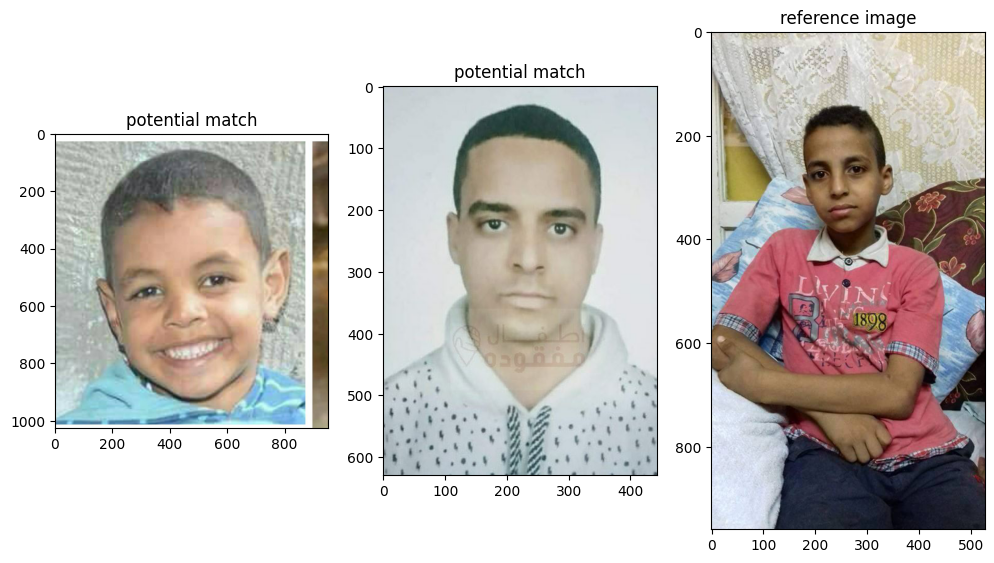

In [12]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, imgs.shape[0]+1, figsize=(12, 12))
axs = axs.flatten()
for (index, row), ax in zip(imgs.iterrows(), axs):
    img = plt.imread(row['identity'])
    ax.imshow(img)
    ax.set_title("potential match")

axs[imgs.shape[0]].imshow(plt.imread(path))
axs[imgs.shape[0]].set_title("reference image")
plt.show()

In [18]:
path = "atfalmafkoda_unzip/found_children/15235656_1655095198121434_7634532044858290148_o_1655095198121434.jpg"
db = "atfalmafkoda_unzip/database"
dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[0], detector_backend="mtcnn", enforce_detection=False)

There are  359  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 18ms/step
find function lasts  1.3794565200805664  seconds


In [19]:
df = dfs[0].copy()
df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database/person").str.split("/")
df['id'] = df['id'].apply(lambda x: x[0])

In [21]:
imgs = df.loc[df["VGG-Face_cosine"] < .28]

In [22]:
imgs

identity  source_x  source_y  \
0  atfalmafkoda_unzip/database/person180/slice_01...       235       494   
1  atfalmafkoda_unzip/database/person197/slice_01...       235       494   

   source_w  source_h  VGG-Face_cosine   id  
0       211       281         0.245561  180  
1       211       281         0.264452  197

There are  359  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 17ms/step
find function lasts  2.9334614276885986  seconds


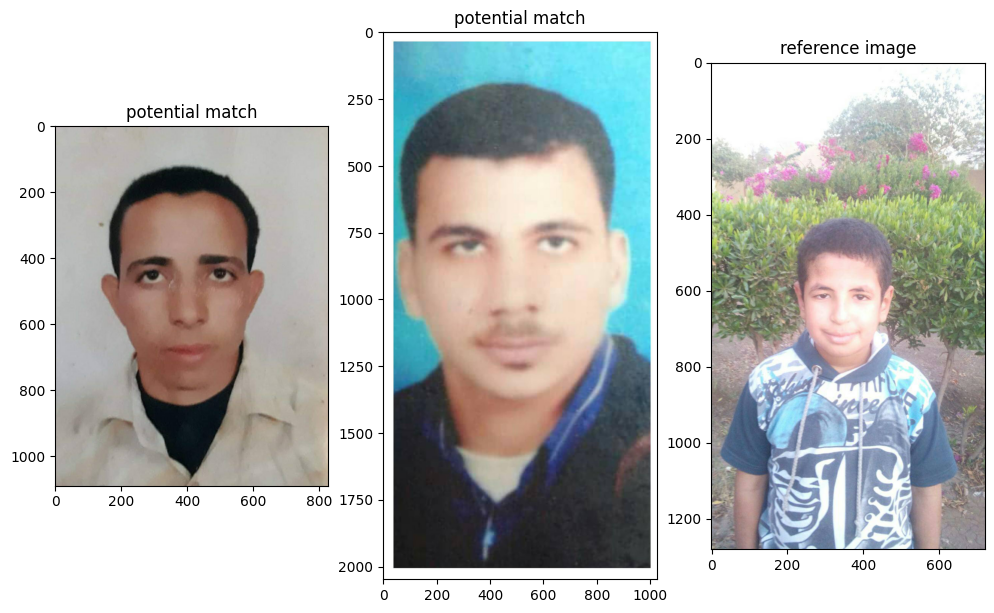

In [12]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, imgs.shape[0]+1, figsize=(12, 12))
axs = axs.flatten()
for (index, row), ax in zip(imgs.iterrows(), axs):
    img = plt.imread(row['identity'])
    ax.imshow(img)
    ax.set_title("potential match")

axs[imgs.shape[0]].imshow(plt.imread(path))
axs[imgs.shape[0]].set_title("reference image")
plt.show()

# Test FR (Out of 63)

The following code was used to test out the various models on our validation set. 
Methodology: 
1. Duplicated db
2. looked at which individuals had more than one photo
3. took one photo out of the individuals that had more than one photo and placed it in our "validation" with labels
4. ran the facial recognition to see if we could match the individuals from the validation set to their actual labels.

### VGGFace

In [26]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

In [27]:
def db_find_test(path, test, db="atfalmafkoda_unzip/database2", model=0, thresh=.3):
    """function used to test the finding of known matches
    args:
        path- path to image; can be numpy array too
        test- accepts "top1, top5 and thresh"
        db- path to database
        model- model numbers defined above 
        thresh- threshold to search cosine similarities
    output:
        returns Boolean of whether match was identified; {actual ID label, 'which faces it found'}
    """
    m = model
    dfs = DeepFace.find(img_path=path, db_path=db, model_name=models[m],
                        detector_backend="mtcnn", enforce_detection=False)
    num_faces = len(dfs)
    df = dfs[0].copy()
    df = df.drop(columns=['source_x', 'source_y', 'source_w', 'source_h'])
    df['id'] = df['identity'].str.strip("atfalmafkoda_unzip/database2/person").str.split("/")
    df['id'] = df['id'].apply(lambda x: x[0])
    img_len = df.loc[df["VGG-Face_cosine"] < thresh].shape[0]
    
    actual = (path.lstrip("atfalmafkoda_unzip/validation/person")).split("/")[0]
    
    if img_len == 0:
            return False, {'actual':[], 'found':[]}
    if test == "top1":
        found = df['id'].tolist()[:1]
        if actual == found[0]:
            return True, {'actual':actual, 'found':found}
        return False, {'actual':actual, 'found':found}
        
    elif test == "top5":
        if img_len < 5:
            found = df['id'].tolist()[:img_len]
        else:
            found = df['id'].tolist()[:5]
        if actual in found[:5]:
            return True, {'actual':actual, 'found':found}
        return False, {'actual':actual, 'found':found}
    
    else: 
        if img_len == 0:
            return False, {'actual':[], 'found':[]}
        else:
            found = df['id'].tolist()[:img_len]
            # found_difs = df['VGG-Face_cosine'].tolist()[:img_len] #uncomment if need to look at cosine scores
        if actual in found:
            return True, {'actual':actual, 'found':found}
        return False , {'actual':actual, 'found':found}

In [28]:
valid="atfalmafkoda_unzip/validation/"

vgg_res = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            vgg_res.append(db_find_test(path, test="thresh"))

There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 135ms/step
find function lasts  10.605586528778076  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  6.264225959777832  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  6.7267632484436035  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  6.883307695388794  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  6.39803671836853  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 24ms/step
find function 

1/1 [==============================] - 0s 22ms/step
find function lasts  6.122021198272705  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  6.2556846141815186  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  6.288702011108398  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  6.02357029914856  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  6.313827276229858  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  6.410890340805054  seconds
There are  4044  representations found i

There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  5.870604991912842  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  5.951164722442627  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  6.1420674324035645  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  10.479321718215942  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  5.85703706741333  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function l

1/1 [==============================] - 0s 22ms/step
find function lasts  5.909998416900635  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  5.764100074768066  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  5.881669282913208  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  5.755720138549805  seconds
There are  4044  representations found in  representations_vgg_face.pkl
3/3 [==============================] - 0s 3ms/step
find function lasts  5.999819755554199  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  5.96951961517334  seconds
There are  4044  representations found in 

There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  6.405633926391602  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  6.019548416137695  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  6.165228605270386  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  5.766114711761475  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  6.206925392150879  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 23ms/step
find function la

1/1 [==============================] - 0s 22ms/step
find function lasts  6.24668288230896  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  6.057504892349243  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  5.943180799484253  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  5.8052895069122314  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  6.266190767288208  seconds
There are  4044  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  6.097013235092163  seconds
There are  4044  representations found i

1/1 [==============================] - 0s 20ms/step
find function lasts  5.803669214248657  seconds


In [29]:
count = 0
for i in vgg_res:
    if i[0] == True:
        count +=1
count

41

In [18]:
len(vgg_res)

63

In [30]:
#find how many of the images are "bad" in the db
names = []
ct = 0
for d in os.listdir("atfalmafkoda_unzip/database2"):
    if not os.path.isdir("atfalmafkoda_unzip/database2/"+d):
        continue
    num = len(os.listdir(os.path.join("atfalmafkoda_unzip/database2", d)))
    if num == 14:
        ct += 1
        names.append(d)
    elif num == 27:
        ct += 1
        names.append(d)
    elif num == 40:
        ct += 1
        names.append(d)
    elif num == 53:
        ct += 1
        names.append(d)


In [32]:
names = [n.replace("person", "") for n in names]
valid_names = os.listdir("atfalmafkoda_unzip/validation")
valid_names = [n.replace("person", "") for n in valid_names]

bad = [set(names) & set(valid_names)][0]


In [33]:
bad_false = 0
bad_true = 0
for x in vgg_res:
    if (x[0] == False) and (x[1]['actual'] in bad):
        bad_false += 1
    elif (x[0] == True) and (x[1]['actual'] in bad):
        bad_true += 1

In [34]:
bad_false

15

In [35]:
bad_true

23

In [23]:
vgg_res

[(False, {'actual': '78', 'top': ['59', '78', '100', '100', '7']}),
 (False, {'actual': '80', 'top': ['17', '13', '115', '52', '33']}),
 (False, {'actual': '204', 'top': ['108', '04', '163', '165', '140']}),
 (False, {'actual': '51', 'top': ['13', '51', '13', '13', '51']}),
 (False, {'actual': '4', 'top': ['30', '120', '73', '73', '183']}),
 (False, {'actual': '63', 'top': ['8', '182', '32', '187', '92']}),
 (False, {'actual': '203', 'top': ['197', '188', '186', '162', '124']}),
 True,
 (False, {'actual': '75', 'top': ['0', '75', '75', '0', '42']}),
 (False, {'actual': '33', 'top': ['194', '123', '123', '177', '157']}),
 (False, {'actual': '98', 'top': ['3', '36', '100', '114', '7']}),
 True,
 True,
 (False, {'actual': '192', 'top': ['02', '138', '18', '98', '188']}),
 (False, {'actual': '115', 'top': ['129', '75', '112', '180', '171']}),
 (False, {'actual': '69', 'top': ['14', '190', '100', '144', '30']}),
 (False, {'actual': '190', 'top': ['124', '190', '104', '66', '122']}),
 True,


In [48]:
# import os
# import shutil
# to_rem = [80, 4, 33, 69, 65, 134, 89, 36, 48, 90, 67, 142]

# d = "atfalmafkoda_unzip/validation/person142"
# nd = "atfalmafkoda_unzip/database2/person142"
# for f in os.listdir(d):
#     shutil.move(os.path.join(d, f), os.path.join(nd, f))

### Facenet

In [27]:
valid="atfalmafkoda_unzip/validation/"

results = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            results.append(db_find_test(path, model=1))

There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8342022895812988  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0020451545715332  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.8819880485534668  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.02278733253479  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2483296394348145  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.83

1/1 [==============================] - 0s 21ms/step
find function lasts  1.219693660736084  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.328948736190796  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2098076343536377  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1746315956115723  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 28ms/step
find function lasts  1.1981372833251953  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2195379734039307  seconds
There are  288  representations found in  repr

1/1 [==============================] - 0s 21ms/step
find function lasts  1.2775371074676514  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2001454830169678  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0684072971343994  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7111873626708984  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.1436378955841064  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.9454240798950195  seconds
There are  288  representations found in  re

1/1 [==============================] - 0s 21ms/step
find function lasts  0.8595201969146729  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  0.8637313842773438  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.9499073028564453  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.8996171951293945  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1741325855255127  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.8476746082305908  seconds
There are  288  representations found in  re

1/1 [==============================] - 0s 22ms/step
find function lasts  1.1258678436279297  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.234543800354004  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2941710948944092  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.157109022140503  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.182476282119751  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.7621617317199707  seconds
There are  288  representations found in  repre

1/1 [==============================] - 0s 21ms/step
find function lasts  1.254678726196289  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0844907760620117  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.8288090229034424  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.153655767440796  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.217175006866455  seconds
There are  288  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.78898024559021  seconds
There are  288  representations found in  represe

In [28]:
sum(results)

21

### OpenFace

In [29]:
valid="atfalmafkoda_unzip/validation/"

results = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            results.append(db_find_test(path, model=3))

Finding representations:   0%|          | 0/282 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step
openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /usr4/ds549/dskahill/.deepface/weights/openface_weights.h5

  0%|          | 0.00/15.3M [00:00<?, ?B/s]
100%|██████████| 15.3M/15.3M [00:00<00:00, 81.8MB/s]
Finding representations:   0%|          | 1/282 [00:03<15:21,  3.28s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:   1%|          | 2/282 [00:04<08:26,  1.81s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   1%|          | 3/282 [00:04<06:05,  1.31s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   1%|▏         | 4/282 [00:05<05:24,  1.17s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:   2%|▏         | 5/282 [00:06<04:40,  1.01s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:   2%|▏         | 6/282 [00:07<04:16,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   2%|▏         | 7/282 [00:08<04:17,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   3%|▎         | 8/282 [00:09<04:13,  1.08it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:   3%|▎         | 9/282 [00:10<04:34,  1.00s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▎         | 10/282 [00:10<04:02,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▍         | 11/282 [00:11<03:29,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   4%|▍         | 12/282 [00:12<03:31,  1.28it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   5%|▍         | 13/282 [00:13<03:34,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   5%|▍         | 14/282 [00:13<03:26,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:   5%|▌         | 15/282 [00:14<03:45,  1.18it/s]

2/2 [==============================] - 0s 4ms/step


Finding representations:   6%|▌         | 16/282 [00:15<03:52,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   6%|▌         | 17/282 [00:16<04:04,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   6%|▋         | 18/282 [00:17<04:04,  1.08it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   7%|▋         | 19/282 [00:18<03:52,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   7%|▋         | 20/282 [00:19<03:31,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   7%|▋         | 21/282 [00:19<03:22,  1.29it/s]

1/1 [==============================] - 0s 29ms/step


Finding representations:   8%|▊         | 22/282 [00:21<04:10,  1.04it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:   8%|▊         | 23/282 [00:22<04:39,  1.08s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:   9%|▊         | 24/282 [00:23<04:49,  1.12s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:   9%|▉         | 25/282 [00:24<04:27,  1.04s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:   9%|▉         | 26/282 [00:25<04:22,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  10%|▉         | 27/282 [00:26<04:13,  1.01it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  10%|▉         | 28/282 [00:27<04:32,  1.07s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  10%|█         | 29/282 [00:28<04:33,  1.08s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  11%|█         | 30/282 [00:30<04:35,  1.09s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  11%|█         | 31/282 [00:30<04:13,  1.01s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  11%|█▏        | 32/282 [00:31<03:55,  1.06it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  12%|█▏        | 33/282 [00:32<03:40,  1.13it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  12%|█▏        | 34/282 [00:33<03:25,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  12%|█▏        | 35/282 [00:33<03:05,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  13%|█▎        | 36/282 [00:34<03:10,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  13%|█▎        | 37/282 [00:35<03:05,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  13%|█▎        | 38/282 [00:35<02:53,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  14%|█▍        | 39/282 [00:36<03:15,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  14%|█▍        | 40/282 [00:37<03:27,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  15%|█▍        | 41/282 [00:38<03:31,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  15%|█▍        | 42/282 [00:39<03:17,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  15%|█▌        | 43/282 [00:40<03:09,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  16%|█▌        | 44/282 [00:40<03:00,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  16%|█▌        | 45/282 [00:41<02:54,  1.35it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  16%|█▋        | 46/282 [00:42<02:46,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  17%|█▋        | 47/282 [00:42<02:45,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  17%|█▋        | 48/282 [00:43<02:47,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  17%|█▋        | 49/282 [00:44<02:59,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  18%|█▊        | 50/282 [00:45<03:29,  1.10it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  18%|█▊        | 51/282 [00:46<03:30,  1.10it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  18%|█▊        | 52/282 [00:47<03:09,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  19%|█▉        | 53/282 [00:48<03:21,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  19%|█▉        | 54/282 [00:49<03:33,  1.07it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  20%|█▉        | 55/282 [00:49<03:15,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  20%|█▉        | 56/282 [00:51<03:43,  1.01it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  20%|██        | 57/282 [00:52<03:52,  1.03s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:  21%|██        | 58/282 [00:53<04:01,  1.08s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  21%|██        | 59/282 [00:54<04:07,  1.11s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  21%|██▏       | 60/282 [00:55<04:05,  1.11s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  22%|██▏       | 61/282 [00:56<03:42,  1.01s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  22%|██▏       | 62/282 [00:57<03:21,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  22%|██▏       | 63/282 [00:58<04:04,  1.12s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  23%|██▎       | 64/282 [00:59<03:43,  1.02s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  23%|██▎       | 65/282 [01:00<03:26,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  23%|██▎       | 66/282 [01:01<03:21,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  24%|██▍       | 67/282 [01:02<03:07,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  24%|██▍       | 68/282 [01:03<03:27,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  24%|██▍       | 69/282 [01:04<03:21,  1.06it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  25%|██▍       | 70/282 [01:05<03:12,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  25%|██▌       | 71/282 [01:05<03:10,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  26%|██▌       | 72/282 [01:06<03:05,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  26%|██▌       | 73/282 [01:07<03:04,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  26%|██▌       | 74/282 [01:08<03:06,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  27%|██▋       | 75/282 [01:09<02:43,  1.26it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  27%|██▋       | 76/282 [01:09<02:37,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  27%|██▋       | 77/282 [01:11<03:06,  1.10it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  28%|██▊       | 78/282 [01:11<02:49,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  28%|██▊       | 79/282 [01:12<02:52,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  28%|██▊       | 80/282 [01:13<03:10,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  29%|██▊       | 81/282 [01:14<03:02,  1.10it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  29%|██▉       | 82/282 [01:15<02:49,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  29%|██▉       | 83/282 [01:16<02:57,  1.12it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  30%|██▉       | 84/282 [01:16<02:40,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  30%|███       | 85/282 [01:18<02:56,  1.12it/s]

1/1 [==============================] - 0s 52ms/step


Finding representations:  30%|███       | 86/282 [01:19<03:54,  1.20s/it]

1/1 [==============================] - 0s 27ms/step


Finding representations:  31%|███       | 87/282 [01:20<03:30,  1.08s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  31%|███       | 88/282 [01:21<03:22,  1.05s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  32%|███▏      | 89/282 [01:22<03:06,  1.04it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  32%|███▏      | 90/282 [01:23<03:08,  1.02it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  32%|███▏      | 91/282 [01:24<03:03,  1.04it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  33%|███▎      | 92/282 [01:25<03:07,  1.01it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  33%|███▎      | 93/282 [01:26<02:45,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  33%|███▎      | 94/282 [01:26<02:46,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  34%|███▎      | 95/282 [01:27<02:38,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  34%|███▍      | 96/282 [01:28<02:21,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  34%|███▍      | 97/282 [01:28<02:12,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  35%|███▍      | 98/282 [01:29<02:06,  1.46it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  35%|███▌      | 99/282 [01:30<02:01,  1.50it/s]

1/1 [==============================] - 0s 27ms/step


Finding representations:  35%|███▌      | 100/282 [01:30<01:59,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  36%|███▌      | 101/282 [01:31<01:52,  1.61it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  36%|███▌      | 102/282 [01:31<01:51,  1.61it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  37%|███▋      | 103/282 [01:32<01:51,  1.60it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  37%|███▋      | 104/282 [01:33<02:15,  1.32it/s]

5/5 [==============================] - 0s 3ms/step


Finding representations:  37%|███▋      | 105/282 [01:34<02:24,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  38%|███▊      | 106/282 [01:35<02:37,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  38%|███▊      | 107/282 [01:36<02:34,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  38%|███▊      | 108/282 [01:37<02:32,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  39%|███▊      | 109/282 [01:38<02:26,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  39%|███▉      | 110/282 [01:38<02:22,  1.21it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  39%|███▉      | 111/282 [01:39<02:17,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  40%|███▉      | 112/282 [01:40<02:13,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  40%|████      | 113/282 [01:41<02:10,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  40%|████      | 114/282 [01:42<02:31,  1.11it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  41%|████      | 115/282 [01:43<02:26,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  41%|████      | 116/282 [01:44<02:21,  1.17it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  41%|████▏     | 117/282 [01:44<02:21,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  42%|████▏     | 118/282 [01:45<02:29,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  42%|████▏     | 119/282 [01:46<02:23,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  43%|████▎     | 120/282 [01:47<02:21,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  43%|████▎     | 121/282 [01:48<02:19,  1.15it/s]

4/4 [==============================] - 0s 4ms/step


Finding representations:  43%|████▎     | 122/282 [01:49<02:14,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  44%|████▎     | 123/282 [01:50<02:11,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  44%|████▍     | 124/282 [01:50<02:09,  1.22it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  44%|████▍     | 125/282 [01:51<02:10,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  45%|████▍     | 126/282 [01:52<02:10,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  45%|████▌     | 127/282 [01:53<02:11,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  45%|████▌     | 128/282 [01:54<02:08,  1.20it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  46%|████▌     | 129/282 [01:54<02:03,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  46%|████▌     | 130/282 [01:55<01:58,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  46%|████▋     | 131/282 [01:56<02:08,  1.18it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  47%|████▋     | 132/282 [01:57<02:09,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  47%|████▋     | 133/282 [01:58<02:14,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  48%|████▊     | 134/282 [01:59<02:10,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  48%|████▊     | 135/282 [02:00<02:03,  1.19it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  48%|████▊     | 136/282 [02:00<01:56,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▊     | 137/282 [02:01<01:53,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▉     | 138/282 [02:02<01:46,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▉     | 139/282 [02:02<01:43,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  50%|████▉     | 140/282 [02:03<01:45,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  50%|█████     | 141/282 [02:04<01:43,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  50%|█████     | 142/282 [02:05<01:38,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  51%|█████     | 143/282 [02:05<01:37,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  51%|█████     | 144/282 [02:06<01:50,  1.25it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  51%|█████▏    | 145/282 [02:07<01:52,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  52%|█████▏    | 146/282 [02:08<01:58,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  52%|█████▏    | 147/282 [02:09<02:07,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  52%|█████▏    | 148/282 [02:10<02:08,  1.04it/s]

1/1 [==============================] - 0s 43ms/step


Finding representations:  53%|█████▎    | 149/282 [02:12<02:39,  1.20s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:  53%|█████▎    | 150/282 [02:13<02:28,  1.13s/it]

1/1 [==============================] - 0s 28ms/step


Finding representations:  54%|█████▎    | 151/282 [02:14<02:30,  1.15s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  54%|█████▍    | 152/282 [02:15<02:14,  1.03s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  54%|█████▍    | 153/282 [02:16<02:01,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  55%|█████▍    | 154/282 [02:16<01:54,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  55%|█████▍    | 155/282 [02:17<01:42,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  55%|█████▌    | 156/282 [02:18<01:42,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  56%|█████▌    | 157/282 [02:19<01:37,  1.29it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  56%|█████▌    | 158/282 [02:19<01:27,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  56%|█████▋    | 159/282 [02:20<01:29,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  57%|█████▋    | 160/282 [02:21<01:30,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  57%|█████▋    | 161/282 [02:21<01:30,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  57%|█████▋    | 162/282 [02:22<01:39,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  58%|█████▊    | 163/282 [02:23<01:44,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  58%|█████▊    | 164/282 [02:24<01:48,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  59%|█████▊    | 165/282 [02:25<01:50,  1.06it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  59%|█████▉    | 166/282 [02:26<01:47,  1.08it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  59%|█████▉    | 167/282 [02:27<01:48,  1.06it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  60%|█████▉    | 168/282 [02:28<01:52,  1.01it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  60%|█████▉    | 169/282 [02:30<02:11,  1.17s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  60%|██████    | 170/282 [02:31<02:10,  1.17s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  61%|██████    | 171/282 [02:32<02:04,  1.12s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  61%|██████    | 172/282 [02:33<01:44,  1.05it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  61%|██████▏   | 173/282 [02:34<01:39,  1.09it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  62%|██████▏   | 174/282 [02:35<01:48,  1.01s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  62%|██████▏   | 175/282 [02:36<01:40,  1.06it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  62%|██████▏   | 176/282 [02:36<01:33,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  63%|██████▎   | 177/282 [02:37<01:42,  1.03it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  63%|██████▎   | 178/282 [02:38<01:33,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  63%|██████▎   | 179/282 [02:39<01:29,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  64%|██████▍   | 180/282 [02:40<01:21,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  64%|██████▍   | 181/282 [02:40<01:19,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  65%|██████▍   | 182/282 [02:41<01:26,  1.15it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  65%|██████▍   | 183/282 [02:42<01:28,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  65%|██████▌   | 184/282 [02:44<01:33,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  66%|██████▌   | 185/282 [02:44<01:29,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  66%|██████▌   | 186/282 [02:45<01:20,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  66%|██████▋   | 187/282 [02:46<01:28,  1.07it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  67%|██████▋   | 188/282 [02:47<01:21,  1.15it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  67%|██████▋   | 189/282 [02:48<01:15,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  67%|██████▋   | 190/282 [02:48<01:11,  1.30it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  68%|██████▊   | 191/282 [02:49<01:06,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  68%|██████▊   | 192/282 [02:50<01:05,  1.38it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  68%|██████▊   | 193/282 [02:51<01:22,  1.07it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  69%|██████▉   | 194/282 [02:52<01:28,  1.00s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  69%|██████▉   | 195/282 [02:53<01:30,  1.04s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  70%|██████▉   | 196/282 [02:54<01:20,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  70%|██████▉   | 197/282 [02:55<01:15,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  70%|███████   | 198/282 [02:57<01:43,  1.23s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  71%|███████   | 199/282 [02:58<01:31,  1.10s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  71%|███████   | 200/282 [02:59<01:26,  1.06s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  71%|███████▏  | 201/282 [02:59<01:19,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 202/282 [03:00<01:13,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 203/282 [03:01<01:09,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  72%|███████▏  | 204/282 [03:02<01:06,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  73%|███████▎  | 205/282 [03:02<00:59,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  73%|███████▎  | 206/282 [03:03<01:07,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  73%|███████▎  | 207/282 [03:04<01:00,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  74%|███████▍  | 208/282 [03:05<01:06,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  74%|███████▍  | 209/282 [03:06<01:05,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  74%|███████▍  | 210/282 [03:07<01:02,  1.15it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  75%|███████▍  | 211/282 [03:08<01:00,  1.18it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  75%|███████▌  | 212/282 [03:08<00:55,  1.27it/s]

1/1 [==============================] - 0s 30ms/step


Finding representations:  76%|███████▌  | 213/282 [03:10<01:13,  1.07s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  76%|███████▌  | 214/282 [03:11<01:08,  1.01s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  76%|███████▌  | 215/282 [03:12<01:03,  1.05it/s]

1/1 [==============================] - 0s 29ms/step


Finding representations:  77%|███████▋  | 216/282 [03:13<01:02,  1.05it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  77%|███████▋  | 217/282 [03:13<00:58,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  77%|███████▋  | 218/282 [03:14<00:58,  1.10it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  78%|███████▊  | 219/282 [03:15<00:51,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  78%|███████▊  | 220/282 [03:16<00:50,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  78%|███████▊  | 221/282 [03:17<00:51,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  79%|███████▊  | 222/282 [03:18<00:53,  1.11it/s]

2/2 [==============================] - 0s 4ms/step


Finding representations:  79%|███████▉  | 223/282 [03:19<00:52,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  79%|███████▉  | 224/282 [03:20<00:51,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  80%|███████▉  | 225/282 [03:21<00:55,  1.03it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  80%|████████  | 226/282 [03:22<00:53,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  80%|████████  | 227/282 [03:23<00:55,  1.01s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  81%|████████  | 228/282 [03:24<00:57,  1.06s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  81%|████████  | 229/282 [03:25<00:51,  1.03it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 230/282 [03:26<00:52,  1.00s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 231/282 [03:27<00:51,  1.02s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:  82%|████████▏ | 232/282 [03:28<00:52,  1.06s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  83%|████████▎ | 233/282 [03:29<00:49,  1.00s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  83%|████████▎ | 234/282 [03:30<00:44,  1.07it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  83%|████████▎ | 235/282 [03:31<00:46,  1.00it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  84%|████████▎ | 236/282 [03:32<00:49,  1.08s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  84%|████████▍ | 237/282 [03:33<00:49,  1.10s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  84%|████████▍ | 238/282 [03:34<00:42,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  85%|████████▍ | 239/282 [03:35<00:38,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  85%|████████▌ | 240/282 [03:35<00:36,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  85%|████████▌ | 241/282 [03:36<00:32,  1.27it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  86%|████████▌ | 242/282 [03:37<00:31,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  86%|████████▌ | 243/282 [03:37<00:29,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  87%|████████▋ | 244/282 [03:38<00:27,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  87%|████████▋ | 245/282 [03:39<00:26,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  87%|████████▋ | 246/282 [03:39<00:24,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  88%|████████▊ | 247/282 [03:40<00:23,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  88%|████████▊ | 248/282 [03:41<00:23,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  88%|████████▊ | 249/282 [03:42<00:23,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  89%|████████▊ | 250/282 [03:42<00:21,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  89%|████████▉ | 251/282 [03:43<00:22,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  89%|████████▉ | 252/282 [03:44<00:21,  1.39it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  90%|████████▉ | 253/282 [03:44<00:21,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  90%|█████████ | 254/282 [03:45<00:20,  1.36it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  90%|█████████ | 255/282 [03:46<00:19,  1.39it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  91%|█████████ | 256/282 [03:47<00:19,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  91%|█████████ | 257/282 [03:47<00:19,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  91%|█████████▏| 258/282 [03:48<00:17,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  92%|█████████▏| 259/282 [03:49<00:17,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  92%|█████████▏| 260/282 [03:50<00:16,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  93%|█████████▎| 261/282 [03:50<00:14,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  93%|█████████▎| 262/282 [03:51<00:14,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  93%|█████████▎| 263/282 [03:52<00:16,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  94%|█████████▎| 264/282 [03:53<00:15,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  94%|█████████▍| 265/282 [03:54<00:15,  1.10it/s]

2/2 [==============================] - 0s 3ms/step


Finding representations:  94%|█████████▍| 266/282 [03:55<00:14,  1.11it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  95%|█████████▍| 267/282 [03:56<00:14,  1.07it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  95%|█████████▌| 268/282 [03:57<00:13,  1.06it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  95%|█████████▌| 269/282 [03:58<00:12,  1.03it/s]

1/1 [==============================] - 0s 27ms/step


Finding representations:  96%|█████████▌| 270/282 [03:59<00:12,  1.00s/it]

2/2 [==============================] - 0s 3ms/step


Finding representations:  96%|█████████▌| 271/282 [04:00<00:10,  1.04it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  96%|█████████▋| 272/282 [04:01<00:09,  1.00it/s]

2/2 [==============================] - 0s 3ms/step


Finding representations:  97%|█████████▋| 273/282 [04:02<00:08,  1.03it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  97%|█████████▋| 274/282 [04:03<00:07,  1.01it/s]

1/1 [==============================] - 0s 27ms/step


Finding representations:  98%|█████████▊| 275/282 [04:05<00:08,  1.23s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  98%|█████████▊| 276/282 [04:05<00:06,  1.08s/it]

1/1 [==============================] - 0s 26ms/step


Finding representations:  98%|█████████▊| 277/282 [04:06<00:05,  1.01s/it]

3/3 [==============================] - 0s 4ms/step


Finding representations:  99%|█████████▊| 278/282 [04:07<00:03,  1.04it/s]

4/4 [==============================] - 0s 5ms/step


Finding representations:  99%|█████████▉| 279/282 [04:08<00:02,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  99%|█████████▉| 280/282 [04:09<00:02,  1.05s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations: 100%|█████████▉| 281/282 [04:10<00:00,  1.05it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations: 100%|██████████| 282/282 [04:11<00:00,  1.12it/s]

Representations stored in atfalmafkoda_unzip/database2/representations_openface.pkl file.Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step
find function lasts  252.2654447555542  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.9575667381286621  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.8691139221191406  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0371885299682617  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3080217838287354  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2589235305786133  seconds
There are  288  representations found in

1/1 [==============================] - 0s 25ms/step
find function lasts  0.8790366649627686  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0856921672821045  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7511196136474609  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1926703453063965  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.6623196601867676  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.094486951828003  seconds
There are  288  representations found in

1/1 [==============================] - 0s 23ms/step
find function lasts  1.1929311752319336  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.1511869430541992  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1644420623779297  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1785955429077148  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2083966732025146  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.0585737228393555  seconds
There are  288  representations found i

1/1 [==============================] - 0s 21ms/step
find function lasts  0.8311381340026855  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8570647239685059  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  0.8781123161315918  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.9056742191314697  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.221940517425537  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8295481204986572  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.0049750804901123  seconds
There are  288  representations found in  representations_openface.pkl
2/2 [==============================] - 0s 3ms/step
find function lasts  0.9881210327148438  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.8460907936096191  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.6704940795898438  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8469624519348145  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 28ms/step
find function lasts  1.424668550491333  seconds
There are  288  representations found in 

1/1 [==============================] - 0s 25ms/step
find function lasts  1.2191174030303955  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.2722830772399902  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.3087270259857178  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1205639839172363  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.113501787185669  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3468036651611328  seconds
There are  288  representations found in

1/1 [==============================] - 0s 23ms/step
find function lasts  0.8659312725067139  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  0.8388471603393555  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.129612922668457  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8654699325561523  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.8256361484527588  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.9677841663360596  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.1243679523468018  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.8386130332946777  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.1518363952636719  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.201399326324463  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7162485122680664  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.8639483451843262  seconds
There are  288  representations found in

1/1 [==============================] - 0s 25ms/step
find function lasts  1.0336697101593018  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0650184154510498  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.246232271194458  seconds
There are  288  representations found in  representations_openface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.7826378345489502  seconds


In [42]:
sum(vgg_results)

NameError: name 'vgg_results' is not defined

### DeepFace

In [31]:
valid="atfalmafkoda_unzip/validation/"

results = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            results.append(db_find_test(path, model=4))

Finding representations:   0%|          | 0/282 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   0%|          | 1/282 [01:02<4:54:22, 62.86s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   1%|          | 2/282 [01:03<2:03:05, 26.38s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   1%|          | 3/282 [01:04<1:08:11, 14.67s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:   1%|▏         | 4/282 [01:05<43:01,  9.29s/it]  

1/1 [==============================] - 0s 22ms/step


Finding representations:   2%|▏         | 5/282 [01:06<28:44,  6.22s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   2%|▏         | 6/282 [01:07<20:12,  4.39s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:   2%|▏         | 7/282 [01:08<15:01,  3.28s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   3%|▎         | 8/282 [01:09<11:33,  2.53s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:   3%|▎         | 9/282 [01:10<09:33,  2.10s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▎         | 10/282 [01:10<07:31,  1.66s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▍         | 11/282 [01:11<05:56,  1.32s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   4%|▍         | 12/282 [01:12<05:18,  1.18s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   5%|▍         | 13/282 [01:13<04:52,  1.09s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:   5%|▍         | 14/282 [01:13<04:25,  1.01it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   5%|▌         | 15/282 [01:14<04:26,  1.00it/s]

2/2 [==============================] - 0s 3ms/step


Finding representations:   6%|▌         | 16/282 [01:15<04:18,  1.03it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   6%|▌         | 17/282 [01:16<04:23,  1.00it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:   6%|▋         | 18/282 [01:17<04:15,  1.03it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   7%|▋         | 19/282 [01:18<04:01,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   7%|▋         | 20/282 [01:19<03:40,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   7%|▋         | 21/282 [01:20<03:35,  1.21it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:   8%|▊         | 22/282 [01:20<03:35,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   8%|▊         | 23/282 [01:22<04:05,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:   9%|▊         | 24/282 [01:23<04:21,  1.02s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:   9%|▉         | 25/282 [01:24<04:04,  1.05it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:   9%|▉         | 26/282 [01:25<04:06,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  10%|▉         | 27/282 [01:25<03:54,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  10%|▉         | 28/282 [01:27<04:21,  1.03s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  10%|█         | 29/282 [01:28<04:29,  1.06s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  11%|█         | 30/282 [01:29<04:33,  1.09s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  11%|█         | 31/282 [01:30<04:15,  1.02s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  11%|█▏        | 32/282 [01:31<03:57,  1.05it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  12%|█▏        | 33/282 [01:31<03:45,  1.10it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  12%|█▏        | 34/282 [01:32<03:31,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  12%|█▏        | 35/282 [01:33<03:14,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  13%|█▎        | 36/282 [01:34<03:17,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  13%|█▎        | 37/282 [01:34<03:10,  1.28it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  13%|█▎        | 38/282 [01:35<03:00,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  14%|█▍        | 39/282 [01:36<03:20,  1.21it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  14%|█▍        | 40/282 [01:37<03:30,  1.15it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  15%|█▍        | 41/282 [01:38<03:33,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  15%|█▍        | 42/282 [01:39<03:21,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  15%|█▌        | 43/282 [01:39<03:16,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  16%|█▌        | 44/282 [01:40<03:08,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  16%|█▌        | 45/282 [01:41<03:03,  1.29it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  16%|█▋        | 46/282 [01:42<02:55,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  17%|█▋        | 47/282 [01:42<02:52,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  17%|█▋        | 48/282 [01:43<02:51,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  17%|█▋        | 49/282 [01:44<03:09,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  18%|█▊        | 50/282 [01:45<03:33,  1.09it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  18%|█▊        | 51/282 [01:46<03:32,  1.09it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  18%|█▊        | 52/282 [01:47<03:12,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  19%|█▉        | 53/282 [01:48<03:20,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  19%|█▉        | 54/282 [01:49<03:33,  1.07it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  20%|█▉        | 55/282 [01:49<03:17,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  20%|█▉        | 56/282 [01:51<03:41,  1.02it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  20%|██        | 57/282 [01:52<03:51,  1.03s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  21%|██        | 58/282 [01:53<04:00,  1.07s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  21%|██        | 59/282 [01:54<04:07,  1.11s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  21%|██▏       | 60/282 [01:55<04:06,  1.11s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  22%|██▏       | 61/282 [01:56<03:49,  1.04s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  22%|██▏       | 62/282 [01:57<03:27,  1.06it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  22%|██▏       | 63/282 [01:58<04:06,  1.12s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  23%|██▎       | 64/282 [01:59<03:43,  1.03s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  23%|██▎       | 65/282 [02:00<03:30,  1.03it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  23%|██▎       | 66/282 [02:01<03:26,  1.05it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  24%|██▍       | 67/282 [02:02<03:10,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


Finding representations:  24%|██▍       | 68/282 [02:04<04:10,  1.17s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  24%|██▍       | 69/282 [02:05<04:01,  1.13s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  25%|██▍       | 70/282 [02:05<03:43,  1.05s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  25%|██▌       | 71/282 [02:06<03:35,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  26%|██▌       | 72/282 [02:07<03:26,  1.02it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  26%|██▌       | 73/282 [02:08<03:23,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  26%|██▌       | 74/282 [02:09<03:22,  1.03it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  27%|██▋       | 75/282 [02:10<02:58,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  27%|██▋       | 76/282 [02:11<02:50,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  27%|██▋       | 77/282 [02:12<03:22,  1.01it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  28%|██▊       | 78/282 [02:13<03:00,  1.13it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  28%|██▊       | 79/282 [02:14<03:00,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  28%|██▊       | 80/282 [02:15<03:18,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  29%|██▊       | 81/282 [02:16<03:09,  1.06it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  29%|██▉       | 82/282 [02:16<02:56,  1.13it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  29%|██▉       | 83/282 [02:17<03:04,  1.08it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  30%|██▉       | 84/282 [02:18<02:50,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  30%|███       | 85/282 [02:19<03:04,  1.07it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  30%|███       | 86/282 [02:20<03:17,  1.01s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  31%|███       | 87/282 [02:21<02:59,  1.08it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  31%|███       | 88/282 [02:22<02:57,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  32%|███▏      | 89/282 [02:23<02:49,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  32%|███▏      | 90/282 [02:24<02:58,  1.07it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  32%|███▏      | 91/282 [02:25<03:02,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  33%|███▎      | 92/282 [02:26<03:05,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  33%|███▎      | 93/282 [02:26<02:45,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  33%|███▎      | 94/282 [02:27<02:48,  1.12it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  34%|███▎      | 95/282 [02:28<02:41,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  34%|███▍      | 96/282 [02:29<02:24,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  34%|███▍      | 97/282 [02:29<02:16,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  35%|███▍      | 98/282 [02:30<02:11,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  35%|███▌      | 99/282 [02:31<02:06,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  35%|███▌      | 100/282 [02:31<02:06,  1.44it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  36%|███▌      | 101/282 [02:32<01:59,  1.51it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  36%|███▌      | 102/282 [02:33<01:57,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  37%|███▋      | 103/282 [02:33<01:57,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  37%|███▋      | 104/282 [02:34<02:19,  1.27it/s]

5/5 [==============================] - 0s 3ms/step


Finding representations:  37%|███▋      | 105/282 [02:35<02:30,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  38%|███▊      | 106/282 [02:37<02:43,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  38%|███▊      | 107/282 [02:37<02:38,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  38%|███▊      | 108/282 [02:38<02:37,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  39%|███▊      | 109/282 [02:39<02:33,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  39%|███▉      | 110/282 [02:40<02:29,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  39%|███▉      | 111/282 [02:41<02:24,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  40%|███▉      | 112/282 [02:42<02:21,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  40%|████      | 113/282 [02:42<02:19,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  40%|████      | 114/282 [02:44<02:39,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  41%|████      | 115/282 [02:44<02:34,  1.08it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  41%|████      | 116/282 [02:45<02:28,  1.12it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  41%|████▏     | 117/282 [02:46<02:28,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  42%|████▏     | 118/282 [02:47<02:39,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  42%|████▏     | 119/282 [02:48<02:31,  1.08it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  43%|████▎     | 120/282 [02:49<02:26,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  43%|████▎     | 121/282 [02:50<02:25,  1.10it/s]

4/4 [==============================] - 0s 3ms/step


Finding representations:  43%|████▎     | 122/282 [02:51<02:19,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  44%|████▎     | 123/282 [02:52<02:16,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  44%|████▍     | 124/282 [02:52<02:13,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  44%|████▍     | 125/282 [02:53<02:14,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  45%|████▍     | 126/282 [02:54<02:16,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  45%|████▌     | 127/282 [02:55<02:16,  1.13it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  45%|████▌     | 128/282 [02:56<02:11,  1.17it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  46%|████▌     | 129/282 [02:57<02:08,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  46%|████▌     | 130/282 [02:57<02:04,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  46%|████▋     | 131/282 [02:58<02:14,  1.13it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  47%|████▋     | 132/282 [02:59<02:13,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  47%|████▋     | 133/282 [03:00<02:18,  1.08it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  48%|████▊     | 134/282 [03:01<02:16,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  48%|████▊     | 135/282 [03:02<02:09,  1.13it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  48%|████▊     | 136/282 [03:03<02:00,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▊     | 137/282 [03:04<01:58,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▉     | 138/282 [03:04<01:50,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  49%|████▉     | 139/282 [03:05<01:46,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  50%|████▉     | 140/282 [03:06<01:48,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  50%|█████     | 141/282 [03:06<01:45,  1.34it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  50%|█████     | 142/282 [03:07<01:40,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  51%|█████     | 143/282 [03:08<01:38,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  51%|█████     | 144/282 [03:09<01:53,  1.22it/s]

3/3 [==============================] - 0s 4ms/step


Finding representations:  51%|█████▏    | 145/282 [03:10<01:56,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  52%|█████▏    | 146/282 [03:11<01:59,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  52%|█████▏    | 147/282 [03:12<02:06,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  52%|█████▏    | 148/282 [03:13<02:07,  1.05it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  53%|█████▎    | 149/282 [03:14<02:10,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  53%|█████▎    | 150/282 [03:15<02:02,  1.08it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  54%|█████▎    | 151/282 [03:16<02:09,  1.01it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  54%|█████▍    | 152/282 [03:17<01:58,  1.10it/s]

1/1 [==============================] - 0s 29ms/step


Finding representations:  54%|█████▍    | 153/282 [03:18<02:15,  1.05s/it]

1/1 [==============================] - 0s 29ms/step


Finding representations:  55%|█████▍    | 154/282 [03:19<02:12,  1.03s/it]

1/1 [==============================] - 0s 27ms/step


Finding representations:  55%|█████▍    | 155/282 [03:20<02:00,  1.06it/s]

1/1 [==============================] - 0s 26ms/step


Finding representations:  55%|█████▌    | 156/282 [03:21<01:59,  1.05it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  56%|█████▌    | 157/282 [03:21<01:53,  1.10it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  56%|█████▌    | 158/282 [03:22<01:41,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  56%|█████▋    | 159/282 [03:23<01:42,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  57%|█████▋    | 160/282 [03:24<01:40,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  57%|█████▋    | 161/282 [03:24<01:39,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  57%|█████▋    | 162/282 [03:26<01:47,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  58%|█████▊    | 163/282 [03:27<01:51,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  58%|█████▊    | 164/282 [03:28<01:55,  1.02it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  59%|█████▊    | 165/282 [03:29<01:56,  1.00it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  59%|█████▉    | 166/282 [03:30<01:55,  1.00it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  59%|█████▉    | 167/282 [03:31<01:55,  1.00s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  60%|█████▉    | 168/282 [03:32<01:55,  1.02s/it]

1/1 [==============================] - 0s 23ms/step


Finding representations:  60%|█████▉    | 169/282 [03:33<02:13,  1.18s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  60%|██████    | 170/282 [03:35<02:13,  1.19s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  61%|██████    | 171/282 [03:36<02:06,  1.14s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  61%|██████    | 172/282 [03:36<01:47,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  61%|██████▏   | 173/282 [03:37<01:42,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  62%|██████▏   | 174/282 [03:38<01:50,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  62%|██████▏   | 175/282 [03:39<01:42,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  62%|██████▏   | 176/282 [03:40<01:36,  1.10it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  63%|██████▎   | 177/282 [03:41<01:41,  1.03it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  63%|██████▎   | 178/282 [03:42<01:32,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  63%|██████▎   | 179/282 [03:42<01:29,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  64%|██████▍   | 180/282 [03:43<01:21,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  64%|██████▍   | 181/282 [03:44<01:22,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  65%|██████▍   | 182/282 [03:45<01:28,  1.13it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  65%|██████▍   | 183/282 [03:46<01:29,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  65%|██████▌   | 184/282 [03:47<01:34,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  66%|██████▌   | 185/282 [03:48<01:30,  1.07it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  66%|██████▌   | 186/282 [03:49<01:21,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  66%|██████▋   | 187/282 [03:50<01:30,  1.05it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  67%|██████▋   | 188/282 [03:50<01:22,  1.14it/s]

1/1 [==============================] - 0s 19ms/step


Finding representations:  67%|██████▋   | 189/282 [03:51<01:16,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  67%|██████▋   | 190/282 [03:52<01:13,  1.26it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  68%|██████▊   | 191/282 [03:53<01:08,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  68%|██████▊   | 192/282 [03:53<01:08,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  68%|██████▊   | 193/282 [03:55<01:24,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  69%|██████▉   | 194/282 [03:56<01:30,  1.02s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  69%|██████▉   | 195/282 [03:57<01:30,  1.04s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  70%|██████▉   | 196/282 [03:58<01:21,  1.05it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  70%|██████▉   | 197/282 [03:59<01:17,  1.10it/s]

1/1 [==============================] - 0s 29ms/step


Finding representations:  70%|███████   | 198/282 [04:01<01:46,  1.27s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  71%|███████   | 199/282 [04:02<01:35,  1.15s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  71%|███████   | 200/282 [04:02<01:29,  1.09s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  71%|███████▏  | 201/282 [04:03<01:20,  1.01it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 202/282 [04:04<01:15,  1.06it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 203/282 [04:05<01:11,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  72%|███████▏  | 204/282 [04:06<01:08,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  73%|███████▎  | 205/282 [04:06<01:00,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  73%|███████▎  | 206/282 [04:07<01:07,  1.12it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  73%|███████▎  | 207/282 [04:08<01:00,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  74%|███████▍  | 208/282 [04:09<01:06,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  74%|███████▍  | 209/282 [04:10<01:06,  1.10it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  74%|███████▍  | 210/282 [04:11<01:04,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  75%|███████▍  | 211/282 [04:12<01:02,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  75%|███████▌  | 212/282 [04:12<00:56,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  76%|███████▌  | 213/282 [04:14<01:02,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  76%|███████▌  | 214/282 [04:14<00:59,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  76%|███████▌  | 215/282 [04:15<00:56,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  77%|███████▋  | 216/282 [04:16<00:56,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  77%|███████▋  | 217/282 [04:17<00:54,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  77%|███████▋  | 218/282 [04:18<00:56,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  78%|███████▊  | 219/282 [04:18<00:50,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  78%|███████▊  | 220/282 [04:19<00:50,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  78%|███████▊  | 221/282 [04:20<00:52,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  79%|███████▊  | 222/282 [04:21<00:54,  1.10it/s]

2/2 [==============================] - 0s 4ms/step


Finding representations:  79%|███████▉  | 223/282 [04:22<00:52,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  79%|███████▉  | 224/282 [04:23<00:52,  1.11it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  80%|███████▉  | 225/282 [04:24<00:55,  1.03it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  80%|████████  | 226/282 [04:25<00:54,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  80%|████████  | 227/282 [04:26<00:56,  1.02s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  81%|████████  | 228/282 [04:27<00:57,  1.07s/it]

1/1 [==============================] - 0s 24ms/step


Finding representations:  81%|████████  | 229/282 [04:28<00:52,  1.01it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 230/282 [04:29<00:53,  1.03s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 231/282 [04:30<00:52,  1.04s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  82%|████████▏ | 232/282 [04:32<00:53,  1.08s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  83%|████████▎ | 233/282 [04:33<00:50,  1.03s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  83%|████████▎ | 234/282 [04:33<00:47,  1.02it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  83%|████████▎ | 235/282 [04:35<00:49,  1.04s/it]

1/1 [==============================] - 0s 29ms/step


Finding representations:  84%|████████▎ | 236/282 [04:36<00:52,  1.13s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  84%|████████▍ | 237/282 [04:37<00:51,  1.14s/it]

1/1 [==============================] - 0s 28ms/step


Finding representations:  84%|████████▍ | 238/282 [04:39<00:54,  1.25s/it]

1/1 [==============================] - 0s 32ms/step


Finding representations:  85%|████████▍ | 239/282 [04:39<00:48,  1.14s/it]

1/1 [==============================] - 0s 27ms/step


Finding representations:  85%|████████▌ | 240/282 [04:40<00:45,  1.09s/it]

1/1 [==============================] - 0s 27ms/step


Finding representations:  85%|████████▌ | 241/282 [04:41<00:41,  1.01s/it]

1/1 [==============================] - 0s 25ms/step


Finding representations:  86%|████████▌ | 242/282 [04:42<00:39,  1.02it/s]

1/1 [==============================] - 0s 25ms/step


Finding representations:  86%|████████▌ | 243/282 [04:43<00:36,  1.07it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  87%|████████▋ | 244/282 [04:44<00:33,  1.14it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  87%|████████▋ | 245/282 [04:44<00:30,  1.19it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  87%|████████▋ | 246/282 [04:45<00:28,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  88%|████████▊ | 247/282 [04:46<00:26,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  88%|████████▊ | 248/282 [04:47<00:25,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  88%|████████▊ | 249/282 [04:47<00:25,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  89%|████████▊ | 250/282 [04:48<00:23,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  89%|████████▉ | 251/282 [04:49<00:23,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  89%|████████▉ | 252/282 [04:50<00:22,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  90%|████████▉ | 253/282 [04:50<00:22,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  90%|█████████ | 254/282 [04:51<00:21,  1.29it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  90%|█████████ | 255/282 [04:52<00:20,  1.32it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  91%|█████████ | 256/282 [04:53<00:19,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  91%|█████████ | 257/282 [04:54<00:19,  1.26it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  91%|█████████▏| 258/282 [04:54<00:17,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  92%|█████████▏| 259/282 [04:55<00:17,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  92%|█████████▏| 260/282 [04:56<00:17,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


Finding representations:  93%|█████████▎| 261/282 [04:57<00:15,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  93%|█████████▎| 262/282 [04:57<00:14,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  93%|█████████▎| 263/282 [04:59<00:17,  1.12it/s]

1/1 [==============================] - 0s 23ms/step


Finding representations:  94%|█████████▎| 264/282 [04:59<00:15,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Finding representations:  94%|█████████▍| 265/282 [05:01<00:16,  1.04it/s]

2/2 [==============================] - 0s 3ms/step


Finding representations:  94%|█████████▍| 266/282 [05:01<00:15,  1.05it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  95%|█████████▍| 267/282 [05:03<00:14,  1.00it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  95%|█████████▌| 268/282 [05:04<00:14,  1.01s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  95%|█████████▌| 269/282 [05:05<00:13,  1.02s/it]

1/1 [==============================] - 0s 22ms/step


Finding representations:  96%|█████████▌| 270/282 [05:06<00:12,  1.03s/it]

2/2 [==============================] - 0s 3ms/step


Finding representations:  96%|█████████▌| 271/282 [05:07<00:10,  1.00it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  96%|█████████▋| 272/282 [05:08<00:10,  1.04s/it]

2/2 [==============================] - 0s 4ms/step


Finding representations:  97%|█████████▋| 273/282 [05:09<00:09,  1.02s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  97%|█████████▋| 274/282 [05:10<00:08,  1.04s/it]

1/1 [==============================] - 0s 21ms/step


Finding representations:  98%|█████████▊| 275/282 [05:11<00:07,  1.09s/it]

1/1 [==============================] - 0s 20ms/step


Finding representations:  98%|█████████▊| 276/282 [05:12<00:05,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations:  98%|█████████▊| 277/282 [05:12<00:04,  1.10it/s]

3/3 [==============================] - 0s 3ms/step


Finding representations:  99%|█████████▊| 278/282 [05:13<00:03,  1.18it/s]

4/4 [==============================] - 0s 3ms/step


Finding representations:  99%|█████████▉| 279/282 [05:14<00:02,  1.23it/s]

1/1 [==============================] - 0s 22ms/step


Finding representations:  99%|█████████▉| 280/282 [05:15<00:01,  1.01it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations: 100%|█████████▉| 281/282 [05:16<00:00,  1.08it/s]

1/1 [==============================] - 0s 21ms/step


Finding representations: 100%|██████████| 282/282 [05:17<00:00,  1.13s/it]

Representations stored in atfalmafkoda_unzip/database2/representations_deepface.pkl file.Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step
find function lasts  318.7954087257385  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.4013583660125732  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.3364756107330322  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.476715087890625  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6915831565856934  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.650468349456787  seconds
There are  288  representations found in  

1/1 [==============================] - 0s 23ms/step
find function lasts  1.3075881004333496  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.4922823905944824  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2007858753204346  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.6742615699768066  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.1136152744293213  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.5357940196990967  seconds
There are  288  representations found i

1/1 [==============================] - 0s 22ms/step
find function lasts  1.6644670963287354  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6262545585632324  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.6279785633087158  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.690418004989624  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.589643955230713  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.4979112148284912  seconds
There are  288  representations found in 

1/1 [==============================] - 0s 21ms/step
find function lasts  1.3801593780517578  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  1.2984809875488281  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 29ms/step
find function lasts  2.296473264694214  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.5065062046051025  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 31ms/step
find function lasts  2.3579659461975098  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.3664019107818604  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.484900951385498  seconds
There are  288  representations found in  representations_deepface.pkl
2/2 [==============================] - 0s 3ms/step
find function lasts  1.4976704120635986  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.351637601852417  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1249938011169434  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.3533580303192139  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2909679412841797  seconds
There are  288  representations found in  

1/1 [==============================] - 0s 21ms/step
find function lasts  1.5444045066833496  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.7006604671478271  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.7096788883209229  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.591336727142334  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.640733242034912  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6936914920806885  seconds
There are  288  representations found in 

1/1 [==============================] - 0s 23ms/step
find function lasts  1.3160908222198486  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.3062546253204346  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6851468086242676  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2913649082183838  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2691400051116943  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.436845064163208  seconds
There are  288  representations found in

1/1 [==============================] - 0s 24ms/step
find function lasts  1.7564773559570312  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.2761125564575195  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.6230061054229736  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.662207841873169  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2090404033660889  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.3320932388305664  seconds
There are  288  representations found in

1/1 [==============================] - 0s 22ms/step
find function lasts  1.4862825870513916  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.5270442962646484  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.7098896503448486  seconds
There are  288  representations found in  representations_deepface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.266195297241211  seconds


In [32]:
sum(results)

5

### ArcFace

In [9]:
valid="atfalmafkoda_unzip/validation/"

arcface_res = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            arcface_res.append(db_find_test(path, model=6))

There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.7768802642822266  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 31ms/step
find function lasts  1.8782801628112793  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  2.0930511951446533  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  2.059680700302124  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.9524869918823242  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 26ms/step
find function last

1/1 [==============================] - 0s 22ms/step
find function lasts  1.9813623428344727  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.9879989624023438  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  2.020477533340454  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.9088444709777832  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.983689785003662  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 28ms/step
find function lasts  2.046356201171875  seconds
There are  4044  representations found in 

1/1 [==============================] - 0s 21ms/step
find function lasts  1.6577000617980957  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.7508814334869385  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.9895362854003906  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  3.1651179790496826  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.9083905220031738  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.9181203842163086  seconds
There are  4044  representations found 

1/1 [==============================] - 0s 22ms/step
find function lasts  2.0445291996002197  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.9445743560791016  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  2.0246777534484863  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.635603904724121  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.9708311557769775  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 28ms/step
find function lasts  1.9528758525848389  seconds
There are  4044  representations found i

1/1 [==============================] - 0s 26ms/step
find function lasts  1.8249258995056152  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.660268783569336  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  2.165473699569702  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  2.2012906074523926  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 26ms/step
find function lasts  1.9791691303253174  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.8311352729797363  seconds
There are  4044  representations found in

1/1 [==============================] - 0s 23ms/step
find function lasts  1.8083386421203613  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.7803406715393066  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.7488248348236084  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  2.121150493621826  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.9156913757324219  seconds
There are  4044  representations found in  representations_arcface.pkl
1/1 [==============================] - 0s 28ms/step
find function lasts  1.9770433902740479  seconds
There are  4044  representations found i

In [10]:
count = 0
for i in arcface_res:
    if i[0] == True:
        count += 1
count

40

In [12]:
arcface_res

[(True,
  {'actual': '78',
   'top': ['78', '59', '69', '69', '39', '19', '69', '14', '7', '55'],
   'scores': [0.5034563556053913,
    0.5225512782418165,
    0.5330053298709274,
    0.5350562199360345,
    0.5373588239134808,
    0.5490418115776012,
    0.5544798826328197,
    0.561201720559688,
    0.5621098417753239,
    0.5756502835393876]}),
 (False,
  {'actual': '204',
   'top': ['04', '108', '04', '38', '36', '47', '155', '108', '108', '151'],
   'scores': [0.5415527681365112,
    0.5449890612013504,
    0.5842297282983617,
    0.6027124736594109,
    0.6217266250038818,
    0.6360658876278025,
    0.6375238303811468,
    0.6385588659907682,
    0.6397963611610606,
    0.6449385819169764]}),
 (True,
  {'actual': '51',
   'top': ['51', '13', '52', '96', '52', '96', '64', '96', '1', '51'],
   'scores': [0.3684500065347527,
    0.4019711825691107,
    0.415926012894111,
    0.41877847868531126,
    0.41967913649029587,
    0.42307118246146047,
    0.4278231267796284,
    0.4357592

### SFace

In [11]:
valid="atfalmafkoda_unzip/validation/"

sface_res = []
for d in os.listdir(valid):
    for p in os.listdir(os.path.join(valid, d)): 
        path = os.path.join(valid, d, p)
        if p != ".ipynb_checkpoints":
            sface_res.append(db_find_test(path, model=8))

There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.9530773162841797  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8827826976776123  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  0.8415670394897461  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.991504430770874  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 26ms/step
find function lasts  1.2020201683044434  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.1415953636169

1/1 [==============================] - 0s 21ms/step
find function lasts  1.0448558330535889  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1140472888946533  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0824003219604492  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  1.0799052715301514  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.4096059799194336  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.1970114707946777  seconds
There are  288  representations found in  representati

1/1 [==============================] - 0s 26ms/step
find function lasts  1.1634933948516846  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.1314446926116943  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 26ms/step
find function lasts  1.0342481136322021  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.6234095096588135  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.0159640312194824  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.8719568252563477  seconds
There are  288  representations found in  representati

1/1 [==============================] - 0s 20ms/step
find function lasts  0.7691969871520996  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 19ms/step
find function lasts  0.7728586196899414  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.8427858352661133  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.8374755382537842  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.070399522781372  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.7730751037597656  seconds
There are  288  representations found in  representatio

1/1 [==============================] - 0s 21ms/step
find function lasts  1.0095000267028809  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 23ms/step
find function lasts  1.1256170272827148  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.2540349960327148  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 25ms/step
find function lasts  1.0449068546295166  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.066880226135254  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.179471492767334  seconds
There are  288  representations found in  representation

1/1 [==============================] - 0s 22ms/step
find function lasts  1.1808199882507324  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  1.0018401145935059  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 20ms/step
find function lasts  0.7515466213226318  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  1.070256233215332  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.167407751083374  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 22ms/step
find function lasts  0.674278974533081  seconds
There are  288  representations found in  representations

1/1 [==============================] - 0s 22ms/step
find function lasts  1.2060816287994385  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.9490604400634766  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 27ms/step
find function lasts  1.016876220703125  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 24ms/step
find function lasts  1.1761114597320557  seconds
There are  288  representations found in  representations_sface.pkl
1/1 [==============================] - 0s 21ms/step
find function lasts  0.743945837020874  seconds


In [14]:
sum(sface_res)

24

In [18]:
def evaluate(x,y):
    if x == True or y == True:
        return True
    else:
        return False

all_res = [vgg_res, arcface_res]
matrix = pd.DataFrame(all_res).T
matrix['Matches'] = matrix.apply(lambda x: evaluate(x[0], x[1]), axis=1)


with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(matrix)

In [79]:
matrix['Matches'].value_counts()

True     45
False    18
Name: Matches, dtype: int64